from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Turag/Python/DL Lab/Univariate/BODA/')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten,Dropout, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from functions_learning import *
from feed_data import data_extract
from tensorflow import keras
from keras import layers

2024-03-15 05:26:38.871053: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 05:26:39.061134: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-15 05:26:39.066095: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-15 05:26:39.066113: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

## Data Format

In [2]:
data = pd.read_csv("data/LocationB.csv")
data = data.drop(columns=["Unnamed: 0", "Date"])
data.head()

,TempB,pHB,ECB,DOB,BODB,TNB
0,21.20,8.12,1679,2.62,27.70,1.25
1,21.10,8.08,1690,2.68,27.62,1.20
2,20.94,8.06,1680,2.67,27.25,1.24
3,20.94,8.09,1697,2.65,27.32,1.22
4,21.19,8.11,1692,2.69,27.32,1.18


In [3]:
target_column = "BODB"
features = data.drop(target_column, axis=1)
target = data[target_column]

In [4]:
X = []
y = []
for i in range(3, len(features)):
    X.append(features.iloc[i-3:i, :].values.ravel())  # Flatten features
    y.append(target.iloc[i])

X = np.array(X)
y = np.array(y)

In [5]:
X[0], y[0]

(array([2.120e+01, 8.120e+00, 1.679e+03, 2.620e+00, 1.250e+00, 2.110e+01,
        8.080e+00, 1.690e+03, 2.680e+00, 1.200e+00, 2.094e+01, 8.060e+00,
        1.680e+03, 2.670e+00, 1.240e+00]),
 27.32)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [7]:
xt = x_train.copy()
xt = xt.reshape(231,15,1)
xt.shape

(231, 15, 1)

In [8]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=xt)
target = y_train[window_size - 1:].flatten()

In [9]:
moving_avg_data.shape, target.shape

((229, 15, 1), (229,))

In [10]:
epochs = 50

# General Model

### CNN

In [11]:
x_train = xt.copy()

2024-03-15 05:26:41.609169: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-15 05:26:41.609198: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-15 05:26:41.609224: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-03-15 05:26:41.609445: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
1/8 [==>...........................] - ETA: 5s - loss: 112424.8906 - root_mean_squared_error: 335.2982

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 149ms/step - loss: 69835.1016 - root_mean_squared_error: 264.2633 - val_loss: 24968.0449 - val_root_mean_squared_error: 158.0128
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 26671.6309 - root_mean_squared_error: 163.3145

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 99ms/step - loss: 12532.4072 - root_mean_squared_error: 111.9482 - val_loss: 839.7983 - val_root_mean_squared_error: 28.9793
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 674.0085 - root_mean_squared_error: 25.9617 - val_loss: 2279.1570 - val_root_mean_squared_error: 47.7405
Epoch 4/50
8/8 [==============================] - 0s 11ms/step - loss: 2808.0684 - root_mean_squared_error: 52.9912 - val_loss: 2803.1299 - val_root_mean_squared_error: 52.9446
Epoch 5/50
8/8 [==============================] - 0s 16ms/step - loss: 1971.9482 - root_mean_squared_error: 44.4066 - val_loss: 849.9045 - val_root_mean_squared_error: 29.1531
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 809.7918 - root_mean_squared_error: 28.4568

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 147ms/step - loss: 415.2062 - root_mean_squared_error: 20.3766 - val_loss: 135.1244 - val_root_mean_squared_error: 11.6243
Epoch 7/50
8/8 [==============================] - 0s 13ms/step - loss: 211.9599 - root_mean_squared_error: 14.5588 - val_loss: 260.6263 - val_root_mean_squared_error: 16.1439
Epoch 8/50
8/8 [==============================] - 0s 13ms/step - loss: 305.5676 - root_mean_squared_error: 17.4805 - val_loss: 203.7332 - val_root_mean_squared_error: 14.2735
Epoch 9/50
1/8 [==>...........................] - ETA: 0s - loss: 340.8105 - root_mean_squared_error: 18.4611

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 167ms/step - loss: 204.2487 - root_mean_squared_error: 14.2916 - val_loss: 133.5238 - val_root_mean_squared_error: 11.5552
Epoch 10/50
8/8 [==============================] - 0s 9ms/step - loss: 156.8478 - root_mean_squared_error: 12.5239 - val_loss: 150.8692 - val_root_mean_squared_error: 12.2829
Epoch 11/50
8/8 [==============================] - 0s 10ms/step - loss: 162.8833 - root_mean_squared_error: 12.7626 - val_loss: 147.8004 - val_root_mean_squared_error: 12.1573
Epoch 12/50
8/8 [==============================] - 0s 11ms/step - loss: 155.2950 - root_mean_squared_error: 12.4617 - val_loss: 134.5075 - val_root_mean_squared_error: 11.5977
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 209.0754 - root_mean_squared_error: 14.4594

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 212ms/step - loss: 151.2885 - root_mean_squared_error: 12.2999 - val_loss: 132.0215 - val_root_mean_squared_error: 11.4901
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 88.1587 - root_mean_squared_error: 9.3893

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 173ms/step - loss: 151.8787 - root_mean_squared_error: 12.3239 - val_loss: 131.1434 - val_root_mean_squared_error: 11.4518
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 144.1886 - root_mean_squared_error: 12.0079

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 128ms/step - loss: 151.8800 - root_mean_squared_error: 12.3240 - val_loss: 130.8062 - val_root_mean_squared_error: 11.4371
Epoch 16/50
8/8 [==============================] - 0s 10ms/step - loss: 149.9860 - root_mean_squared_error: 12.2469 - val_loss: 131.9253 - val_root_mean_squared_error: 11.4859
Epoch 17/50
8/8 [==============================] - 0s 8ms/step - loss: 149.2753 - root_mean_squared_error: 12.2178 - val_loss: 132.6148 - val_root_mean_squared_error: 11.5159
Epoch 18/50
8/8 [==============================] - 0s 11ms/step - loss: 149.4148 - root_mean_squared_error: 12.2235 - val_loss: 131.2868 - val_root_mean_squared_error: 11.4580
Epoch 19/50
8/8 [==============================] - 0s 10ms/step - loss: 148.2287 - root_mean_squared_error: 12.1749 - val_loss: 131.1060 - val_root_mean_squared_error: 11.4502
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 145.5666 - root_mean_squared_error: 12.0651

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 156ms/step - loss: 147.6575 - root_mean_squared_error: 12.1514 - val_loss: 128.8644 - val_root_mean_squared_error: 11.3518
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 155.5142 - root_mean_squared_error: 12.4705

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 145ms/step - loss: 146.7613 - root_mean_squared_error: 12.1145 - val_loss: 127.6590 - val_root_mean_squared_error: 11.2986
Epoch 22/50
8/8 [==============================] - 0s 10ms/step - loss: 145.9728 - root_mean_squared_error: 12.0819 - val_loss: 127.8259 - val_root_mean_squared_error: 11.3060
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 115.4738 - root_mean_squared_error: 10.7459

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 196ms/step - loss: 145.5488 - root_mean_squared_error: 12.0644 - val_loss: 127.0905 - val_root_mean_squared_error: 11.2734
Epoch 24/50
8/8 [==============================] - 0s 14ms/step - loss: 145.2719 - root_mean_squared_error: 12.0529 - val_loss: 127.2876 - val_root_mean_squared_error: 11.2822
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 116.3544 - root_mean_squared_error: 10.7868

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 259ms/step - loss: 144.2184 - root_mean_squared_error: 12.0091 - val_loss: 126.8785 - val_root_mean_squared_error: 11.2640
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 100.3161 - root_mean_squared_error: 10.0158

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 164ms/step - loss: 143.8770 - root_mean_squared_error: 11.9949 - val_loss: 124.7179 - val_root_mean_squared_error: 11.1677
Epoch 27/50
8/8 [==============================] - 0s 13ms/step - loss: 142.7250 - root_mean_squared_error: 11.9468 - val_loss: 126.7465 - val_root_mean_squared_error: 11.2582
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 145.4219 - root_mean_squared_error: 12.0591

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 258ms/step - loss: 142.3296 - root_mean_squared_error: 11.9302 - val_loss: 124.4228 - val_root_mean_squared_error: 11.1545
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 128.3524 - root_mean_squared_error: 11.3293

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 214ms/step - loss: 141.9095 - root_mean_squared_error: 11.9126 - val_loss: 121.6765 - val_root_mean_squared_error: 11.0307
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 140.9211 - root_mean_squared_error: 11.8710

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 240ms/step - loss: 140.9211 - root_mean_squared_error: 11.8710 - val_loss: 121.6210 - val_root_mean_squared_error: 11.0282
Epoch 31/50
8/8 [==============================] - 0s 26ms/step - loss: 140.5118 - root_mean_squared_error: 11.8538 - val_loss: 123.7463 - val_root_mean_squared_error: 11.1241
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 150.1604 - root_mean_squared_error: 12.2540

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 204ms/step - loss: 139.5396 - root_mean_squared_error: 11.8127 - val_loss: 120.2035 - val_root_mean_squared_error: 10.9637
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 144.3084 - root_mean_squared_error: 12.0128

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 299ms/step - loss: 138.6055 - root_mean_squared_error: 11.7731 - val_loss: 118.9737 - val_root_mean_squared_error: 10.9075
Epoch 34/50
8/8 [==============================] - 0s 34ms/step - loss: 136.4707 - root_mean_squared_error: 11.6821 - val_loss: 122.1636 - val_root_mean_squared_error: 11.0528
Epoch 35/50
8/8 [==============================] - 0s 32ms/step - loss: 137.7344 - root_mean_squared_error: 11.7360 - val_loss: 120.1212 - val_root_mean_squared_error: 10.9600
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 131.8849 - root_mean_squared_error: 11.4841

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 246ms/step - loss: 135.8757 - root_mean_squared_error: 11.6566 - val_loss: 117.6917 - val_root_mean_squared_error: 10.8486
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 134.4939 - root_mean_squared_error: 11.5971

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 282ms/step - loss: 134.6150 - root_mean_squared_error: 11.6024 - val_loss: 116.2852 - val_root_mean_squared_error: 10.7836
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 114.2382 - root_mean_squared_error: 10.6882

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 180ms/step - loss: 134.2353 - root_mean_squared_error: 11.5860 - val_loss: 115.4263 - val_root_mean_squared_error: 10.7437
Epoch 39/50
8/8 [==============================] - 0s 18ms/step - loss: 132.8516 - root_mean_squared_error: 11.5261 - val_loss: 116.5155 - val_root_mean_squared_error: 10.7942
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 157.5868 - root_mean_squared_error: 12.5534

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 228ms/step - loss: 132.7196 - root_mean_squared_error: 11.5204 - val_loss: 115.1554 - val_root_mean_squared_error: 10.7311
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 114.5214 - root_mean_squared_error: 10.7015

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 346ms/step - loss: 131.3430 - root_mean_squared_error: 11.4605 - val_loss: 113.9479 - val_root_mean_squared_error: 10.6746
Epoch 42/50
4/8 [==============>...............] - ETA: 0s - loss: 137.9654 - root_mean_squared_error: 11.7459

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 329ms/step - loss: 130.4804 - root_mean_squared_error: 11.4228 - val_loss: 113.7924 - val_root_mean_squared_error: 10.6674
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 160.1256 - root_mean_squared_error: 12.6541

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 328ms/step - loss: 130.1646 - root_mean_squared_error: 11.4090 - val_loss: 111.6968 - val_root_mean_squared_error: 10.5687
Epoch 44/50
8/8 [==============================] - 0s 36ms/step - loss: 128.4320 - root_mean_squared_error: 11.3328 - val_loss: 112.8157 - val_root_mean_squared_error: 10.6215
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 128.1167 - root_mean_squared_error: 11.3189

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 292ms/step - loss: 128.1167 - root_mean_squared_error: 11.3189 - val_loss: 111.2284 - val_root_mean_squared_error: 10.5465
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 76.9068 - root_mean_squared_error: 8.7697

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 234ms/step - loss: 127.2496 - root_mean_squared_error: 11.2805 - val_loss: 110.4309 - val_root_mean_squared_error: 10.5086
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 120.5958 - root_mean_squared_error: 10.9816

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 313ms/step - loss: 127.0510 - root_mean_squared_error: 11.2717 - val_loss: 107.7991 - val_root_mean_squared_error: 10.3826
Epoch 48/50
8/8 [==============================] - 0s 17ms/step - loss: 126.6496 - root_mean_squared_error: 11.2539 - val_loss: 109.1160 - val_root_mean_squared_error: 10.4459
Epoch 49/50
8/8 [==============================] - 0s 19ms/step - loss: 124.6236 - root_mean_squared_error: 11.1635 - val_loss: 108.6654 - val_root_mean_squared_error: 10.4243
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 123.3972 - root_mean_squared_error: 11.1084

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 0s 3ms/step


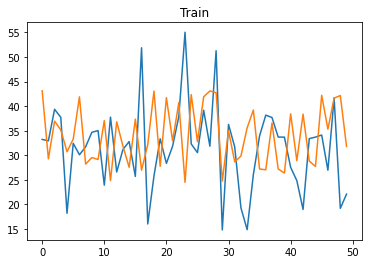

2/2 [==============================] - 0s 5ms/step


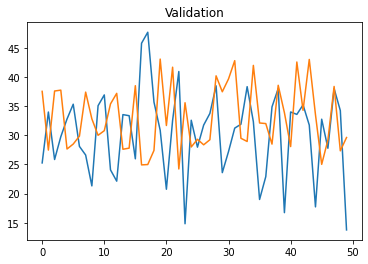

3/3 [==============================] - 0s 5ms/step


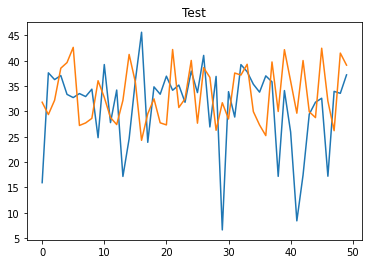

3/3 [==============================] - 0s 3ms/step


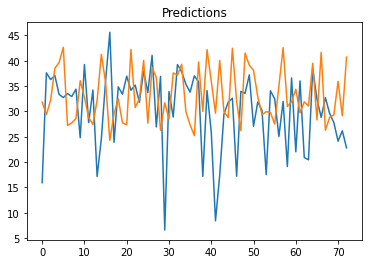

In [12]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))



cp = ModelCheckpoint('cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
cnn_mse = plot_predictions1(model,x_test, y_test)

### GRU

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 1042.7617 - root_mean_squared_error: 32.2918

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 2s/step - loss: 1039.8293 - root_mean_squared_error: 32.2464 - val_loss: 1083.4388 - val_root_mean_squared_error: 32.9156
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 1029.6578 - root_mean_squared_error: 32.0883

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 1028.9589 - root_mean_squared_error: 32.0774 - val_loss: 1072.5674 - val_root_mean_squared_error: 32.7501
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 1020.2550 - root_mean_squared_error: 31.9414

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 1018.3967 - root_mean_squared_error: 31.9123 - val_loss: 1061.8113 - val_root_mean_squared_error: 32.5854
Epoch 4/50
5/8 [=================>............] - ETA: 0s - loss: 1000.8459 - root_mean_squared_error: 31.6361

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 1007.8162 - root_mean_squared_error: 31.7461 - val_loss: 1051.0596 - val_root_mean_squared_error: 32.4200
Epoch 5/50
5/8 [=================>............] - ETA: 0s - loss: 981.9703 - root_mean_squared_error: 31.3364

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 997.2211 - root_mean_squared_error: 31.5788 - val_loss: 1040.1515 - val_root_mean_squared_error: 32.2514
Epoch 6/50
5/8 [=================>............] - ETA: 0s - loss: 978.0428 - root_mean_squared_error: 31.2737 

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 986.5046 - root_mean_squared_error: 31.4087 - val_loss: 1029.0604 - val_root_mean_squared_error: 32.0790
Epoch 7/50
5/8 [=================>............] - ETA: 0s - loss: 971.9242 - root_mean_squared_error: 31.1757

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 975.5043 - root_mean_squared_error: 31.2331 - val_loss: 1017.6393 - val_root_mean_squared_error: 31.9005
Epoch 8/50
5/8 [=================>............] - ETA: 0s - loss: 974.7759 - root_mean_squared_error: 31.2214

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 964.2090 - root_mean_squared_error: 31.0517 - val_loss: 1005.7850 - val_root_mean_squared_error: 31.7141
Epoch 9/50
5/8 [=================>............] - ETA: 0s - loss: 951.0910 - root_mean_squared_error: 30.8398

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 952.4229 - root_mean_squared_error: 30.8613 - val_loss: 993.4622 - val_root_mean_squared_error: 31.5192
Epoch 10/50
5/8 [=================>............] - ETA: 0s - loss: 934.6730 - root_mean_squared_error: 30.5724

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 940.1691 - root_mean_squared_error: 30.6622 - val_loss: 980.5878 - val_root_mean_squared_error: 31.3143
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 927.3333 - root_mean_squared_error: 30.4521

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 927.3333 - root_mean_squared_error: 30.4521 - val_loss: 967.0998 - val_root_mean_squared_error: 31.0982
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 913.9292 - root_mean_squared_error: 30.2313

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 7s 1s/step - loss: 913.9292 - root_mean_squared_error: 30.2313 - val_loss: 952.8640 - val_root_mean_squared_error: 30.8685
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 899.7833 - root_mean_squared_error: 29.9964

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 899.7833 - root_mean_squared_error: 29.9964 - val_loss: 937.9235 - val_root_mean_squared_error: 30.6255
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 884.7597 - root_mean_squared_error: 29.7449

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 884.8994 - root_mean_squared_error: 29.7473 - val_loss: 922.2367 - val_root_mean_squared_error: 30.3684
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 869.3712 - root_mean_squared_error: 29.4851

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 869.3712 - root_mean_squared_error: 29.4851 - val_loss: 905.8901 - val_root_mean_squared_error: 30.0980
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 853.1713 - root_mean_squared_error: 29.2091

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 853.1713 - root_mean_squared_error: 29.2091 - val_loss: 889.0045 - val_root_mean_squared_error: 29.8162
Epoch 17/50
5/8 [=================>............] - ETA: 0s - loss: 855.7267 - root_mean_squared_error: 29.2528

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 836.5372 - root_mean_squared_error: 28.9230 - val_loss: 871.3560 - val_root_mean_squared_error: 29.5187
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 818.9243 - root_mean_squared_error: 28.6169

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 818.9243 - root_mean_squared_error: 28.6169 - val_loss: 852.3702 - val_root_mean_squared_error: 29.1954
Epoch 19/50
5/8 [=================>............] - ETA: 0s - loss: 791.7830 - root_mean_squared_error: 28.1386

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 800.3661 - root_mean_squared_error: 28.2907 - val_loss: 834.2298 - val_root_mean_squared_error: 28.8830
Epoch 20/50
5/8 [=================>............] - ETA: 0s - loss: 789.6745 - root_mean_squared_error: 28.1011

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 783.2799 - root_mean_squared_error: 27.9871 - val_loss: 816.8847 - val_root_mean_squared_error: 28.5812
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 775.4160 - root_mean_squared_error: 27.8463

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 766.6738 - root_mean_squared_error: 27.6889 - val_loss: 800.0916 - val_root_mean_squared_error: 28.2859
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 755.5806 - root_mean_squared_error: 27.4878

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 750.5563 - root_mean_squared_error: 27.3963 - val_loss: 783.9597 - val_root_mean_squared_error: 27.9993
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 729.9855 - root_mean_squared_error: 27.0182

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 735.2560 - root_mean_squared_error: 27.1156 - val_loss: 768.4305 - val_root_mean_squared_error: 27.7206
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 718.6387 - root_mean_squared_error: 26.8074

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 720.3331 - root_mean_squared_error: 26.8390 - val_loss: 753.6880 - val_root_mean_squared_error: 27.4534
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 706.2446 - root_mean_squared_error: 26.5753

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 706.2446 - root_mean_squared_error: 26.5753 - val_loss: 739.7183 - val_root_mean_squared_error: 27.1978
Epoch 26/50
5/8 [=================>............] - ETA: 0s - loss: 689.1538 - root_mean_squared_error: 26.2517

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 693.0449 - root_mean_squared_error: 26.3257 - val_loss: 726.2806 - val_root_mean_squared_error: 26.9496
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 680.3998 - root_mean_squared_error: 26.0845

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 680.3998 - root_mean_squared_error: 26.0845 - val_loss: 713.7540 - val_root_mean_squared_error: 26.7162
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 668.5948 - root_mean_squared_error: 25.8572

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 668.6445 - root_mean_squared_error: 25.8582 - val_loss: 701.9716 - val_root_mean_squared_error: 26.4947
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 657.4293 - root_mean_squared_error: 25.6404

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 657.4293 - root_mean_squared_error: 25.6404 - val_loss: 690.8871 - val_root_mean_squared_error: 26.2847
Epoch 30/50
5/8 [=================>............] - ETA: 0s - loss: 645.2943 - root_mean_squared_error: 25.4026

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 646.9517 - root_mean_squared_error: 25.4352 - val_loss: 680.3051 - val_root_mean_squared_error: 26.0827
Epoch 31/50
5/8 [=================>............] - ETA: 0s - loss: 601.7454 - root_mean_squared_error: 24.5305

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 636.8154 - root_mean_squared_error: 25.2352 - val_loss: 670.1868 - val_root_mean_squared_error: 25.8880
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 627.2302 - root_mean_squared_error: 25.0446

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 627.2302 - root_mean_squared_error: 25.0446 - val_loss: 660.4523 - val_root_mean_squared_error: 25.6993
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 615.1920 - root_mean_squared_error: 24.8031

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 618.0046 - root_mean_squared_error: 24.8597 - val_loss: 651.0509 - val_root_mean_squared_error: 25.5157
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 609.7225 - root_mean_squared_error: 24.6926

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 608.7829 - root_mean_squared_error: 24.6735 - val_loss: 641.2881 - val_root_mean_squared_error: 25.3237
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 600.5031 - root_mean_squared_error: 24.5052

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 27s 4s/step - loss: 599.8662 - root_mean_squared_error: 24.4922 - val_loss: 632.8663 - val_root_mean_squared_error: 25.1568
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 594.5982 - root_mean_squared_error: 24.3844

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 591.9877 - root_mean_squared_error: 24.3308 - val_loss: 624.9161 - val_root_mean_squared_error: 24.9983
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 584.4154 - root_mean_squared_error: 24.1747

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 584.4154 - root_mean_squared_error: 24.1747 - val_loss: 617.3560 - val_root_mean_squared_error: 24.8466
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 574.9986 - root_mean_squared_error: 23.9791

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 577.2371 - root_mean_squared_error: 24.0258 - val_loss: 610.0730 - val_root_mean_squared_error: 24.6997
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 571.2325 - root_mean_squared_error: 23.9005

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 570.3016 - root_mean_squared_error: 23.8810 - val_loss: 603.0660 - val_root_mean_squared_error: 24.5574
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 568.5673 - root_mean_squared_error: 23.8446

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 563.7076 - root_mean_squared_error: 23.7425 - val_loss: 596.3307 - val_root_mean_squared_error: 24.4199
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 557.3357 - root_mean_squared_error: 23.6080

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 557.3357 - root_mean_squared_error: 23.6080 - val_loss: 589.8865 - val_root_mean_squared_error: 24.2876
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 551.7516 - root_mean_squared_error: 23.4894

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 551.1755 - root_mean_squared_error: 23.4771 - val_loss: 583.7628 - val_root_mean_squared_error: 24.1612
Epoch 43/50
5/8 [=================>............] - ETA: 0s - loss: 554.7560 - root_mean_squared_error: 23.5533

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 545.3743 - root_mean_squared_error: 23.3533 - val_loss: 577.8663 - val_root_mean_squared_error: 24.0388
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 538.3013 - root_mean_squared_error: 23.2013

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 539.8040 - root_mean_squared_error: 23.2337 - val_loss: 572.2187 - val_root_mean_squared_error: 23.9211
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 536.7931 - root_mean_squared_error: 23.1688

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 534.4559 - root_mean_squared_error: 23.1183 - val_loss: 566.7672 - val_root_mean_squared_error: 23.8069
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 529.2740 - root_mean_squared_error: 23.0060

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 529.2740 - root_mean_squared_error: 23.0060 - val_loss: 561.5682 - val_root_mean_squared_error: 23.6974
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 528.5781 - root_mean_squared_error: 22.9908

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 524.3519 - root_mean_squared_error: 22.8987 - val_loss: 556.5408 - val_root_mean_squared_error: 23.5911
Epoch 48/50
5/8 [=================>............] - ETA: 0s - loss: 523.4703 - root_mean_squared_error: 22.8795

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 519.5638 - root_mean_squared_error: 22.7939 - val_loss: 551.7585 - val_root_mean_squared_error: 23.4895
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 508.3578 - root_mean_squared_error: 22.5468

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 515.0148 - root_mean_squared_error: 22.6939 - val_loss: 547.1388 - val_root_mean_squared_error: 23.3910
Epoch 50/50
5/8 [=================>............] - ETA: 0s - loss: 511.3573 - root_mean_squared_error: 22.6132

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 2s 6ms/step


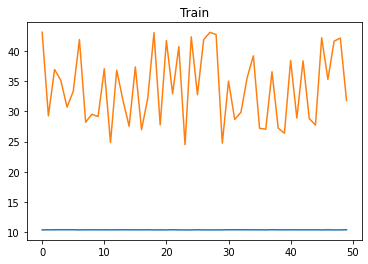

2/2 [==============================] - 2s 7ms/step


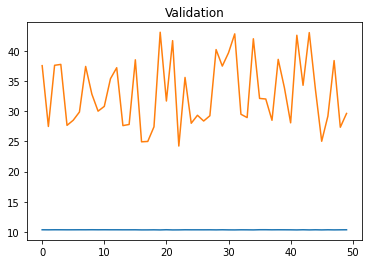

3/3 [==============================] - 0s 8ms/step


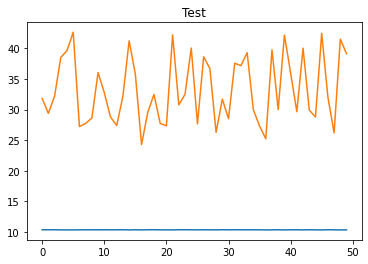

3/3 [==============================] - 0s 9ms/step


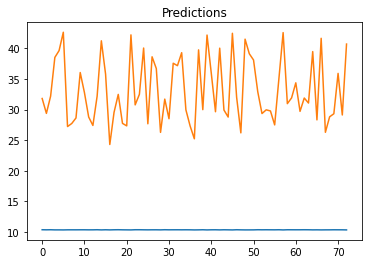

In [13]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

### LSTM

Epoch 1/50
5/8 [=================>............] - ETA: 0s - loss: 1047.0410 - root_mean_squared_error: 32.3580  

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 38s 4s/step - loss: 1036.9122 - root_mean_squared_error: 32.2011 - val_loss: 1078.4507 - val_root_mean_squared_error: 32.8398
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 1013.6226 - root_mean_squared_error: 31.8374

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 1023.2464 - root_mean_squared_error: 31.9882 - val_loss: 1064.1049 - val_root_mean_squared_error: 32.6206
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 1007.4005 - root_mean_squared_error: 31.7396

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 1008.6663 - root_mean_squared_error: 31.7595 - val_loss: 1050.1775 - val_root_mean_squared_error: 32.4064
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 998.0363 - root_mean_squared_error: 31.5917

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 998.0363 - root_mean_squared_error: 31.5917 - val_loss: 1041.1683 - val_root_mean_squared_error: 32.2671
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 988.8940 - root_mean_squared_error: 31.4467 

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 988.8940 - root_mean_squared_error: 31.4467 - val_loss: 1032.3883 - val_root_mean_squared_error: 32.1308
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 978.6445 - root_mean_squared_error: 31.2833

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 980.5236 - root_mean_squared_error: 31.3133 - val_loss: 1023.7762 - val_root_mean_squared_error: 31.9965
Epoch 7/50
5/8 [=================>............] - ETA: 0s - loss: 969.8029 - root_mean_squared_error: 31.1417

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 971.9963 - root_mean_squared_error: 31.1769 - val_loss: 1014.6771 - val_root_mean_squared_error: 31.8540
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 962.5469 - root_mean_squared_error: 31.0249

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 962.5469 - root_mean_squared_error: 31.0249 - val_loss: 1004.0887 - val_root_mean_squared_error: 31.6874
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 952.2454 - root_mean_squared_error: 30.8585

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 952.2454 - root_mean_squared_error: 30.8585 - val_loss: 994.1751 - val_root_mean_squared_error: 31.5305
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 947.7613 - root_mean_squared_error: 30.7857

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 942.8971 - root_mean_squared_error: 30.7066 - val_loss: 984.7741 - val_root_mean_squared_error: 31.3811
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 933.6709 - root_mean_squared_error: 30.5560

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 933.6709 - root_mean_squared_error: 30.5560 - val_loss: 975.1944 - val_root_mean_squared_error: 31.2281
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 928.3853 - root_mean_squared_error: 30.4694

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 924.1473 - root_mean_squared_error: 30.3998 - val_loss: 965.2028 - val_root_mean_squared_error: 31.0677
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 914.0779 - root_mean_squared_error: 30.2337

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 914.0779 - root_mean_squared_error: 30.2337 - val_loss: 954.1431 - val_root_mean_squared_error: 30.8892
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 896.2607 - root_mean_squared_error: 29.9376

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 902.5629 - root_mean_squared_error: 30.0427 - val_loss: 941.7469 - val_root_mean_squared_error: 30.6879
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 889.6888 - root_mean_squared_error: 29.8277

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 890.8080 - root_mean_squared_error: 29.8464 - val_loss: 930.2719 - val_root_mean_squared_error: 30.5004
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 879.6246 - root_mean_squared_error: 29.6585

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 879.6246 - root_mean_squared_error: 29.6585 - val_loss: 918.7582 - val_root_mean_squared_error: 30.3110
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 868.1628 - root_mean_squared_error: 29.4646

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 868.1628 - root_mean_squared_error: 29.4646 - val_loss: 906.5799 - val_root_mean_squared_error: 30.1095
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 856.0444 - root_mean_squared_error: 29.2582

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 855.8743 - root_mean_squared_error: 29.2553 - val_loss: 893.4519 - val_root_mean_squared_error: 29.8907
Epoch 19/50
5/8 [=================>............] - ETA: 0s - loss: 826.3639 - root_mean_squared_error: 28.7465

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 843.0819 - root_mean_squared_error: 29.0359 - val_loss: 880.0829 - val_root_mean_squared_error: 29.6662
Epoch 20/50
5/8 [=================>............] - ETA: 0s - loss: 813.4092 - root_mean_squared_error: 28.5203

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 829.4982 - root_mean_squared_error: 28.8010 - val_loss: 865.6390 - val_root_mean_squared_error: 29.4217
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 815.4859 - root_mean_squared_error: 28.5567

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 815.4859 - root_mean_squared_error: 28.5567 - val_loss: 851.1792 - val_root_mean_squared_error: 29.1750
Epoch 22/50
5/8 [=================>............] - ETA: 0s - loss: 816.9839 - root_mean_squared_error: 28.5829

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 801.3568 - root_mean_squared_error: 28.3082 - val_loss: 836.4577 - val_root_mean_squared_error: 28.9216
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 786.9605 - root_mean_squared_error: 28.0528

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 786.9605 - root_mean_squared_error: 28.0528 - val_loss: 821.7881 - val_root_mean_squared_error: 28.6668
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 772.6257 - root_mean_squared_error: 27.7961

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 772.6257 - root_mean_squared_error: 27.7961 - val_loss: 807.0596 - val_root_mean_squared_error: 28.4088
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 757.0161 - root_mean_squared_error: 27.5139

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 758.1993 - root_mean_squared_error: 27.5354 - val_loss: 792.0367 - val_root_mean_squared_error: 28.1431
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 743.0803 - root_mean_squared_error: 27.2595

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 743.5539 - root_mean_squared_error: 27.2682 - val_loss: 776.9114 - val_root_mean_squared_error: 27.8731
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 728.8534 - root_mean_squared_error: 26.9973

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 728.8534 - root_mean_squared_error: 26.9973 - val_loss: 761.6708 - val_root_mean_squared_error: 27.5984
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 714.6977 - root_mean_squared_error: 26.7338

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 714.0729 - root_mean_squared_error: 26.7221 - val_loss: 746.4440 - val_root_mean_squared_error: 27.3211
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 692.0180 - root_mean_squared_error: 26.3062

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 699.1511 - root_mean_squared_error: 26.4415 - val_loss: 731.1638 - val_root_mean_squared_error: 27.0400
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 684.1027 - root_mean_squared_error: 26.1554

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 684.1027 - root_mean_squared_error: 26.1554 - val_loss: 715.1096 - val_root_mean_squared_error: 26.7415
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 662.0475 - root_mean_squared_error: 25.7303

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 667.5705 - root_mean_squared_error: 25.8374 - val_loss: 696.4454 - val_root_mean_squared_error: 26.3903
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 652.3726 - root_mean_squared_error: 25.5416

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 649.5310 - root_mean_squared_error: 25.4859 - val_loss: 676.7656 - val_root_mean_squared_error: 26.0147
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 628.2325 - root_mean_squared_error: 25.0646

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 628.2325 - root_mean_squared_error: 25.0646 - val_loss: 653.0367 - val_root_mean_squared_error: 25.5546
Epoch 34/50
5/8 [=================>............] - ETA: 0s - loss: 605.0579 - root_mean_squared_error: 24.5979

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 606.6880 - root_mean_squared_error: 24.6310 - val_loss: 633.2053 - val_root_mean_squared_error: 25.1636
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 588.6073 - root_mean_squared_error: 24.2612

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 588.6073 - root_mean_squared_error: 24.2612 - val_loss: 615.9231 - val_root_mean_squared_error: 24.8178
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 572.6763 - root_mean_squared_error: 23.9307

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 572.6763 - root_mean_squared_error: 23.9307 - val_loss: 600.4777 - val_root_mean_squared_error: 24.5046
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 560.5098 - root_mean_squared_error: 23.6751

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 557.5502 - root_mean_squared_error: 23.6125 - val_loss: 583.9058 - val_root_mean_squared_error: 24.1641
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 546.5466 - root_mean_squared_error: 23.3783

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 541.6041 - root_mean_squared_error: 23.2724 - val_loss: 568.4952 - val_root_mean_squared_error: 23.8431
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 525.9733 - root_mean_squared_error: 22.9341

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 527.2662 - root_mean_squared_error: 22.9623 - val_loss: 554.1190 - val_root_mean_squared_error: 23.5397
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 513.4952 - root_mean_squared_error: 22.6604

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 513.4952 - root_mean_squared_error: 22.6604 - val_loss: 539.7294 - val_root_mean_squared_error: 23.2321
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 506.6987 - root_mean_squared_error: 22.5100

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 499.0583 - root_mean_squared_error: 22.3396 - val_loss: 523.7830 - val_root_mean_squared_error: 22.8863
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 484.2898 - root_mean_squared_error: 22.0066

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 484.2898 - root_mean_squared_error: 22.0066 - val_loss: 509.9369 - val_root_mean_squared_error: 22.5818
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 471.1610 - root_mean_squared_error: 21.7062

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 471.1610 - root_mean_squared_error: 21.7062 - val_loss: 496.3138 - val_root_mean_squared_error: 22.2781
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 457.3846 - root_mean_squared_error: 21.3866

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 457.3846 - root_mean_squared_error: 21.3866 - val_loss: 479.3445 - val_root_mean_squared_error: 21.8939
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 439.2433 - root_mean_squared_error: 20.9581

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 440.8857 - root_mean_squared_error: 20.9973 - val_loss: 464.8079 - val_root_mean_squared_error: 21.5594
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 431.0646 - root_mean_squared_error: 20.7621

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 428.2119 - root_mean_squared_error: 20.6933 - val_loss: 452.4695 - val_root_mean_squared_error: 21.2713
Epoch 47/50
5/8 [=================>............] - ETA: 0s - loss: 418.5215 - root_mean_squared_error: 20.4578

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 416.5217 - root_mean_squared_error: 20.4089 - val_loss: 440.5135 - val_root_mean_squared_error: 20.9884
Epoch 48/50
5/8 [=================>............] - ETA: 0s - loss: 407.9923 - root_mean_squared_error: 20.1988

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 405.1179 - root_mean_squared_error: 20.1275 - val_loss: 428.7944 - val_root_mean_squared_error: 20.7073
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 393.8742 - root_mean_squared_error: 19.8463

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 393.8742 - root_mean_squared_error: 19.8463 - val_loss: 417.3584 - val_root_mean_squared_error: 20.4294
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 373.1979 - root_mean_squared_error: 19.3183

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 5s 10ms/step


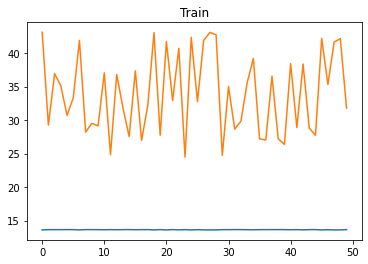

2/2 [==============================] - 3s 7ms/step


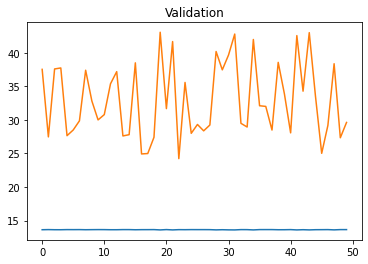

3/3 [==============================] - 0s 6ms/step


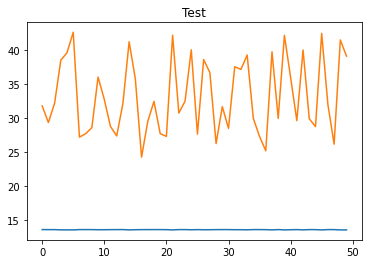

3/3 [==============================] - 0s 4ms/step


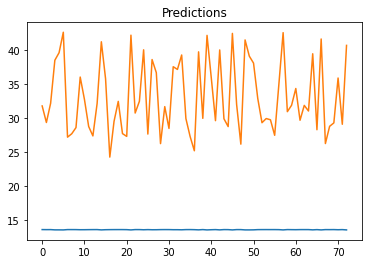

In [14]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
lstm_mse = plot_predictions1(model,x_test, y_test)

### RNN

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 1088.5557 - root_mean_squared_error: 32.9933 INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 1091.5095 - root_mean_squared_error: 33.0380 - val_loss: 1127.7411 - val_root_mean_squared_error: 33.5819
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 1034.3474 - root_mean_squared_error: 32.1613INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 974ms/step - loss: 1067.5621 - root_mean_squared_error: 32.6736 - val_loss: 1103.6600 - val_root_mean_squared_error: 33.2214
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 1040.2151 - root_mean_squared_error: 32.2524INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 1044.1322 - root_mean_squared_error: 32.3130 - val_loss: 1080.0016 - val_root_mean_squared_error: 32.8634
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 1015.0410 - root_mean_squared_error: 31.8597INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 1021.1613 - root_mean_squared_error: 31.9556 - val_loss: 1056.8000 - val_root_mean_squared_error: 32.5085
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 987.4089 - root_mean_squared_error: 31.4231 INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 998.6586 - root_mean_squared_error: 31.6016 - val_loss: 1034.0663 - val_root_mean_squared_error: 32.1569
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 972.6074 - root_mean_squared_error: 31.1867 INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 976.6655 - root_mean_squared_error: 31.2516 - val_loss: 1011.9120 - val_root_mean_squared_error: 31.8106
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 955.1671 - root_mean_squared_error: 30.9058INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 955.1671 - root_mean_squared_error: 30.9058 - val_loss: 990.1230 - val_root_mean_squared_error: 31.4662
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 919.1920 - root_mean_squared_error: 30.3182INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 933.9073 - root_mean_squared_error: 30.5599 - val_loss: 968.9212 - val_root_mean_squared_error: 31.1275
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 918.4997 - root_mean_squared_error: 30.3068INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 913.3306 - root_mean_squared_error: 30.2214 - val_loss: 947.9415 - val_root_mean_squared_error: 30.7887
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 891.3072 - root_mean_squared_error: 29.8548INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 767ms/step - loss: 892.8962 - root_mean_squared_error: 29.8814 - val_loss: 927.4149 - val_root_mean_squared_error: 30.4535
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 872.9448 - root_mean_squared_error: 29.5456INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 872.9448 - root_mean_squared_error: 29.5456 - val_loss: 907.2484 - val_root_mean_squared_error: 30.1206
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 847.5913 - root_mean_squared_error: 29.1134INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 853.3893 - root_mean_squared_error: 29.2128 - val_loss: 887.6793 - val_root_mean_squared_error: 29.7939
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 836.8020 - root_mean_squared_error: 28.9275INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 834.5754 - root_mean_squared_error: 28.8890 - val_loss: 868.5116 - val_root_mean_squared_error: 29.4705
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 830.4512 - root_mean_squared_error: 28.8176INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 816.1378 - root_mean_squared_error: 28.5681 - val_loss: 850.0392 - val_root_mean_squared_error: 29.1554
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 805.7742 - root_mean_squared_error: 28.3862INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 798.2895 - root_mean_squared_error: 28.2540 - val_loss: 832.2701 - val_root_mean_squared_error: 28.8491
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 774.8967 - root_mean_squared_error: 27.8370INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 781.2230 - root_mean_squared_error: 27.9504 - val_loss: 815.0974 - val_root_mean_squared_error: 28.5499
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 771.3675 - root_mean_squared_error: 27.7735INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 764.8434 - root_mean_squared_error: 27.6558 - val_loss: 798.6294 - val_root_mean_squared_error: 28.2600
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 742.3650 - root_mean_squared_error: 27.2464INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 749.1777 - root_mean_squared_error: 27.3711 - val_loss: 783.0295 - val_root_mean_squared_error: 27.9827
Epoch 19/50
5/8 [=================>............] - ETA: 0s - loss: 729.3699 - root_mean_squared_error: 27.0068INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 734.2509 - root_mean_squared_error: 27.0971 - val_loss: 768.1037 - val_root_mean_squared_error: 27.7147
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 719.4155 - root_mean_squared_error: 26.8219INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 720.1262 - root_mean_squared_error: 26.8352 - val_loss: 753.8222 - val_root_mean_squared_error: 27.4558
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 709.0842 - root_mean_squared_error: 26.6286INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 706.5900 - root_mean_squared_error: 26.5818 - val_loss: 740.3425 - val_root_mean_squared_error: 27.2092
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 695.2793 - root_mean_squared_error: 26.3681INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 693.8389 - root_mean_squared_error: 26.3408 - val_loss: 727.5923 - val_root_mean_squared_error: 26.9739
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 699.7604 - root_mean_squared_error: 26.4530INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 681.7930 - root_mean_squared_error: 26.1112 - val_loss: 715.5283 - val_root_mean_squared_error: 26.7494
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 672.8232 - root_mean_squared_error: 25.9388INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 670.3023 - root_mean_squared_error: 25.8902 - val_loss: 704.0848 - val_root_mean_squared_error: 26.5346
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 724.4543 - root_mean_squared_error: 26.9157INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 659.4581 - root_mean_squared_error: 25.6799 - val_loss: 693.1924 - val_root_mean_squared_error: 26.3285
Epoch 26/50
5/8 [=================>............] - ETA: 0s - loss: 644.1299 - root_mean_squared_error: 25.3797INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 649.0875 - root_mean_squared_error: 25.4772 - val_loss: 682.7767 - val_root_mean_squared_error: 26.1300
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 631.2497 - root_mean_squared_error: 25.1247INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 639.1992 - root_mean_squared_error: 25.2824 - val_loss: 672.8462 - val_root_mean_squared_error: 25.9393
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 629.7717 - root_mean_squared_error: 25.0953INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 629.7717 - root_mean_squared_error: 25.0953 - val_loss: 663.2395 - val_root_mean_squared_error: 25.7534
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 622.2110 - root_mean_squared_error: 24.9442INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 620.6229 - root_mean_squared_error: 24.9123 - val_loss: 654.0538 - val_root_mean_squared_error: 25.5745
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 605.8118 - root_mean_squared_error: 24.6132INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 611.8408 - root_mean_squared_error: 24.7354 - val_loss: 645.2426 - val_root_mean_squared_error: 25.4016
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 592.6074 - root_mean_squared_error: 24.3435INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 603.3993 - root_mean_squared_error: 24.5642 - val_loss: 636.7070 - val_root_mean_squared_error: 25.2331
Epoch 32/50
5/8 [=================>............] - ETA: 0s - loss: 591.4894 - root_mean_squared_error: 24.3206INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 595.2847 - root_mean_squared_error: 24.3985 - val_loss: 628.4648 - val_root_mean_squared_error: 25.0692
Epoch 33/50
5/8 [=================>............] - ETA: 0s - loss: 594.2653 - root_mean_squared_error: 24.3776INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 587.4573 - root_mean_squared_error: 24.2375 - val_loss: 620.4603 - val_root_mean_squared_error: 24.9090
Epoch 34/50
5/8 [=================>............] - ETA: 0s - loss: 583.3698 - root_mean_squared_error: 24.1530INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 579.8267 - root_mean_squared_error: 24.0796 - val_loss: 612.7855 - val_root_mean_squared_error: 24.7545
Epoch 35/50
5/8 [=================>............] - ETA: 0s - loss: 577.7692 - root_mean_squared_error: 24.0368INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 572.5156 - root_mean_squared_error: 23.9273 - val_loss: 605.3215 - val_root_mean_squared_error: 24.6033
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 566.5021 - root_mean_squared_error: 23.8013INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 565.4185 - root_mean_squared_error: 23.7785 - val_loss: 598.0461 - val_root_mean_squared_error: 24.4550
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 555.9990 - root_mean_squared_error: 23.5796INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 558.4616 - root_mean_squared_error: 23.6318 - val_loss: 591.0813 - val_root_mean_squared_error: 24.3122
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 551.8149 - root_mean_squared_error: 23.4907INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 551.8149 - root_mean_squared_error: 23.4907 - val_loss: 584.3047 - val_root_mean_squared_error: 24.1724
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 550.3929 - root_mean_squared_error: 23.4605INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 545.3630 - root_mean_squared_error: 23.3530 - val_loss: 577.7130 - val_root_mean_squared_error: 24.0357
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 536.8770 - root_mean_squared_error: 23.1706INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 539.1725 - root_mean_squared_error: 23.2201 - val_loss: 571.4011 - val_root_mean_squared_error: 23.9040
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 538.8433 - root_mean_squared_error: 23.2130INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 533.2202 - root_mean_squared_error: 23.0916 - val_loss: 565.3475 - val_root_mean_squared_error: 23.7770
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 530.1630 - root_mean_squared_error: 23.0253INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 527.4918 - root_mean_squared_error: 22.9672 - val_loss: 559.5748 - val_root_mean_squared_error: 23.6553
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 528.2829 - root_mean_squared_error: 22.9844INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 522.0303 - root_mean_squared_error: 22.8480 - val_loss: 553.9519 - val_root_mean_squared_error: 23.5362
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 516.6905 - root_mean_squared_error: 22.7308INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 516.6896 - root_mean_squared_error: 22.7308 - val_loss: 548.5412 - val_root_mean_squared_error: 23.4210
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 511.5618 - root_mean_squared_error: 22.6177INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 511.5618 - root_mean_squared_error: 22.6177 - val_loss: 543.2939 - val_root_mean_squared_error: 23.3087
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 509.2177 - root_mean_squared_error: 22.5659INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 506.6149 - root_mean_squared_error: 22.5081 - val_loss: 538.2374 - val_root_mean_squared_error: 23.1999
Epoch 47/50
5/8 [=================>............] - ETA: 0s - loss: 517.9006 - root_mean_squared_error: 22.7574INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 501.8448 - root_mean_squared_error: 22.4019 - val_loss: 533.3527 - val_root_mean_squared_error: 23.0944
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 492.2427 - root_mean_squared_error: 22.1865INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 497.1872 - root_mean_squared_error: 22.2977 - val_loss: 528.6213 - val_root_mean_squared_error: 22.9918
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 488.9510 - root_mean_squared_error: 22.1122INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 492.7048 - root_mean_squared_error: 22.1970 - val_loss: 523.9780 - val_root_mean_squared_error: 22.8906
Epoch 50/50
5/8 [=================>............] - ETA: 0s - loss: 506.0750 - root_mean_squared_error: 22.4961INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 1s 5ms/step


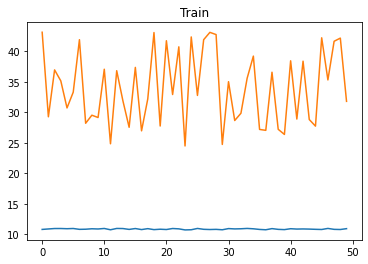

2/2 [==============================] - 1s 6ms/step


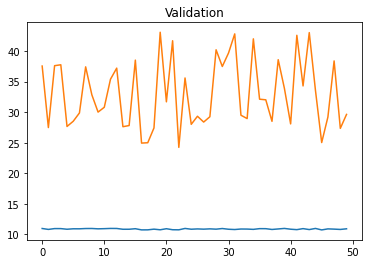

3/3 [==============================] - 0s 37ms/step


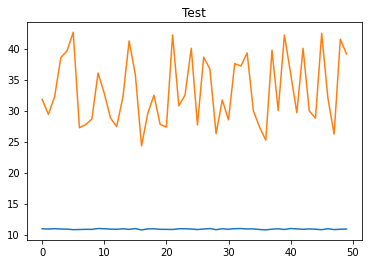

3/3 [==============================] - 0s 4ms/step


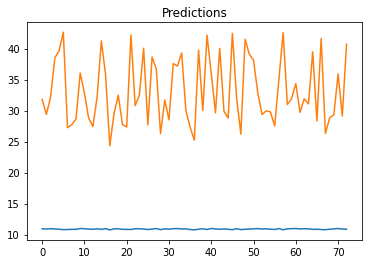

In [15]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
rnn_mse = plot_predictions1(model,x_test, y_test)

# Moving Average

In [16]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=x_train)
target = y_train[window_size - 1:].flatten()

#### CNN

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 94693.0859 - root_mean_squared_error: 307.7224  

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 8s 729ms/step - loss: 94693.0859 - root_mean_squared_error: 307.7224 - val_loss: 47002.8867 - val_root_mean_squared_error: 216.8015
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 45281.0703 - root_mean_squared_error: 212.7935

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 565ms/step - loss: 29903.4297 - root_mean_squared_error: 172.9261 - val_loss: 13641.7070 - val_root_mean_squared_error: 116.7977
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 12984.7324 - root_mean_squared_error: 113.9506

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 8864.5898 - root_mean_squared_error: 94.1519 - val_loss: 3823.8938 - val_root_mean_squared_error: 61.8376
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 3822.9814 - root_mean_squared_error: 61.8303

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 563ms/step - loss: 2086.0569 - root_mean_squared_error: 45.6734 - val_loss: 536.9429 - val_root_mean_squared_error: 23.1720
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 194.8359 - root_mean_squared_error: 13.9584

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 512ms/step - loss: 194.8359 - root_mean_squared_error: 13.9584 - val_loss: 114.6679 - val_root_mean_squared_error: 10.7083
Epoch 6/50
8/8 [==============================] - 0s 44ms/step - loss: 136.2363 - root_mean_squared_error: 11.6720 - val_loss: 291.5950 - val_root_mean_squared_error: 17.0762
Epoch 7/50
8/8 [==============================] - 0s 24ms/step - loss: 272.5227 - root_mean_squared_error: 16.5083 - val_loss: 308.0097 - val_root_mean_squared_error: 17.5502
Epoch 8/50
8/8 [==============================] - 0s 38ms/step - loss: 221.1036 - root_mean_squared_error: 14.8696 - val_loss: 194.5053 - val_root_mean_squared_error: 13.9465
Epoch 9/50
8/8 [==============================] - 0s 25ms/step - loss: 112.5618 - root_mean_squared_error: 10.6095 - val_loss: 117.1668 - val_root_mean_squared_error: 10.8244
Epoch 10/50
1/8 [==>...........................] - ETA: 0s - loss: 67.1999 - root_mean_squared_error: 8.1976

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 605ms/step - loss: 60.1839 - root_mean_squared_error: 7.7578 - val_loss: 103.0537 - val_root_mean_squared_error: 10.1515
Epoch 11/50
8/8 [==============================] - 3s 380ms/step - loss: 57.5252 - root_mean_squared_error: 7.5845 - val_loss: 107.5757 - val_root_mean_squared_error: 10.3719
Epoch 12/50
8/8 [==============================] - 0s 53ms/step - loss: 60.9094 - root_mean_squared_error: 7.8044 - val_loss: 108.6134 - val_root_mean_squared_error: 10.4218
Epoch 13/50
8/8 [==============================] - 0s 47ms/step - loss: 59.6198 - root_mean_squared_error: 7.7214 - val_loss: 105.0687 - val_root_mean_squared_error: 10.2503
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 56.1990 - root_mean_squared_error: 7.4966

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 442ms/step - loss: 57.0588 - root_mean_squared_error: 7.5537 - val_loss: 103.0283 - val_root_mean_squared_error: 10.1503
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 56.0083 - root_mean_squared_error: 7.4839

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 500ms/step - loss: 56.0083 - root_mean_squared_error: 7.4839 - val_loss: 102.8249 - val_root_mean_squared_error: 10.1403
Epoch 16/50
8/8 [==============================] - 1s 74ms/step - loss: 56.4401 - root_mean_squared_error: 7.5127 - val_loss: 102.9445 - val_root_mean_squared_error: 10.1462
Epoch 17/50
8/8 [==============================] - 1s 96ms/step - loss: 56.4484 - root_mean_squared_error: 7.5132 - val_loss: 102.8258 - val_root_mean_squared_error: 10.1403
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 56.2816 - root_mean_squared_error: 7.5021

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 563ms/step - loss: 56.0934 - root_mean_squared_error: 7.4896 - val_loss: 102.5700 - val_root_mean_squared_error: 10.1277
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 55.9174 - root_mean_squared_error: 7.4778

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 636ms/step - loss: 55.9174 - root_mean_squared_error: 7.4778 - val_loss: 102.5027 - val_root_mean_squared_error: 10.1244
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 56.4514 - root_mean_squared_error: 7.5134

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 557ms/step - loss: 55.9093 - root_mean_squared_error: 7.4773 - val_loss: 102.4307 - val_root_mean_squared_error: 10.1208
Epoch 21/50
5/8 [=================>............] - ETA: 0s - loss: 48.1717 - root_mean_squared_error: 6.9406

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 520ms/step - loss: 55.8558 - root_mean_squared_error: 7.4737 - val_loss: 102.3779 - val_root_mean_squared_error: 10.1182
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 65.5737 - root_mean_squared_error: 8.0978

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 6s 922ms/step - loss: 55.8385 - root_mean_squared_error: 7.4725 - val_loss: 102.2928 - val_root_mean_squared_error: 10.1140
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 55.8230 - root_mean_squared_error: 7.4715

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 510ms/step - loss: 55.8230 - root_mean_squared_error: 7.4715 - val_loss: 102.2093 - val_root_mean_squared_error: 10.1099
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 55.8401 - root_mean_squared_error: 7.4726

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 391ms/step - loss: 55.8401 - root_mean_squared_error: 7.4726 - val_loss: 102.1333 - val_root_mean_squared_error: 10.1061
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 55.6808 - root_mean_squared_error: 7.4620

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 509ms/step - loss: 55.6808 - root_mean_squared_error: 7.4620 - val_loss: 102.1099 - val_root_mean_squared_error: 10.1049
Epoch 26/50
8/8 [==============================] - 0s 39ms/step - loss: 55.8489 - root_mean_squared_error: 7.4732 - val_loss: 102.2794 - val_root_mean_squared_error: 10.1133
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 55.8923 - root_mean_squared_error: 7.4761

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 404ms/step - loss: 55.8923 - root_mean_squared_error: 7.4761 - val_loss: 102.0446 - val_root_mean_squared_error: 10.1017
Epoch 28/50
8/8 [==============================] - 0s 41ms/step - loss: 55.7899 - root_mean_squared_error: 7.4693 - val_loss: 102.0740 - val_root_mean_squared_error: 10.1032
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 56.0998 - root_mean_squared_error: 7.4900

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 448ms/step - loss: 55.6914 - root_mean_squared_error: 7.4627 - val_loss: 101.7689 - val_root_mean_squared_error: 10.0881
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 51.1318 - root_mean_squared_error: 7.1506

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 558ms/step - loss: 55.6609 - root_mean_squared_error: 7.4606 - val_loss: 101.6307 - val_root_mean_squared_error: 10.0812
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 74.4935 - root_mean_squared_error: 8.6310

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 529ms/step - loss: 55.6072 - root_mean_squared_error: 7.4570 - val_loss: 101.5724 - val_root_mean_squared_error: 10.0783
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 50.2133 - root_mean_squared_error: 7.0861

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 535ms/step - loss: 55.6092 - root_mean_squared_error: 7.4572 - val_loss: 101.4568 - val_root_mean_squared_error: 10.0726
Epoch 33/50
8/8 [==============================] - 0s 33ms/step - loss: 55.7310 - root_mean_squared_error: 7.4653 - val_loss: 101.4811 - val_root_mean_squared_error: 10.0738
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 56.0430 - root_mean_squared_error: 7.4862

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 642ms/step - loss: 55.4618 - root_mean_squared_error: 7.4473 - val_loss: 101.2619 - val_root_mean_squared_error: 10.0629
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 55.6966 - root_mean_squared_error: 7.4630

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 6s 921ms/step - loss: 55.4416 - root_mean_squared_error: 7.4459 - val_loss: 101.1710 - val_root_mean_squared_error: 10.0584
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 51.9474 - root_mean_squared_error: 7.2075

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 363ms/step - loss: 55.5538 - root_mean_squared_error: 7.4534 - val_loss: 101.0757 - val_root_mean_squared_error: 10.0536
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 55.5013 - root_mean_squared_error: 7.4499

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 421ms/step - loss: 55.5013 - root_mean_squared_error: 7.4499 - val_loss: 100.9694 - val_root_mean_squared_error: 10.0484
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 55.4741 - root_mean_squared_error: 7.4481

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 662ms/step - loss: 55.4741 - root_mean_squared_error: 7.4481 - val_loss: 100.8709 - val_root_mean_squared_error: 10.0434
Epoch 39/50
5/8 [=================>............] - ETA: 0s - loss: 54.2401 - root_mean_squared_error: 7.3648

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 633ms/step - loss: 55.3938 - root_mean_squared_error: 7.4427 - val_loss: 100.7653 - val_root_mean_squared_error: 10.0382
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 56.0110 - root_mean_squared_error: 7.4841

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 486ms/step - loss: 55.4064 - root_mean_squared_error: 7.4435 - val_loss: 100.6850 - val_root_mean_squared_error: 10.0342
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 56.5289 - root_mean_squared_error: 7.5186

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 487ms/step - loss: 55.3933 - root_mean_squared_error: 7.4427 - val_loss: 100.5497 - val_root_mean_squared_error: 10.0274
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 55.1292 - root_mean_squared_error: 7.4249

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 546ms/step - loss: 55.3012 - root_mean_squared_error: 7.4365 - val_loss: 100.4493 - val_root_mean_squared_error: 10.0224
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 44.7074 - root_mean_squared_error: 6.6864

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 420ms/step - loss: 55.4835 - root_mean_squared_error: 7.4487 - val_loss: 100.3945 - val_root_mean_squared_error: 10.0197
Epoch 44/50
5/8 [=================>............] - ETA: 0s - loss: 54.9785 - root_mean_squared_error: 7.4147

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 6s 792ms/step - loss: 55.2546 - root_mean_squared_error: 7.4333 - val_loss: 100.2623 - val_root_mean_squared_error: 10.0131
Epoch 45/50
8/8 [==============================] - 0s 42ms/step - loss: 55.4240 - root_mean_squared_error: 7.4447 - val_loss: 100.4939 - val_root_mean_squared_error: 10.0247
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 56.3489 - root_mean_squared_error: 7.5066

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 482ms/step - loss: 55.8104 - root_mean_squared_error: 7.4706 - val_loss: 100.1157 - val_root_mean_squared_error: 10.0058
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 56.0896 - root_mean_squared_error: 7.4893

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 577ms/step - loss: 55.3367 - root_mean_squared_error: 7.4389 - val_loss: 99.9468 - val_root_mean_squared_error: 9.9973
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 53.6264 - root_mean_squared_error: 7.3230

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 489ms/step - loss: 55.1331 - root_mean_squared_error: 7.4252 - val_loss: 99.7894 - val_root_mean_squared_error: 9.9895
Epoch 49/50
6/8 [=====================>........] - ETA: 0s - loss: 54.0279 - root_mean_squared_error: 7.3504

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 706ms/step - loss: 55.1305 - root_mean_squared_error: 7.4250 - val_loss: 99.6818 - val_root_mean_squared_error: 9.9841
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 55.2937 - root_mean_squared_error: 7.4360

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 13ms/step


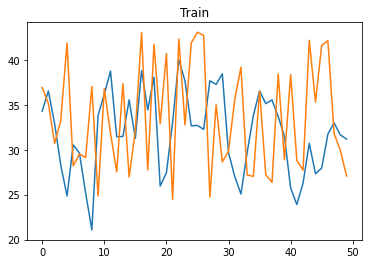

2/2 [==============================] - 0s 4ms/step


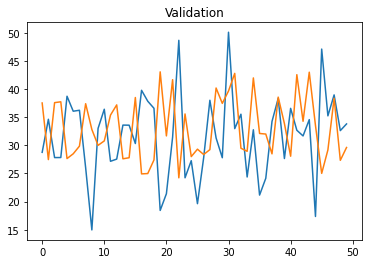

3/3 [==============================] - 0s 5ms/step


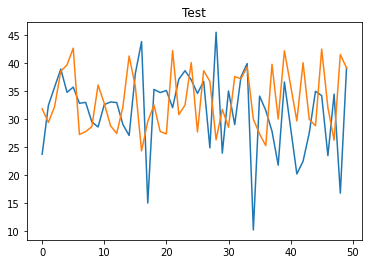

3/3 [==============================] - 0s 4ms/step


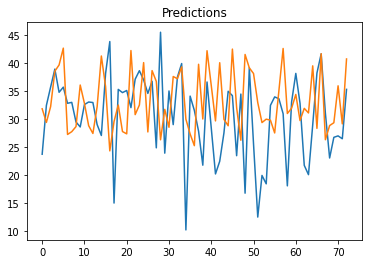

In [17]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_cnn_mse = plot_predictions1(model,x_test, y_test)

#### GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 1051.6917 - root_mean_squared_error: 32.4298

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 35s 4s/step - loss: 1051.6917 - root_mean_squared_error: 32.4298 - val_loss: 1097.0347 - val_root_mean_squared_error: 33.1215
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 1038.8807 - root_mean_squared_error: 32.2317

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 1038.8807 - root_mean_squared_error: 32.2317 - val_loss: 1084.2811 - val_root_mean_squared_error: 32.9284
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 1047.9537 - root_mean_squared_error: 32.3721

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 1026.4519 - root_mean_squared_error: 32.0383 - val_loss: 1071.7130 - val_root_mean_squared_error: 32.7370
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 1013.9496 - root_mean_squared_error: 31.8426

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 1013.9496 - root_mean_squared_error: 31.8426 - val_loss: 1058.6963 - val_root_mean_squared_error: 32.5376
Epoch 5/50
5/8 [=================>............] - ETA: 0s - loss: 996.7881 - root_mean_squared_error: 31.5720 

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 1000.4384 - root_mean_squared_error: 31.6297 - val_loss: 1042.6492 - val_root_mean_squared_error: 32.2901
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 983.7112 - root_mean_squared_error: 31.3642

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 983.7112 - root_mean_squared_error: 31.3642 - val_loss: 1027.3615 - val_root_mean_squared_error: 32.0525
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 972.0708 - root_mean_squared_error: 31.1780

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 970.2188 - root_mean_squared_error: 31.1483 - val_loss: 1014.7278 - val_root_mean_squared_error: 31.8548
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 945.7280 - root_mean_squared_error: 30.7527

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 957.8355 - root_mean_squared_error: 30.9489 - val_loss: 1002.5032 - val_root_mean_squared_error: 31.6623
Epoch 9/50
5/8 [=================>............] - ETA: 0s - loss: 950.8470 - root_mean_squared_error: 30.8358

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 945.9156 - root_mean_squared_error: 30.7557 - val_loss: 990.3461 - val_root_mean_squared_error: 31.4698
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 935.9764 - root_mean_squared_error: 30.5937

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 933.8588 - root_mean_squared_error: 30.5591 - val_loss: 977.9974 - val_root_mean_squared_error: 31.2730
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 921.6654 - root_mean_squared_error: 30.3589

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 921.6654 - root_mean_squared_error: 30.3589 - val_loss: 965.2880 - val_root_mean_squared_error: 31.0691
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 902.3288 - root_mean_squared_error: 30.0388

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 908.7996 - root_mean_squared_error: 30.1463 - val_loss: 951.7899 - val_root_mean_squared_error: 30.8511
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 897.7536 - root_mean_squared_error: 29.9625

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 895.4493 - root_mean_squared_error: 29.9241 - val_loss: 938.4139 - val_root_mean_squared_error: 30.6335
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 878.1340 - root_mean_squared_error: 29.6333

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 882.4758 - root_mean_squared_error: 29.7065 - val_loss: 925.2162 - val_root_mean_squared_error: 30.4174
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 869.5625 - root_mean_squared_error: 29.4883

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 869.5625 - root_mean_squared_error: 29.4883 - val_loss: 911.8461 - val_root_mean_squared_error: 30.1968
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 858.1091 - root_mean_squared_error: 29.2935

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 856.3318 - root_mean_squared_error: 29.2631 - val_loss: 898.3462 - val_root_mean_squared_error: 29.9724
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 845.7205 - root_mean_squared_error: 29.0813

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 843.0939 - root_mean_squared_error: 29.0361 - val_loss: 884.7173 - val_root_mean_squared_error: 29.7442
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 829.8003 - root_mean_squared_error: 28.8063

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 829.8003 - root_mean_squared_error: 28.8063 - val_loss: 871.0706 - val_root_mean_squared_error: 29.5139
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 816.4684 - root_mean_squared_error: 28.5739

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 816.4684 - root_mean_squared_error: 28.5739 - val_loss: 857.3292 - val_root_mean_squared_error: 29.2802
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 803.1140 - root_mean_squared_error: 28.3393

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 803.1140 - root_mean_squared_error: 28.3393 - val_loss: 843.4310 - val_root_mean_squared_error: 29.0419
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 790.2440 - root_mean_squared_error: 28.1113

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 3s/step - loss: 789.5195 - root_mean_squared_error: 28.0984 - val_loss: 829.7053 - val_root_mean_squared_error: 28.8046
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 775.5632 - root_mean_squared_error: 27.8489

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 776.2204 - root_mean_squared_error: 27.8607 - val_loss: 815.9069 - val_root_mean_squared_error: 28.5641
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 762.8248 - root_mean_squared_error: 27.6193

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 762.7715 - root_mean_squared_error: 27.6183 - val_loss: 802.0962 - val_root_mean_squared_error: 28.3213
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 750.6571 - root_mean_squared_error: 27.3981

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 749.4514 - root_mean_squared_error: 27.3761 - val_loss: 788.3502 - val_root_mean_squared_error: 28.0776
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 734.5054 - root_mean_squared_error: 27.1018

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 736.1293 - root_mean_squared_error: 27.1317 - val_loss: 774.7508 - val_root_mean_squared_error: 27.8343
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 722.4855 - root_mean_squared_error: 26.8791

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 722.9323 - root_mean_squared_error: 26.8874 - val_loss: 761.1666 - val_root_mean_squared_error: 27.5892
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 704.1348 - root_mean_squared_error: 26.5355

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 709.8583 - root_mean_squared_error: 26.6432 - val_loss: 747.5119 - val_root_mean_squared_error: 27.3407
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 702.8159 - root_mean_squared_error: 26.5107

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 696.7326 - root_mean_squared_error: 26.3957 - val_loss: 734.1584 - val_root_mean_squared_error: 27.0954
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 684.4108 - root_mean_squared_error: 26.1612

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 684.0992 - root_mean_squared_error: 26.1553 - val_loss: 721.2693 - val_root_mean_squared_error: 26.8565
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 652.2215 - root_mean_squared_error: 25.5386

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 671.6738 - root_mean_squared_error: 25.9167 - val_loss: 708.7382 - val_root_mean_squared_error: 26.6221
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 657.2984 - root_mean_squared_error: 25.6378

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 659.7366 - root_mean_squared_error: 25.6853 - val_loss: 696.4342 - val_root_mean_squared_error: 26.3900
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 652.7665 - root_mean_squared_error: 25.5493

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 648.0593 - root_mean_squared_error: 25.4570 - val_loss: 684.4845 - val_root_mean_squared_error: 26.1627
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 630.8622 - root_mean_squared_error: 25.1170

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 636.8051 - root_mean_squared_error: 25.2350 - val_loss: 673.0302 - val_root_mean_squared_error: 25.9428
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 628.9420 - root_mean_squared_error: 25.0787

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 625.9287 - root_mean_squared_error: 25.0186 - val_loss: 661.9681 - val_root_mean_squared_error: 25.7287
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 615.4542 - root_mean_squared_error: 24.8083

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 615.4542 - root_mean_squared_error: 24.8083 - val_loss: 651.3277 - val_root_mean_squared_error: 25.5211
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 606.4409 - root_mean_squared_error: 24.6260

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 605.3479 - root_mean_squared_error: 24.6038 - val_loss: 641.0759 - val_root_mean_squared_error: 25.3195
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 595.6457 - root_mean_squared_error: 24.4059

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 595.6457 - root_mean_squared_error: 24.4059 - val_loss: 631.2290 - val_root_mean_squared_error: 25.1243
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 582.5264 - root_mean_squared_error: 24.1356

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 586.4689 - root_mean_squared_error: 24.2171 - val_loss: 621.7441 - val_root_mean_squared_error: 24.9348
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 581.4983 - root_mean_squared_error: 24.1143

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 577.4786 - root_mean_squared_error: 24.0308 - val_loss: 612.6037 - val_root_mean_squared_error: 24.7508
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 568.9020 - root_mean_squared_error: 23.8517

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 568.9020 - root_mean_squared_error: 23.8517 - val_loss: 603.9623 - val_root_mean_squared_error: 24.5756
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 557.5043 - root_mean_squared_error: 23.6115

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 560.7527 - root_mean_squared_error: 23.6802 - val_loss: 595.7018 - val_root_mean_squared_error: 24.4070
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 553.0199 - root_mean_squared_error: 23.5164

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 553.0199 - root_mean_squared_error: 23.5164 - val_loss: 587.5595 - val_root_mean_squared_error: 24.2396
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 543.6693 - root_mean_squared_error: 23.3167

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 545.2064 - root_mean_squared_error: 23.3497 - val_loss: 579.6167 - val_root_mean_squared_error: 24.0752
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 540.8868 - root_mean_squared_error: 23.2570

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 537.8821 - root_mean_squared_error: 23.1923 - val_loss: 572.2598 - val_root_mean_squared_error: 23.9220
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 530.9366 - root_mean_squared_error: 23.0421

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 530.9366 - root_mean_squared_error: 23.0421 - val_loss: 565.0057 - val_root_mean_squared_error: 23.7698
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 524.9625 - root_mean_squared_error: 22.9121

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 524.0939 - root_mean_squared_error: 22.8931 - val_loss: 558.1910 - val_root_mean_squared_error: 23.6261
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 515.5662 - root_mean_squared_error: 22.7061

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 517.7183 - root_mean_squared_error: 22.7534 - val_loss: 551.7087 - val_root_mean_squared_error: 23.4885
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 510.5896 - root_mean_squared_error: 22.5962

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 511.6204 - root_mean_squared_error: 22.6190 - val_loss: 545.4226 - val_root_mean_squared_error: 23.3543
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 507.2616 - root_mean_squared_error: 22.5225

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 505.7119 - root_mean_squared_error: 22.4880 - val_loss: 539.3625 - val_root_mean_squared_error: 23.2242
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 500.1300 - root_mean_squared_error: 22.3636

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 3s 14ms/step


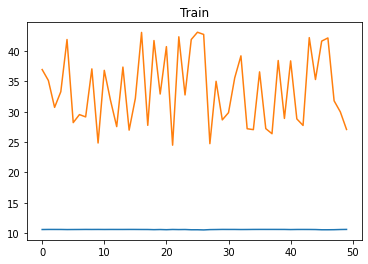

2/2 [==============================] - 2s 10ms/step


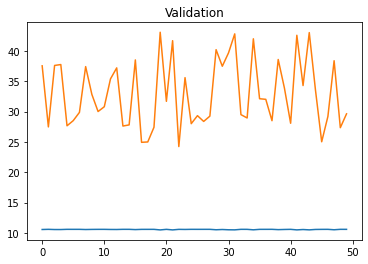

3/3 [==============================] - 0s 6ms/step


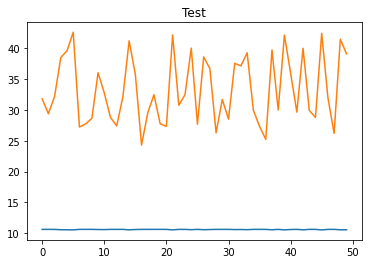

3/3 [==============================] - 0s 5ms/step


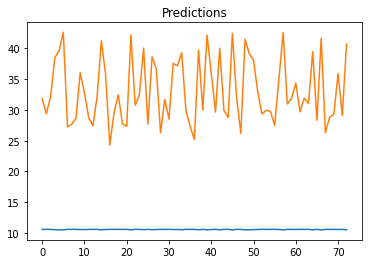

In [18]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_gru/', save_best_only=True)
model = fit_model(model, cp, epochs,  moving_avg_data, target, x_val, y_val)

plot_train("mavg_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_gru_mse = plot_predictions1(model,x_test, y_test)

#### LSTM

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 1063.1106 - root_mean_squared_error: 32.6054

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 49s 5s/step - loss: 1063.1106 - root_mean_squared_error: 32.6054 - val_loss: 1115.1620 - val_root_mean_squared_error: 33.3940
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 1060.8400 - root_mean_squared_error: 32.5705

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 1060.8400 - root_mean_squared_error: 32.5705 - val_loss: 1112.7581 - val_root_mean_squared_error: 33.3580
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 1039.6744 - root_mean_squared_error: 32.2440

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 1058.5447 - root_mean_squared_error: 32.5353 - val_loss: 1110.6187 - val_root_mean_squared_error: 33.3259
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 1059.4036 - root_mean_squared_error: 32.5485

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 1056.5480 - root_mean_squared_error: 32.5046 - val_loss: 1108.6788 - val_root_mean_squared_error: 33.2968
Epoch 5/50
5/8 [=================>............] - ETA: 0s - loss: 1065.7367 - root_mean_squared_error: 32.6456

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 1054.6611 - root_mean_squared_error: 32.4755 - val_loss: 1106.7657 - val_root_mean_squared_error: 33.2681
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 1065.1305 - root_mean_squared_error: 32.6363

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 1052.8013 - root_mean_squared_error: 32.4469 - val_loss: 1104.8824 - val_root_mean_squared_error: 33.2398
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 1056.9552 - root_mean_squared_error: 32.5108

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 1050.9246 - root_mean_squared_error: 32.4180 - val_loss: 1102.8690 - val_root_mean_squared_error: 33.2095
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 1052.1326 - root_mean_squared_error: 32.4366

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 1048.8481 - root_mean_squared_error: 32.3859 - val_loss: 1100.6835 - val_root_mean_squared_error: 33.1766
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 1044.5819 - root_mean_squared_error: 32.3200

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 1046.7854 - root_mean_squared_error: 32.3541 - val_loss: 1098.6874 - val_root_mean_squared_error: 33.1465
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 1044.8621 - root_mean_squared_error: 32.3243

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 1044.8621 - root_mean_squared_error: 32.3243 - val_loss: 1096.7227 - val_root_mean_squared_error: 33.1168
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 1044.7122 - root_mean_squared_error: 32.3220

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 1042.9240 - root_mean_squared_error: 32.2943 - val_loss: 1094.6926 - val_root_mean_squared_error: 33.0861
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 1042.7371 - root_mean_squared_error: 32.2914

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 1040.9022 - root_mean_squared_error: 32.2630 - val_loss: 1092.5801 - val_root_mean_squared_error: 33.0542
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 1037.2527 - root_mean_squared_error: 32.2064

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 1038.8309 - root_mean_squared_error: 32.2309 - val_loss: 1090.4270 - val_root_mean_squared_error: 33.0216
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 1036.7097 - root_mean_squared_error: 32.1980

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 32s 4s/step - loss: 1036.7097 - root_mean_squared_error: 32.1980 - val_loss: 1088.1951 - val_root_mean_squared_error: 32.9878
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 1031.3367 - root_mean_squared_error: 32.1144

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 1034.4950 - root_mean_squared_error: 32.1636 - val_loss: 1085.8586 - val_root_mean_squared_error: 32.9524
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 1032.1481 - root_mean_squared_error: 32.1271

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 1032.1481 - root_mean_squared_error: 32.1271 - val_loss: 1083.3375 - val_root_mean_squared_error: 32.9141
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 1021.1191 - root_mean_squared_error: 31.9550

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 1029.6155 - root_mean_squared_error: 32.0876 - val_loss: 1080.8756 - val_root_mean_squared_error: 32.8767
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 1053.1454 - root_mean_squared_error: 32.4522

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 1027.1367 - root_mean_squared_error: 32.0490 - val_loss: 1078.1464 - val_root_mean_squared_error: 32.8351
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 1027.6086 - root_mean_squared_error: 32.0563

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 1024.4414 - root_mean_squared_error: 32.0069 - val_loss: 1075.2349 - val_root_mean_squared_error: 32.7908
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 1034.0856 - root_mean_squared_error: 32.1572

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 1021.6640 - root_mean_squared_error: 31.9635 - val_loss: 1072.4878 - val_root_mean_squared_error: 32.7489
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 1018.1265 - root_mean_squared_error: 31.9081

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 1019.0023 - root_mean_squared_error: 31.9218 - val_loss: 1069.7360 - val_root_mean_squared_error: 32.7068
Epoch 22/50
5/8 [=================>............] - ETA: 0s - loss: 1036.7224 - root_mean_squared_error: 32.1982

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 1016.2987 - root_mean_squared_error: 31.8794 - val_loss: 1066.9487 - val_root_mean_squared_error: 32.6642
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 1026.9077 - root_mean_squared_error: 32.0454

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 1013.5461 - root_mean_squared_error: 31.8362 - val_loss: 1064.1160 - val_root_mean_squared_error: 32.6208
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 1008.6026 - root_mean_squared_error: 31.7585

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 1010.7418 - root_mean_squared_error: 31.7922 - val_loss: 1061.2065 - val_root_mean_squared_error: 32.5762
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 1006.5676 - root_mean_squared_error: 31.7264

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 1007.8629 - root_mean_squared_error: 31.7469 - val_loss: 1058.0695 - val_root_mean_squared_error: 32.5280
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 1002.7917 - root_mean_squared_error: 31.6669

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 1004.7907 - root_mean_squared_error: 31.6984 - val_loss: 1055.0264 - val_root_mean_squared_error: 32.4812
Epoch 27/50
5/8 [=================>............] - ETA: 0s - loss: 994.3942 - root_mean_squared_error: 31.5340 

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 1001.8389 - root_mean_squared_error: 31.6518 - val_loss: 1051.9783 - val_root_mean_squared_error: 32.4342
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 1000.4341 - root_mean_squared_error: 31.6296

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 998.8448 - root_mean_squared_error: 31.6045 - val_loss: 1048.8458 - val_root_mean_squared_error: 32.3859
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 995.7623 - root_mean_squared_error: 31.5557

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 995.7623 - root_mean_squared_error: 31.5557 - val_loss: 1045.6196 - val_root_mean_squared_error: 32.3360
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 992.6115 - root_mean_squared_error: 31.5057 

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 992.6115 - root_mean_squared_error: 31.5057 - val_loss: 1042.2836 - val_root_mean_squared_error: 32.2844
Epoch 31/50
5/8 [=================>............] - ETA: 0s - loss: 969.0827 - root_mean_squared_error: 31.1301

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 989.1984 - root_mean_squared_error: 31.4515 - val_loss: 1038.5552 - val_root_mean_squared_error: 32.2266
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 986.3918 - root_mean_squared_error: 31.4069

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 985.5306 - root_mean_squared_error: 31.3932 - val_loss: 1034.7292 - val_root_mean_squared_error: 32.1672
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 986.5981 - root_mean_squared_error: 31.4102

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 981.7180 - root_mean_squared_error: 31.3324 - val_loss: 1030.7404 - val_root_mean_squared_error: 32.1051
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 974.6513 - root_mean_squared_error: 31.2194

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 977.8312 - root_mean_squared_error: 31.2703 - val_loss: 1026.7100 - val_root_mean_squared_error: 32.0423
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 973.9186 - root_mean_squared_error: 31.2077

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 973.8545 - root_mean_squared_error: 31.2066 - val_loss: 1022.3718 - val_root_mean_squared_error: 31.9745
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 963.6336 - root_mean_squared_error: 31.0424

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 969.4354 - root_mean_squared_error: 31.1358 - val_loss: 1017.8144 - val_root_mean_squared_error: 31.9032
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 965.0389 - root_mean_squared_error: 31.0651

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 965.0389 - root_mean_squared_error: 31.0651 - val_loss: 1013.3928 - val_root_mean_squared_error: 31.8338
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 974.2336 - root_mean_squared_error: 31.2127

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 960.8492 - root_mean_squared_error: 30.9976 - val_loss: 1009.0533 - val_root_mean_squared_error: 31.7656
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 952.5980 - root_mean_squared_error: 30.8642

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 956.5461 - root_mean_squared_error: 30.9281 - val_loss: 1004.6552 - val_root_mean_squared_error: 31.6963
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 952.3027 - root_mean_squared_error: 30.8594

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 952.3027 - root_mean_squared_error: 30.8594 - val_loss: 1000.0157 - val_root_mean_squared_error: 31.6230
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 965.9767 - root_mean_squared_error: 31.0802

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 947.2344 - root_mean_squared_error: 30.7772 - val_loss: 994.0776 - val_root_mean_squared_error: 31.5290
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 941.7238 - root_mean_squared_error: 30.6875

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 941.7238 - root_mean_squared_error: 30.6875 - val_loss: 988.8261 - val_root_mean_squared_error: 31.4456
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 936.8845 - root_mean_squared_error: 30.6086

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 936.8067 - root_mean_squared_error: 30.6073 - val_loss: 984.2477 - val_root_mean_squared_error: 31.3727
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 932.6418 - root_mean_squared_error: 30.5392

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 932.6418 - root_mean_squared_error: 30.5392 - val_loss: 980.1277 - val_root_mean_squared_error: 31.3070
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 931.3005 - root_mean_squared_error: 30.5172

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 928.6315 - root_mean_squared_error: 30.4735 - val_loss: 976.0126 - val_root_mean_squared_error: 31.2412
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 915.6214 - root_mean_squared_error: 30.2592

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 924.6738 - root_mean_squared_error: 30.4084 - val_loss: 972.0998 - val_root_mean_squared_error: 31.1785
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 932.2366 - root_mean_squared_error: 30.5326

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 920.8748 - root_mean_squared_error: 30.3459 - val_loss: 968.2098 - val_root_mean_squared_error: 31.1161
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 910.4225 - root_mean_squared_error: 30.1732

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 917.1031 - root_mean_squared_error: 30.2837 - val_loss: 964.3870 - val_root_mean_squared_error: 31.0546
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 914.4359 - root_mean_squared_error: 30.2396

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 913.4554 - root_mean_squared_error: 30.2234 - val_loss: 960.5966 - val_root_mean_squared_error: 30.9935
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 904.7388 - root_mean_squared_error: 30.0789

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 8ms/step


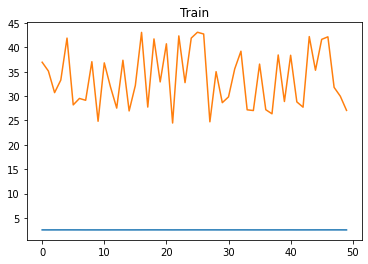

2/2 [==============================] - 1s 6ms/step


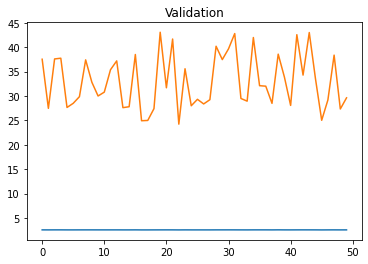

3/3 [==============================] - 0s 57ms/step


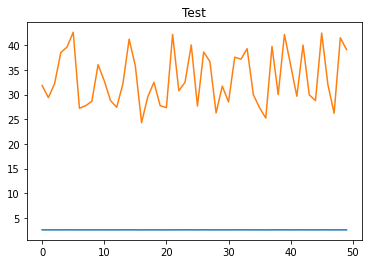

3/3 [==============================] - 0s 5ms/step


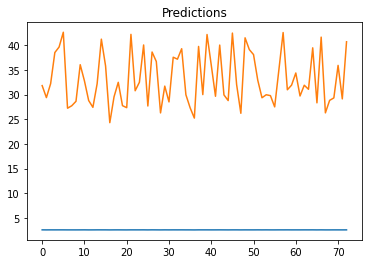

In [19]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 1078.2894 - root_mean_squared_error: 32.8373 INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 19s 2s/step - loss: 1074.6931 - root_mean_squared_error: 32.7825 - val_loss: 1111.0333 - val_root_mean_squared_error: 33.3322
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 1018.4288 - root_mean_squared_error: 31.9128INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 1055.9503 - root_mean_squared_error: 32.4954 - val_loss: 1092.3671 - val_root_mean_squared_error: 33.0510
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 1041.2023 - root_mean_squared_error: 32.2677INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1037.1399 - root_mean_squared_error: 32.2047 - val_loss: 1073.6360 - val_root_mean_squared_error: 32.7664
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 1018.4072 - root_mean_squared_error: 31.9125INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 1018.3555 - root_mean_squared_error: 31.9117 - val_loss: 1054.9221 - val_root_mean_squared_error: 32.4796
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 999.9886 - root_mean_squared_error: 31.6226INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 999.5605 - root_mean_squared_error: 31.6158 - val_loss: 1036.4387 - val_root_mean_squared_error: 32.1938
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 957.4387 - root_mean_squared_error: 30.9425INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 981.0331 - root_mean_squared_error: 31.3214 - val_loss: 1018.1909 - val_root_mean_squared_error: 31.9091
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 962.6655 - root_mean_squared_error: 31.0269INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 962.6655 - root_mean_squared_error: 31.0269 - val_loss: 1000.3431 - val_root_mean_squared_error: 31.6282
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 944.7280 - root_mean_squared_error: 30.7364INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 944.7280 - root_mean_squared_error: 30.7364 - val_loss: 982.7792 - val_root_mean_squared_error: 31.3493
Epoch 9/50
5/8 [=================>............] - ETA: 0s - loss: 909.2662 - root_mean_squared_error: 30.1540INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 927.0707 - root_mean_squared_error: 30.4478 - val_loss: 965.5746 - val_root_mean_squared_error: 31.0737
Epoch 10/50
4/8 [==============>...............] - ETA: 0s - loss: 904.2681 - root_mean_squared_error: 30.0711INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 909.8737 - root_mean_squared_error: 30.1641 - val_loss: 948.7619 - val_root_mean_squared_error: 30.8020
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 893.0154 - root_mean_squared_error: 29.8834INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 893.0154 - root_mean_squared_error: 29.8834 - val_loss: 932.3081 - val_root_mean_squared_error: 30.5337
Epoch 12/50
5/8 [=================>............] - ETA: 0s - loss: 887.7786 - root_mean_squared_error: 29.7956INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 876.5637 - root_mean_squared_error: 29.6068 - val_loss: 916.1581 - val_root_mean_squared_error: 30.2681
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 862.5403 - root_mean_squared_error: 29.3690INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 860.4125 - root_mean_squared_error: 29.3328 - val_loss: 900.3808 - val_root_mean_squared_error: 30.0063
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 845.9448 - root_mean_squared_error: 29.0851INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 844.7241 - root_mean_squared_error: 29.0641 - val_loss: 885.0482 - val_root_mean_squared_error: 29.7498
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 826.7444 - root_mean_squared_error: 28.7532INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 829.6072 - root_mean_squared_error: 28.8029 - val_loss: 870.1661 - val_root_mean_squared_error: 29.4986
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 814.9127 - root_mean_squared_error: 28.5467INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 814.9127 - root_mean_squared_error: 28.5467 - val_loss: 855.6896 - val_root_mean_squared_error: 29.2522
Epoch 17/50
4/8 [==============>...............] - ETA: 0s - loss: 817.5862 - root_mean_squared_error: 28.5935INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 800.7994 - root_mean_squared_error: 28.2984 - val_loss: 841.6672 - val_root_mean_squared_error: 29.0115
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 805.7475 - root_mean_squared_error: 28.3857INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 787.2828 - root_mean_squared_error: 28.0586 - val_loss: 828.1740 - val_root_mean_squared_error: 28.7780
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 789.3644 - root_mean_squared_error: 28.0956INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 774.3473 - root_mean_squared_error: 27.8271 - val_loss: 815.5011 - val_root_mean_squared_error: 28.5570
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 756.2234 - root_mean_squared_error: 27.4995INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 762.1411 - root_mean_squared_error: 27.6069 - val_loss: 803.4049 - val_root_mean_squared_error: 28.3444
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 747.8283 - root_mean_squared_error: 27.3464INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 750.5450 - root_mean_squared_error: 27.3961 - val_loss: 791.8189 - val_root_mean_squared_error: 28.1393
Epoch 22/50
5/8 [=================>............] - ETA: 0s - loss: 739.0939 - root_mean_squared_error: 27.1863INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 739.5296 - root_mean_squared_error: 27.1943 - val_loss: 780.7208 - val_root_mean_squared_error: 27.9414
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 730.8378 - root_mean_squared_error: 27.0340INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 728.9032 - root_mean_squared_error: 26.9982 - val_loss: 770.1287 - val_root_mean_squared_error: 27.7512
Epoch 24/50
5/8 [=================>............] - ETA: 0s - loss: 724.5050 - root_mean_squared_error: 26.9166INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 718.8412 - root_mean_squared_error: 26.8112 - val_loss: 760.0070 - val_root_mean_squared_error: 27.5682
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 698.9880 - root_mean_squared_error: 26.4384INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 709.1885 - root_mean_squared_error: 26.6306 - val_loss: 750.3862 - val_root_mean_squared_error: 27.3932
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 712.6955 - root_mean_squared_error: 26.6964INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 699.9445 - root_mean_squared_error: 26.4565 - val_loss: 740.3795 - val_root_mean_squared_error: 27.2099
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 690.8423 - root_mean_squared_error: 26.2839INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 690.0890 - root_mean_squared_error: 26.2695 - val_loss: 731.4836 - val_root_mean_squared_error: 27.0460
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 679.9710 - root_mean_squared_error: 26.0763INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 681.3882 - root_mean_squared_error: 26.1034 - val_loss: 722.7050 - val_root_mean_squared_error: 26.8832
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 678.3740 - root_mean_squared_error: 26.0456INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 673.2153 - root_mean_squared_error: 25.9464 - val_loss: 714.5092 - val_root_mean_squared_error: 26.7303
Epoch 30/50
5/8 [=================>............] - ETA: 0s - loss: 656.7435 - root_mean_squared_error: 25.6270INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 665.3654 - root_mean_squared_error: 25.7947 - val_loss: 706.5983 - val_root_mean_squared_error: 26.5819
Epoch 31/50
5/8 [=================>............] - ETA: 0s - loss: 661.1476 - root_mean_squared_error: 25.7128INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 657.9360 - root_mean_squared_error: 25.6503 - val_loss: 699.0631 - val_root_mean_squared_error: 26.4398
Epoch 32/50
6/8 [=====================>........] - ETA: 0s - loss: 645.7388 - root_mean_squared_error: 25.4114INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 650.8163 - root_mean_squared_error: 25.5111 - val_loss: 691.8978 - val_root_mean_squared_error: 26.3039
Epoch 33/50
5/8 [=================>............] - ETA: 0s - loss: 649.4197 - root_mean_squared_error: 25.4837INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 644.0982 - root_mean_squared_error: 25.3791 - val_loss: 685.0159 - val_root_mean_squared_error: 26.1728
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 637.6245 - root_mean_squared_error: 25.2512INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 637.6245 - root_mean_squared_error: 25.2512 - val_loss: 678.4522 - val_root_mean_squared_error: 26.0471
Epoch 35/50
5/8 [=================>............] - ETA: 0s - loss: 614.7946 - root_mean_squared_error: 24.7951INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 631.4143 - root_mean_squared_error: 25.1280 - val_loss: 672.1568 - val_root_mean_squared_error: 25.9260
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 624.8893 - root_mean_squared_error: 24.9978INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 625.4842 - root_mean_squared_error: 25.0097 - val_loss: 666.0059 - val_root_mean_squared_error: 25.8071
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 619.6730 - root_mean_squared_error: 24.8932INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 619.6730 - root_mean_squared_error: 24.8932 - val_loss: 660.0840 - val_root_mean_squared_error: 25.6921
Epoch 38/50
5/8 [=================>............] - ETA: 0s - loss: 605.7806 - root_mean_squared_error: 24.6126INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 614.1260 - root_mean_squared_error: 24.7816 - val_loss: 654.3178 - val_root_mean_squared_error: 25.5796
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 620.9280 - root_mean_squared_error: 24.9184INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 608.6792 - root_mean_squared_error: 24.6714 - val_loss: 648.6946 - val_root_mean_squared_error: 25.4695
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 606.4450 - root_mean_squared_error: 24.6261INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 603.3647 - root_mean_squared_error: 24.5635 - val_loss: 643.2039 - val_root_mean_squared_error: 25.3615
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 608.3817 - root_mean_squared_error: 24.6654INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 598.2087 - root_mean_squared_error: 24.4583 - val_loss: 637.9154 - val_root_mean_squared_error: 25.2570
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 577.5655 - root_mean_squared_error: 24.0326INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 593.1904 - root_mean_squared_error: 24.3555 - val_loss: 632.7508 - val_root_mean_squared_error: 25.1545
Epoch 43/50
5/8 [=================>............] - ETA: 0s - loss: 589.0836 - root_mean_squared_error: 24.2710INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 588.2656 - root_mean_squared_error: 24.2542 - val_loss: 627.6280 - val_root_mean_squared_error: 25.0525
Epoch 44/50
5/8 [=================>............] - ETA: 0s - loss: 578.8990 - root_mean_squared_error: 24.0603INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 583.4157 - root_mean_squared_error: 24.1540 - val_loss: 622.5940 - val_root_mean_squared_error: 24.9518
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 579.5934 - root_mean_squared_error: 24.0747INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 578.6358 - root_mean_squared_error: 24.0548 - val_loss: 617.6714 - val_root_mean_squared_error: 24.8530
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 555.8479 - root_mean_squared_error: 23.5764INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 573.9226 - root_mean_squared_error: 23.9567 - val_loss: 612.8184 - val_root_mean_squared_error: 24.7552
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 567.5259 - root_mean_squared_error: 23.8228INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 569.2628 - root_mean_squared_error: 23.8592 - val_loss: 607.9963 - val_root_mean_squared_error: 24.6576
Epoch 48/50
6/8 [=====================>........] - ETA: 0s - loss: 565.6920 - root_mean_squared_error: 23.7843INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 564.6661 - root_mean_squared_error: 23.7627 - val_loss: 603.2185 - val_root_mean_squared_error: 24.5605
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 560.4725 - root_mean_squared_error: 23.6743INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 560.1080 - root_mean_squared_error: 23.6666 - val_loss: 598.4739 - val_root_mean_squared_error: 24.4637
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 555.5600 - root_mean_squared_error: 23.5703INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 4ms/step


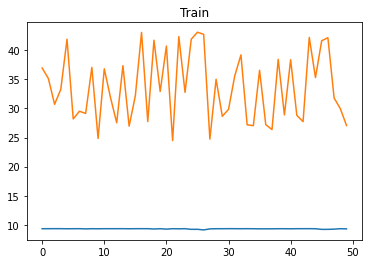

2/2 [==============================] - 2s 7ms/step


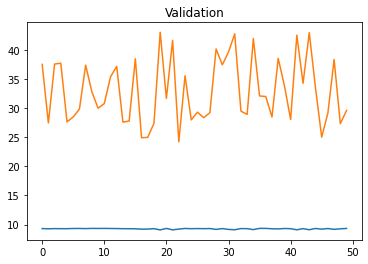

3/3 [==============================] - 0s 10ms/step


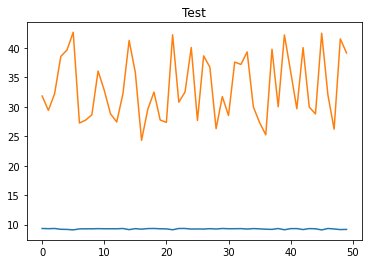

3/3 [==============================] - 0s 4ms/step


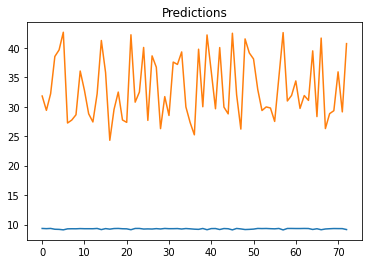

In [20]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_rnn_mse = plot_predictions1(model,x_test, y_test)

# AutoEncoder

### CNN

Epoch 1/50
5/8 [=================>............] - ETA: 0s - loss: 39009.0859 - root_mean_squared_error: 197.5072 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 9s 709ms/step - loss: 34629.7109 - root_mean_squared_error: 186.0906 - val_loss: 358.2457 - val_root_mean_squared_error: 18.9274
Epoch 2/50
8/8 [==============================] - 0s 44ms/step - loss: 26756.9570 - root_mean_squared_error: 163.5755 - val_loss: 476.7228 - val_root_mean_squared_error: 21.8340
Epoch 3/50
8/8 [==============================] - 0s 43ms/step - loss: 21279.0117 - root_mean_squared_error: 145.8733 - val_loss: 491.5214 - val_root_mean_squared_error: 22.1703
Epoch 4/50
8/8 [==============================] - 0s 47ms/step - loss: 21677.0938 - root_mean_squared_error: 147.2314 - val_loss: 1135.4628 - val_root_mean_squared_error: 33.6966
Epoch 5/50
5/8 [=================>............] - ETA: 0s - loss: 19706.8242 - root_mean_squared_error: 140.3810

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 690ms/step - loss: 18918.7969 - root_mean_squared_error: 137.5456 - val_loss: 226.7036 - val_root_mean_squared_error: 15.0567
Epoch 6/50
8/8 [==============================] - 0s 36ms/step - loss: 18080.0273 - root_mean_squared_error: 134.4620 - val_loss: 242.0786 - val_root_mean_squared_error: 15.5589
Epoch 7/50
8/8 [==============================] - 0s 53ms/step - loss: 17313.6133 - root_mean_squared_error: 131.5812 - val_loss: 954.0905 - val_root_mean_squared_error: 30.8884
Epoch 8/50
8/8 [==============================] - 0s 48ms/step - loss: 17826.6777 - root_mean_squared_error: 133.5166 - val_loss: 1060.9198 - val_root_mean_squared_error: 32.5718
Epoch 9/50
8/8 [==============================] - 0s 47ms/step - loss: 15760.3018 - root_mean_squared_error: 125.5400 - val_loss: 361.8742 - val_root_mean_squared_error: 19.0230
Epoch 10/50
8/8 [==============================] - 0s 59ms/step - loss: 14260.8203 - root_mean_squared_error: 119.4187 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 878ms/step - loss: 14186.2568 - root_mean_squared_error: 119.1061 - val_loss: 160.3454 - val_root_mean_squared_error: 12.6628
Epoch 14/50
8/8 [==============================] - 0s 17ms/step - loss: 12348.7656 - root_mean_squared_error: 111.1250 - val_loss: 173.5214 - val_root_mean_squared_error: 13.1728
Epoch 15/50
8/8 [==============================] - 0s 52ms/step - loss: 11983.2305 - root_mean_squared_error: 109.4679 - val_loss: 176.5855 - val_root_mean_squared_error: 13.2885
Epoch 16/50
8/8 [==============================] - 0s 39ms/step - loss: 12510.2383 - root_mean_squared_error: 111.8492 - val_loss: 371.6059 - val_root_mean_squared_error: 19.2771
Epoch 17/50
8/8 [==============================] - 0s 49ms/step - loss: 10627.2568 - root_mean_squared_error: 103.0886 - val_loss: 745.0842 - val_root_mean_squared_error: 27.2962
Epoch 18/50
8/8 [==============================] - 0s 38ms/step - loss: 9179.5586 - root_mean_squared_error: 95.8100

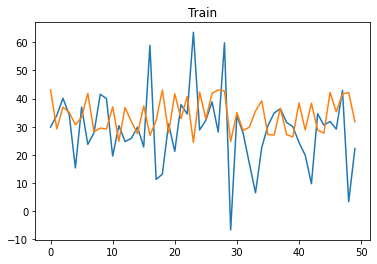

2/2 [==============================] - 1s 6ms/step


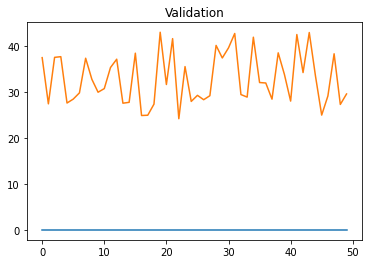

3/3 [==============================] - 0s 5ms/step


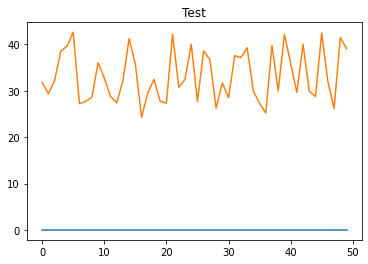

3/3 [==============================] - 0s 15ms/step


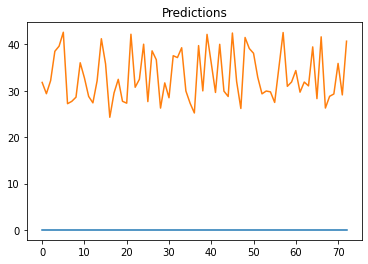

In [21]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [22]:
auto_cnn_mse

1122.4959153725442

### GRU

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 1130.4210 - root_mean_squared_error: 33.6217 

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 39s 4s/step - loss: 1130.6066 - root_mean_squared_error: 33.6245 - val_loss: 1175.1392 - val_root_mean_squared_error: 34.2803
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 1116.7050 - root_mean_squared_error: 33.4171

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 1118.3419 - root_mean_squared_error: 33.4416 - val_loss: 1162.8451 - val_root_mean_squared_error: 34.1005
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 1103.2051 - root_mean_squared_error: 33.2145

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 3s/step - loss: 1105.0355 - root_mean_squared_error: 33.2421 - val_loss: 1150.7211 - val_root_mean_squared_error: 33.9223
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 1093.5933 - root_mean_squared_error: 33.0695

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 1093.5933 - root_mean_squared_error: 33.0695 - val_loss: 1138.7451 - val_root_mean_squared_error: 33.7453
Epoch 5/50
5/8 [=================>............] - ETA: 0s - loss: 1066.9839 - root_mean_squared_error: 32.6647

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 1080.8751 - root_mean_squared_error: 32.8767 - val_loss: 1126.8762 - val_root_mean_squared_error: 33.5690
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 1069.3417 - root_mean_squared_error: 32.7008

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 1069.5347 - root_mean_squared_error: 32.7037 - val_loss: 1115.0875 - val_root_mean_squared_error: 33.3929
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 1057.8304 - root_mean_squared_error: 32.5243

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 1057.8304 - root_mean_squared_error: 32.5243 - val_loss: 1103.2610 - val_root_mean_squared_error: 33.2154
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 1046.9922 - root_mean_squared_error: 32.3573

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 1046.9922 - root_mean_squared_error: 32.3573 - val_loss: 1091.2300 - val_root_mean_squared_error: 33.0338
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 1036.5028 - root_mean_squared_error: 32.1948

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 1035.1991 - root_mean_squared_error: 32.1745 - val_loss: 1078.6709 - val_root_mean_squared_error: 32.8431
Epoch 10/50
5/8 [=================>............] - ETA: 0s - loss: 1040.7155 - root_mean_squared_error: 32.2601

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 1023.4427 - root_mean_squared_error: 31.9913 - val_loss: 1066.4604 - val_root_mean_squared_error: 32.6567
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 1012.2257 - root_mean_squared_error: 31.8155

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 1011.2299 - root_mean_squared_error: 31.7998 - val_loss: 1054.3525 - val_root_mean_squared_error: 32.4708
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 997.3780 - root_mean_squared_error: 31.5813 

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 1000.5400 - root_mean_squared_error: 31.6313 - val_loss: 1042.1862 - val_root_mean_squared_error: 32.2829
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 988.0133 - root_mean_squared_error: 31.4327 

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 988.0133 - root_mean_squared_error: 31.4327 - val_loss: 1029.9171 - val_root_mean_squared_error: 32.0923
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 972.2106 - root_mean_squared_error: 31.1803 

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 974.3381 - root_mean_squared_error: 31.2144 - val_loss: 1017.5392 - val_root_mean_squared_error: 31.8989
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 964.2010 - root_mean_squared_error: 31.0516

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 964.2010 - root_mean_squared_error: 31.0516 - val_loss: 1005.0135 - val_root_mean_squared_error: 31.7019
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 947.7499 - root_mean_squared_error: 30.7855

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 950.1852 - root_mean_squared_error: 30.8251 - val_loss: 992.3063 - val_root_mean_squared_error: 31.5009
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 934.9516 - root_mean_squared_error: 30.5770

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 938.9658 - root_mean_squared_error: 30.6425 - val_loss: 979.3634 - val_root_mean_squared_error: 31.2948
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 924.5468 - root_mean_squared_error: 30.4064

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 925.8798 - root_mean_squared_error: 30.4283 - val_loss: 966.2227 - val_root_mean_squared_error: 31.0841
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 903.4655 - root_mean_squared_error: 30.0577

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 911.2964 - root_mean_squared_error: 30.1877 - val_loss: 952.7350 - val_root_mean_squared_error: 30.8664
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 896.4981 - root_mean_squared_error: 29.9416

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 896.6572 - root_mean_squared_error: 29.9442 - val_loss: 938.9418 - val_root_mean_squared_error: 30.6422
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 889.0266 - root_mean_squared_error: 29.8165

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 886.5416 - root_mean_squared_error: 29.7748 - val_loss: 924.9227 - val_root_mean_squared_error: 30.4125
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 873.1965 - root_mean_squared_error: 29.5499

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 873.1965 - root_mean_squared_error: 29.5499 - val_loss: 910.7917 - val_root_mean_squared_error: 30.1793
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 858.5658 - root_mean_squared_error: 29.3013

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 857.6744 - root_mean_squared_error: 29.2861 - val_loss: 896.3716 - val_root_mean_squared_error: 29.9395
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 842.1146 - root_mean_squared_error: 29.0192

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 842.1146 - root_mean_squared_error: 29.0192 - val_loss: 881.7285 - val_root_mean_squared_error: 29.6939
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 826.8009 - root_mean_squared_error: 28.7541

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 830.1885 - root_mean_squared_error: 28.8130 - val_loss: 866.9932 - val_root_mean_squared_error: 29.4447
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 835.4487 - root_mean_squared_error: 28.9041

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 814.2582 - root_mean_squared_error: 28.5352 - val_loss: 852.0677 - val_root_mean_squared_error: 29.1902
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 807.6642 - root_mean_squared_error: 28.4194

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 804.6295 - root_mean_squared_error: 28.3660 - val_loss: 837.3029 - val_root_mean_squared_error: 28.9362
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 787.5691 - root_mean_squared_error: 28.0637

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 786.8179 - root_mean_squared_error: 28.0503 - val_loss: 822.6346 - val_root_mean_squared_error: 28.6816
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 773.0576 - root_mean_squared_error: 27.8039

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 774.1992 - root_mean_squared_error: 27.8244 - val_loss: 808.1020 - val_root_mean_squared_error: 28.4271
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 758.9202 - root_mean_squared_error: 27.5485

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 758.9202 - root_mean_squared_error: 27.5485 - val_loss: 793.7181 - val_root_mean_squared_error: 28.1730
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 745.6011 - root_mean_squared_error: 27.3057

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 745.6011 - root_mean_squared_error: 27.3057 - val_loss: 779.8777 - val_root_mean_squared_error: 27.9263
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 732.3356 - root_mean_squared_error: 27.0617

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 730.5732 - root_mean_squared_error: 27.0291 - val_loss: 766.3685 - val_root_mean_squared_error: 27.6834
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 717.9627 - root_mean_squared_error: 26.7948

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 719.6373 - root_mean_squared_error: 26.8261 - val_loss: 753.3653 - val_root_mean_squared_error: 27.4475
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 704.4552 - root_mean_squared_error: 26.5416

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 705.5114 - root_mean_squared_error: 26.5615 - val_loss: 740.8632 - val_root_mean_squared_error: 27.2188
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 691.1576 - root_mean_squared_error: 26.2899

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 692.7739 - root_mean_squared_error: 26.3206 - val_loss: 728.7811 - val_root_mean_squared_error: 26.9959
Epoch 36/50
5/8 [=================>............] - ETA: 0s - loss: 687.8102 - root_mean_squared_error: 26.2261

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 683.7520 - root_mean_squared_error: 26.1487 - val_loss: 717.1520 - val_root_mean_squared_error: 26.7797
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 671.0505 - root_mean_squared_error: 25.9046

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 671.0505 - root_mean_squared_error: 25.9046 - val_loss: 705.8894 - val_root_mean_squared_error: 26.5686
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 681.3682 - root_mean_squared_error: 26.1030

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 664.7379 - root_mean_squared_error: 25.7825 - val_loss: 694.8673 - val_root_mean_squared_error: 26.3603
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 652.4445 - root_mean_squared_error: 25.5430

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 652.4445 - root_mean_squared_error: 25.5430 - val_loss: 683.7279 - val_root_mean_squared_error: 26.1482
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 623.8826 - root_mean_squared_error: 24.9776

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 639.7213 - root_mean_squared_error: 25.2927 - val_loss: 673.5740 - val_root_mean_squared_error: 25.9533
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 620.7545 - root_mean_squared_error: 24.9149

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 627.6058 - root_mean_squared_error: 25.0521 - val_loss: 662.5213 - val_root_mean_squared_error: 25.7395
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 620.8849 - root_mean_squared_error: 24.9176

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 620.8849 - root_mean_squared_error: 24.9176 - val_loss: 653.0009 - val_root_mean_squared_error: 25.5539
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 618.4862 - root_mean_squared_error: 24.8694

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 614.9552 - root_mean_squared_error: 24.7983 - val_loss: 644.0301 - val_root_mean_squared_error: 25.3777
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 604.0219 - root_mean_squared_error: 24.5769

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 604.0219 - root_mean_squared_error: 24.5769 - val_loss: 635.3964 - val_root_mean_squared_error: 25.2071
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 597.5776 - root_mean_squared_error: 24.4454

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 594.3245 - root_mean_squared_error: 24.3788 - val_loss: 627.0527 - val_root_mean_squared_error: 25.0410
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 580.5942 - root_mean_squared_error: 24.0955

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 580.5942 - root_mean_squared_error: 24.0955 - val_loss: 618.9451 - val_root_mean_squared_error: 24.8786
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 581.3012 - root_mean_squared_error: 24.1102

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 578.2140 - root_mean_squared_error: 24.0461 - val_loss: 611.0547 - val_root_mean_squared_error: 24.7195
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 569.4345 - root_mean_squared_error: 23.8628

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 569.2480 - root_mean_squared_error: 23.8589 - val_loss: 603.4249 - val_root_mean_squared_error: 24.5647
Epoch 49/50
6/8 [=====================>........] - ETA: 0s - loss: 562.5172 - root_mean_squared_error: 23.7174

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 564.5961 - root_mean_squared_error: 23.7612 - val_loss: 595.9669 - val_root_mean_squared_error: 24.4124
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 564.5038 - root_mean_squared_error: 23.7593

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 3s 10ms/step


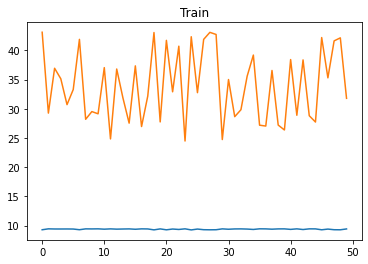

2/2 [==============================] - 3s 9ms/step


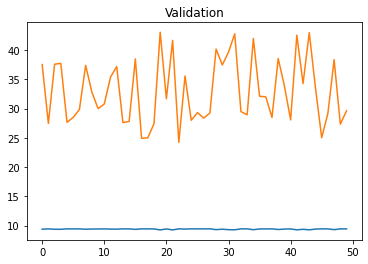

3/3 [==============================] - 0s 8ms/step


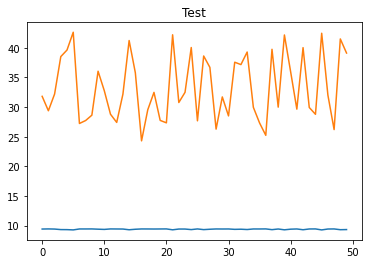

3/3 [==============================] - 0s 6ms/step


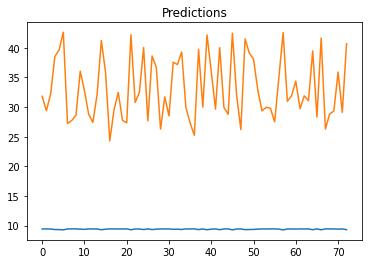

In [23]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [24]:
auto_gru_mse

590.7944749298183

### LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 1097.2516 - root_mean_squared_error: 33.1248 

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 38s 4s/step - loss: 1089.5696 - root_mean_squared_error: 33.0086 - val_loss: 1132.7227 - val_root_mean_squared_error: 33.6559
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 1088.9073 - root_mean_squared_error: 32.9986

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 1084.7627 - root_mean_squared_error: 32.9357 - val_loss: 1124.8910 - val_root_mean_squared_error: 33.5394
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 1080.5359 - root_mean_squared_error: 32.8715

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 1080.5359 - root_mean_squared_error: 32.8715 - val_loss: 1118.1021 - val_root_mean_squared_error: 33.4380
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 1074.4708 - root_mean_squared_error: 32.7791

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 1074.4708 - root_mean_squared_error: 32.7791 - val_loss: 1112.3472 - val_root_mean_squared_error: 33.3519
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 1070.5712 - root_mean_squared_error: 32.7196

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 1069.2433 - root_mean_squared_error: 32.6993 - val_loss: 1107.8425 - val_root_mean_squared_error: 33.2843
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 1063.3058 - root_mean_squared_error: 32.6084

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 1063.3058 - root_mean_squared_error: 32.6084 - val_loss: 1103.6584 - val_root_mean_squared_error: 33.2214
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 1059.4569 - root_mean_squared_error: 32.5493

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 1057.2609 - root_mean_squared_error: 32.5155 - val_loss: 1101.4156 - val_root_mean_squared_error: 33.1876
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 1056.5275 - root_mean_squared_error: 32.5043

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 1055.6439 - root_mean_squared_error: 32.4907 - val_loss: 1097.9958 - val_root_mean_squared_error: 33.1360
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 1053.9465 - root_mean_squared_error: 32.4645

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 1050.9911 - root_mean_squared_error: 32.4190 - val_loss: 1095.2024 - val_root_mean_squared_error: 33.0938
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 1047.6675 - root_mean_squared_error: 32.3677

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 1047.6675 - root_mean_squared_error: 32.3677 - val_loss: 1092.0348 - val_root_mean_squared_error: 33.0459
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 1045.4735 - root_mean_squared_error: 32.3338

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 1043.7643 - root_mean_squared_error: 32.3073 - val_loss: 1089.0850 - val_root_mean_squared_error: 33.0013
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 1028.9109 - root_mean_squared_error: 32.0766

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 1039.5535 - root_mean_squared_error: 32.2421 - val_loss: 1085.9913 - val_root_mean_squared_error: 32.9544
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 1038.4141 - root_mean_squared_error: 32.2244

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 1036.4003 - root_mean_squared_error: 32.1932 - val_loss: 1082.3500 - val_root_mean_squared_error: 32.8991
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 1024.2563 - root_mean_squared_error: 32.0040

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 1030.6404 - root_mean_squared_error: 32.1036 - val_loss: 1079.2152 - val_root_mean_squared_error: 32.8514
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 1025.9532 - root_mean_squared_error: 32.0305

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 1025.9532 - root_mean_squared_error: 32.0305 - val_loss: 1075.6613 - val_root_mean_squared_error: 32.7973
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 1020.8580 - root_mean_squared_error: 31.9509

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 1022.4794 - root_mean_squared_error: 31.9762 - val_loss: 1067.7937 - val_root_mean_squared_error: 32.6771
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 1020.2211 - root_mean_squared_error: 31.9409

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 1013.6431 - root_mean_squared_error: 31.8378 - val_loss: 1058.7432 - val_root_mean_squared_error: 32.5383
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 992.2968 - root_mean_squared_error: 31.5007 

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 1006.3232 - root_mean_squared_error: 31.7226 - val_loss: 1047.4646 - val_root_mean_squared_error: 32.3646
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 987.5916 - root_mean_squared_error: 31.4260 

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 993.6145 - root_mean_squared_error: 31.5217 - val_loss: 1034.6761 - val_root_mean_squared_error: 32.1664
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 983.5443 - root_mean_squared_error: 31.3615

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 983.5443 - root_mean_squared_error: 31.3615 - val_loss: 1023.4790 - val_root_mean_squared_error: 31.9919
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 980.9088 - root_mean_squared_error: 31.3195 

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 972.0973 - root_mean_squared_error: 31.1785 - val_loss: 1012.5308 - val_root_mean_squared_error: 31.8203
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 956.9999 - root_mean_squared_error: 30.9354

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 960.4699 - root_mean_squared_error: 30.9914 - val_loss: 999.4216 - val_root_mean_squared_error: 31.6136
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 945.5326 - root_mean_squared_error: 30.7495

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 949.2650 - root_mean_squared_error: 30.8101 - val_loss: 985.9822 - val_root_mean_squared_error: 31.4004
Epoch 24/50
5/8 [=================>............] - ETA: 0s - loss: 913.5189 - root_mean_squared_error: 30.2245

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 936.7131 - root_mean_squared_error: 30.6058 - val_loss: 974.6382 - val_root_mean_squared_error: 31.2192
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 919.3513 - root_mean_squared_error: 30.3208

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 925.9689 - root_mean_squared_error: 30.4297 - val_loss: 963.8076 - val_root_mean_squared_error: 31.0452
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 913.5612 - root_mean_squared_error: 30.2252

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 914.9227 - root_mean_squared_error: 30.2477 - val_loss: 953.2121 - val_root_mean_squared_error: 30.8741
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 899.2380 - root_mean_squared_error: 29.9873

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 901.8015 - root_mean_squared_error: 30.0300 - val_loss: 943.0300 - val_root_mean_squared_error: 30.7088
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 901.4952 - root_mean_squared_error: 30.0249

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 896.4935 - root_mean_squared_error: 29.9415 - val_loss: 932.9304 - val_root_mean_squared_error: 30.5439
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 888.3986 - root_mean_squared_error: 29.8060

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 885.6598 - root_mean_squared_error: 29.7600 - val_loss: 922.7479 - val_root_mean_squared_error: 30.3768
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 879.0856 - root_mean_squared_error: 29.6494

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 873.6877 - root_mean_squared_error: 29.5582 - val_loss: 913.5240 - val_root_mean_squared_error: 30.2246
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 870.6753 - root_mean_squared_error: 29.5072

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 868.8625 - root_mean_squared_error: 29.4765 - val_loss: 903.4916 - val_root_mean_squared_error: 30.0581
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 858.4439 - root_mean_squared_error: 29.2992

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 856.3537 - root_mean_squared_error: 29.2635 - val_loss: 893.7468 - val_root_mean_squared_error: 29.8956
Epoch 33/50
5/8 [=================>............] - ETA: 0s - loss: 827.0168 - root_mean_squared_error: 28.7579

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 845.8708 - root_mean_squared_error: 29.0839 - val_loss: 881.8106 - val_root_mean_squared_error: 29.6953
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 840.1754 - root_mean_squared_error: 28.9858

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 833.5294 - root_mean_squared_error: 28.8709 - val_loss: 869.0012 - val_root_mean_squared_error: 29.4788
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 819.8261 - root_mean_squared_error: 28.6326

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 819.8261 - root_mean_squared_error: 28.6326 - val_loss: 856.5510 - val_root_mean_squared_error: 29.2669
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 809.7484 - root_mean_squared_error: 28.4561

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 806.4939 - root_mean_squared_error: 28.3988 - val_loss: 845.7826 - val_root_mean_squared_error: 29.0823
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 801.1059 - root_mean_squared_error: 28.3038

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 801.2675 - root_mean_squared_error: 28.3067 - val_loss: 835.7072 - val_root_mean_squared_error: 28.9086
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 787.6486 - root_mean_squared_error: 28.0651

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 790.1429 - root_mean_squared_error: 28.1095 - val_loss: 825.5857 - val_root_mean_squared_error: 28.7330
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 780.1268 - root_mean_squared_error: 27.9307

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 780.4244 - root_mean_squared_error: 27.9361 - val_loss: 815.0111 - val_root_mean_squared_error: 28.5484
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 770.8761 - root_mean_squared_error: 27.7647

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 767.9874 - root_mean_squared_error: 27.7126 - val_loss: 804.3184 - val_root_mean_squared_error: 28.3605
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 754.6409 - root_mean_squared_error: 27.4707

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 754.6409 - root_mean_squared_error: 27.4707 - val_loss: 790.6852 - val_root_mean_squared_error: 28.1191
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 742.4616 - root_mean_squared_error: 27.2481

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 742.4616 - root_mean_squared_error: 27.2481 - val_loss: 779.2945 - val_root_mean_squared_error: 27.9158
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 739.7448 - root_mean_squared_error: 27.1982

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 733.4867 - root_mean_squared_error: 27.0830 - val_loss: 765.8148 - val_root_mean_squared_error: 27.6734
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 721.8253 - root_mean_squared_error: 26.8668

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 721.8253 - root_mean_squared_error: 26.8668 - val_loss: 751.6838 - val_root_mean_squared_error: 27.4169
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 705.7720 - root_mean_squared_error: 26.5664

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 705.7720 - root_mean_squared_error: 26.5664 - val_loss: 740.2350 - val_root_mean_squared_error: 27.2073
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 694.6692 - root_mean_squared_error: 26.3566

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 694.6692 - root_mean_squared_error: 26.3566 - val_loss: 728.8422 - val_root_mean_squared_error: 26.9971
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 686.8046 - root_mean_squared_error: 26.2070

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 684.3913 - root_mean_squared_error: 26.1609 - val_loss: 717.6243 - val_root_mean_squared_error: 26.7885
Epoch 48/50
6/8 [=====================>........] - ETA: 0s - loss: 692.3193 - root_mean_squared_error: 26.3120

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 677.3477 - root_mean_squared_error: 26.0259 - val_loss: 706.6259 - val_root_mean_squared_error: 26.5824
Epoch 49/50
6/8 [=====================>........] - ETA: 0s - loss: 672.8466 - root_mean_squared_error: 25.9393

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 666.9212 - root_mean_squared_error: 25.8248 - val_loss: 695.5516 - val_root_mean_squared_error: 26.3733
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 655.2370 - root_mean_squared_error: 25.5976

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 7ms/step


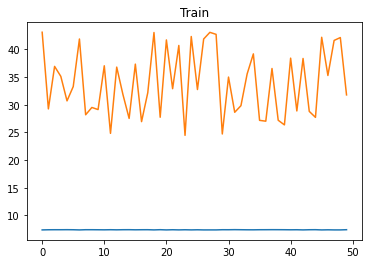

2/2 [==============================] - 3s 19ms/step


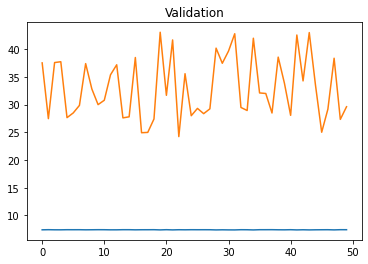

3/3 [==============================] - 0s 9ms/step


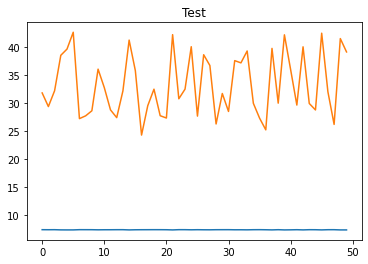

3/3 [==============================] - 0s 5ms/step


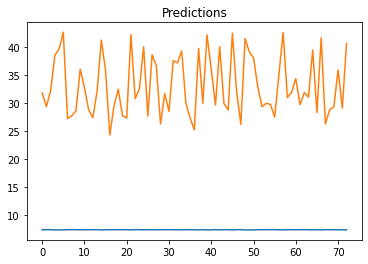

In [25]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dense(8, 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [26]:
auto_lstm_mse

687.4895623974629

### RNN

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 1090.0415 - root_mean_squared_error: 33.0158 INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 20s 2s/step - loss: 1099.0214 - root_mean_squared_error: 33.1515 - val_loss: 1135.5261 - val_root_mean_squared_error: 33.6976
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 1077.2930 - root_mean_squared_error: 32.8221INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1077.1786 - root_mean_squared_error: 32.8204 - val_loss: 1113.9746 - val_root_mean_squared_error: 33.3763
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 1056.4595 - root_mean_squared_error: 32.5032INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1055.8131 - root_mean_squared_error: 32.4933 - val_loss: 1092.7712 - val_root_mean_squared_error: 33.0571
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 1031.5808 - root_mean_squared_error: 32.1182INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 1034.6505 - root_mean_squared_error: 32.1660 - val_loss: 1071.8994 - val_root_mean_squared_error: 32.7399
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 1013.4302 - root_mean_squared_error: 31.8344INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1015.0222 - root_mean_squared_error: 31.8594 - val_loss: 1051.2087 - val_root_mean_squared_error: 32.4223
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 987.3837 - root_mean_squared_error: 31.4227INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 992.5989 - root_mean_squared_error: 31.5055 - val_loss: 1030.8903 - val_root_mean_squared_error: 32.1075
Epoch 7/50
5/8 [=================>............] - ETA: 0s - loss: 979.1158 - root_mean_squared_error: 31.2908 INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 970.8213 - root_mean_squared_error: 31.1580 - val_loss: 1010.8780 - val_root_mean_squared_error: 31.7943
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 952.0076 - root_mean_squared_error: 30.8546INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 952.0076 - root_mean_squared_error: 30.8546 - val_loss: 991.1835 - val_root_mean_squared_error: 31.4831
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 931.6723 - root_mean_squared_error: 30.5233INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 931.7947 - root_mean_squared_error: 30.5253 - val_loss: 971.8470 - val_root_mean_squared_error: 31.1745
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 921.9855 - root_mean_squared_error: 30.3642INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 921.9855 - root_mean_squared_error: 30.3642 - val_loss: 952.9171 - val_root_mean_squared_error: 30.8694
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 887.5347 - root_mean_squared_error: 29.7915INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 897.4007 - root_mean_squared_error: 29.9566 - val_loss: 934.3539 - val_root_mean_squared_error: 30.5672
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 880.3833 - root_mean_squared_error: 29.6713INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 880.3833 - root_mean_squared_error: 29.6713 - val_loss: 915.9653 - val_root_mean_squared_error: 30.2649
Epoch 13/50
5/8 [=================>............] - ETA: 0s - loss: 890.4176 - root_mean_squared_error: 29.8399INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 864.0882 - root_mean_squared_error: 29.3954 - val_loss: 898.2057 - val_root_mean_squared_error: 29.9701
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 848.8024 - root_mean_squared_error: 29.1342INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 848.8024 - root_mean_squared_error: 29.1342 - val_loss: 881.0832 - val_root_mean_squared_error: 29.6830
Epoch 15/50
5/8 [=================>............] - ETA: 0s - loss: 814.7916 - root_mean_squared_error: 28.5446INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 829.2444 - root_mean_squared_error: 28.7966 - val_loss: 864.4266 - val_root_mean_squared_error: 29.4011
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 815.9012 - root_mean_squared_error: 28.5640INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 815.9012 - root_mean_squared_error: 28.5640 - val_loss: 848.1701 - val_root_mean_squared_error: 29.1234
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 800.1026 - root_mean_squared_error: 28.2861INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 866ms/step - loss: 795.8340 - root_mean_squared_error: 28.2105 - val_loss: 832.5144 - val_root_mean_squared_error: 28.8533
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 781.0891 - root_mean_squared_error: 27.9480INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 777.0795 - root_mean_squared_error: 27.8761 - val_loss: 817.5311 - val_root_mean_squared_error: 28.5925
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 771.6376 - root_mean_squared_error: 27.7784INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 771.6376 - root_mean_squared_error: 27.7784 - val_loss: 803.3258 - val_root_mean_squared_error: 28.3430
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 748.1700 - root_mean_squared_error: 27.3527INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 752.4761 - root_mean_squared_error: 27.4313 - val_loss: 789.7702 - val_root_mean_squared_error: 28.1028
Epoch 21/50
3/8 [==========>...................] - ETA: 0s - loss: 776.3301 - root_mean_squared_error: 27.8627INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 740.7158 - root_mean_squared_error: 27.2161 - val_loss: 776.7350 - val_root_mean_squared_error: 27.8700
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 729.2798 - root_mean_squared_error: 27.0052INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 734.5006 - root_mean_squared_error: 27.1017 - val_loss: 764.3788 - val_root_mean_squared_error: 27.6474
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 711.5576 - root_mean_squared_error: 26.6750INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 722.0214 - root_mean_squared_error: 26.8705 - val_loss: 752.6161 - val_root_mean_squared_error: 27.4338
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 703.5542 - root_mean_squared_error: 26.5246INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 703.5542 - root_mean_squared_error: 26.5246 - val_loss: 741.4797 - val_root_mean_squared_error: 27.2301
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 689.1340 - root_mean_squared_error: 26.2514INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 698.9669 - root_mean_squared_error: 26.4380 - val_loss: 730.9958 - val_root_mean_squared_error: 27.0369
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 694.8952 - root_mean_squared_error: 26.3609INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 685.6784 - root_mean_squared_error: 26.1855 - val_loss: 721.1521 - val_root_mean_squared_error: 26.8543
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 678.7630 - root_mean_squared_error: 26.0531INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 675.7368 - root_mean_squared_error: 25.9949 - val_loss: 711.8013 - val_root_mean_squared_error: 26.6796
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 663.0041 - root_mean_squared_error: 25.7489INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 665.0189 - root_mean_squared_error: 25.7880 - val_loss: 702.8527 - val_root_mean_squared_error: 26.5114
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 650.1500 - root_mean_squared_error: 25.4980INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 660.2375 - root_mean_squared_error: 25.6951 - val_loss: 694.2201 - val_root_mean_squared_error: 26.3481
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 656.5570 - root_mean_squared_error: 25.6234INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 653.2554 - root_mean_squared_error: 25.5589 - val_loss: 685.8965 - val_root_mean_squared_error: 26.1896
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 640.8959 - root_mean_squared_error: 25.3159INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 640.8959 - root_mean_squared_error: 25.3159 - val_loss: 677.9711 - val_root_mean_squared_error: 26.0379
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 644.7329 - root_mean_squared_error: 25.3916INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 20s 3s/step - loss: 637.3496 - root_mean_squared_error: 25.2458 - val_loss: 670.3556 - val_root_mean_squared_error: 25.8912
Epoch 33/50
5/8 [=================>............] - ETA: 0s - loss: 621.5698 - root_mean_squared_error: 24.9313INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 883ms/step - loss: 622.0330 - root_mean_squared_error: 24.9406 - val_loss: 663.1190 - val_root_mean_squared_error: 25.7511
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 625.9717 - root_mean_squared_error: 25.0194INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 623.0547 - root_mean_squared_error: 24.9611 - val_loss: 656.2120 - val_root_mean_squared_error: 25.6166
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 597.5192 - root_mean_squared_error: 24.4442INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 604.9129 - root_mean_squared_error: 24.5950 - val_loss: 649.5261 - val_root_mean_squared_error: 25.4858
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 603.7661 - root_mean_squared_error: 24.5717INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 608.1975 - root_mean_squared_error: 24.6617 - val_loss: 643.0405 - val_root_mean_squared_error: 25.3582
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 596.3448 - root_mean_squared_error: 24.4202INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 596.3448 - root_mean_squared_error: 24.4202 - val_loss: 636.8112 - val_root_mean_squared_error: 25.2351
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 588.1469 - root_mean_squared_error: 24.2517INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 592.3925 - root_mean_squared_error: 24.3391 - val_loss: 630.7806 - val_root_mean_squared_error: 25.1153
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 564.8215 - root_mean_squared_error: 23.7660INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 586.2696 - root_mean_squared_error: 24.2130 - val_loss: 624.9293 - val_root_mean_squared_error: 24.9986
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 585.1846 - root_mean_squared_error: 24.1906INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 584.9907 - root_mean_squared_error: 24.1866 - val_loss: 619.2889 - val_root_mean_squared_error: 24.8855
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 591.7206 - root_mean_squared_error: 24.3253INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 583.5612 - root_mean_squared_error: 24.1570 - val_loss: 613.8683 - val_root_mean_squared_error: 24.7764
Epoch 42/50
5/8 [=================>............] - ETA: 0s - loss: 586.8976 - root_mean_squared_error: 24.2260INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 578.6254 - root_mean_squared_error: 24.0546 - val_loss: 608.6425 - val_root_mean_squared_error: 24.6707
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 556.5247 - root_mean_squared_error: 23.5908INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 571.3815 - root_mean_squared_error: 23.9036 - val_loss: 603.5896 - val_root_mean_squared_error: 24.5681
Epoch 44/50
5/8 [=================>............] - ETA: 0s - loss: 554.0773 - root_mean_squared_error: 23.5388INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 563.8001 - root_mean_squared_error: 23.7445 - val_loss: 598.6423 - val_root_mean_squared_error: 24.4672
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 565.5551 - root_mean_squared_error: 23.7814INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 565.5551 - root_mean_squared_error: 23.7814 - val_loss: 593.8198 - val_root_mean_squared_error: 24.3684
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 553.0353 - root_mean_squared_error: 23.5167INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 558.8704 - root_mean_squared_error: 23.6404 - val_loss: 589.1355 - val_root_mean_squared_error: 24.2721
Epoch 47/50
5/8 [=================>............] - ETA: 0s - loss: 527.3347 - root_mean_squared_error: 22.9638INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 550.3151 - root_mean_squared_error: 23.4588 - val_loss: 584.5555 - val_root_mean_squared_error: 24.1776
Epoch 48/50
6/8 [=====================>........] - ETA: 0s - loss: 535.7370 - root_mean_squared_error: 23.1460INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 550.2685 - root_mean_squared_error: 23.4578 - val_loss: 580.0701 - val_root_mean_squared_error: 24.0846
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 547.6180 - root_mean_squared_error: 23.4012INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 977ms/step - loss: 544.9651 - root_mean_squared_error: 23.3445 - val_loss: 575.6844 - val_root_mean_squared_error: 23.9934
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 537.4779 - root_mean_squared_error: 23.1836INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 14ms/step


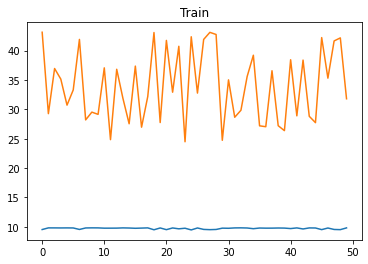

2/2 [==============================] - 2s 842ms/step


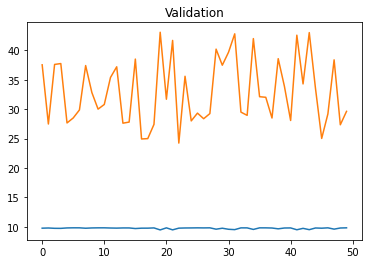

3/3 [==============================] - 0s 7ms/step


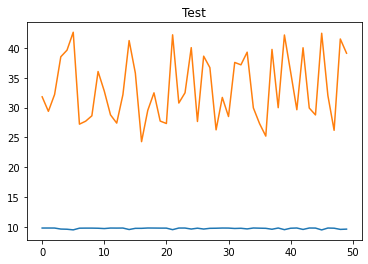

3/3 [==============================] - 0s 4ms/step


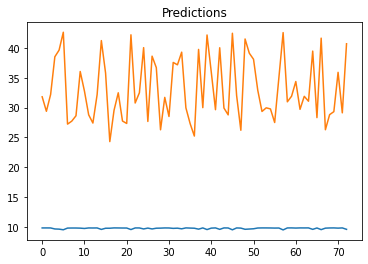

In [27]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [28]:
auto_rnn_mse

573.5812478358018

# Moving Average with Encoder

### CNN

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 153526.0781 - root_mean_squared_error: 391.8240 

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 12s 1s/step - loss: 141919.1406 - root_mean_squared_error: 376.7216 - val_loss: 42319.3984 - val_root_mean_squared_error: 205.7168
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 74513.6016 - root_mean_squared_error: 272.9718

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 819ms/step - loss: 73232.0234 - root_mean_squared_error: 270.6142 - val_loss: 13245.0059 - val_root_mean_squared_error: 115.0870
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 40537.5430 - root_mean_squared_error: 201.3394

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 810ms/step - loss: 36033.1406 - root_mean_squared_error: 189.8240 - val_loss: 919.8509 - val_root_mean_squared_error: 30.3290
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 24376.5488 - root_mean_squared_error: 156.1299

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 799ms/step - loss: 24845.2344 - root_mean_squared_error: 157.6237 - val_loss: 829.2794 - val_root_mean_squared_error: 28.7972
Epoch 5/50
8/8 [==============================] - 0s 26ms/step - loss: 12159.6650 - root_mean_squared_error: 110.2709 - val_loss: 2695.4705 - val_root_mean_squared_error: 51.9179
Epoch 6/50
8/8 [==============================] - 0s 45ms/step - loss: 13067.2686 - root_mean_squared_error: 114.3122 - val_loss: 3647.3328 - val_root_mean_squared_error: 60.3932
Epoch 7/50
8/8 [==============================] - 0s 33ms/step - loss: 11854.5654 - root_mean_squared_error: 108.8787 - val_loss: 3377.5115 - val_root_mean_squared_error: 58.1164
Epoch 8/50
8/8 [==============================] - 0s 23ms/step - loss: 10923.6904 - root_mean_squared_error: 104.5165 - val_loss: 2202.2671 - val_root_mean_squared_error: 46.9283
Epoch 9/50
8/8 [==============================] - 0s 64ms/step - loss: 10899.7715 - root_mean_squared_error: 104.402

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 617ms/step - loss: 9525.6152 - root_mean_squared_error: 97.5993 - val_loss: 781.9528 - val_root_mean_squared_error: 27.9634
Epoch 11/50
8/8 [==============================] - 0s 24ms/step - loss: 8619.1279 - root_mean_squared_error: 92.8393 - val_loss: 995.7445 - val_root_mean_squared_error: 31.5554
Epoch 12/50
8/8 [==============================] - 0s 29ms/step - loss: 7959.9634 - root_mean_squared_error: 89.2186 - val_loss: 1115.7969 - val_root_mean_squared_error: 33.4035
Epoch 13/50
8/8 [==============================] - 0s 30ms/step - loss: 6386.1846 - root_mean_squared_error: 79.9136 - val_loss: 1120.2882 - val_root_mean_squared_error: 33.4707
Epoch 14/50
8/8 [==============================] - 0s 35ms/step - loss: 5283.4219 - root_mean_squared_error: 72.6871 - val_loss: 1120.2925 - val_root_mean_squared_error: 33.4708
Epoch 15/50
8/8 [==============================] - 0s 27ms/step - loss: 5862.5986 - root_mean_squared_error: 76.5676 - val_

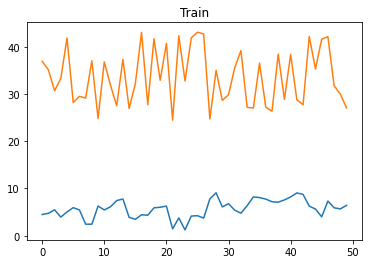

2/2 [==============================] - 1s 10ms/step


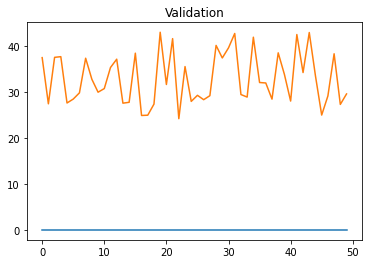

3/3 [==============================] - 0s 3ms/step


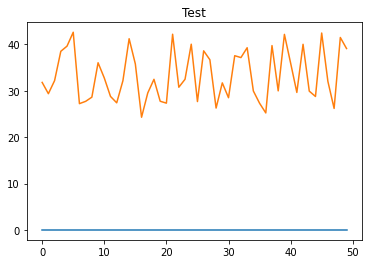

3/3 [==============================] - 0s 5ms/step


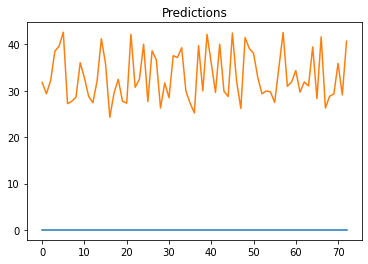

In [29]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_autoencoder_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [30]:
mavg_auto_cnn_mse

1123.632195829848

### RNN

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 1043.2617 - root_mean_squared_error: 32.2996 INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 1046.9744 - root_mean_squared_error: 32.3570 - val_loss: 1080.1213 - val_root_mean_squared_error: 32.8652
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 1006.0931 - root_mean_squared_error: 31.7190INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1019.7194 - root_mean_squared_error: 31.9330 - val_loss: 1053.5330 - val_root_mean_squared_error: 32.4582
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 993.2469 - root_mean_squared_error: 31.5158 INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 999.2663 - root_mean_squared_error: 31.6112 - val_loss: 1031.1199 - val_root_mean_squared_error: 32.1111
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 968.1852 - root_mean_squared_error: 31.1157INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 972.5786 - root_mean_squared_error: 31.1862 - val_loss: 1009.7825 - val_root_mean_squared_error: 31.7771
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 952.8906 - root_mean_squared_error: 30.8689INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 953.5832 - root_mean_squared_error: 30.8801 - val_loss: 989.0320 - val_root_mean_squared_error: 31.4489
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 928.0642 - root_mean_squared_error: 30.4641INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 927.6238 - root_mean_squared_error: 30.4569 - val_loss: 968.8836 - val_root_mean_squared_error: 31.1269
Epoch 7/50
4/8 [==============>...............] - ETA: 0s - loss: 883.7648 - root_mean_squared_error: 29.7282INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 910.6912 - root_mean_squared_error: 30.1777 - val_loss: 949.4583 - val_root_mean_squared_error: 30.8133
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 893.6897 - root_mean_squared_error: 29.8946INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 893.6897 - root_mean_squared_error: 29.8946 - val_loss: 930.2773 - val_root_mean_squared_error: 30.5004
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 872.2913 - root_mean_squared_error: 29.5346INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 872.2913 - root_mean_squared_error: 29.5346 - val_loss: 911.8653 - val_root_mean_squared_error: 30.1971
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 854.4457 - root_mean_squared_error: 29.2309INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 854.4457 - root_mean_squared_error: 29.2309 - val_loss: 893.8639 - val_root_mean_squared_error: 29.8976
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 846.1022 - root_mean_squared_error: 29.0878INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 839.1464 - root_mean_squared_error: 28.9680 - val_loss: 875.9796 - val_root_mean_squared_error: 29.5970
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 819.7651 - root_mean_squared_error: 28.6315INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 18s 3s/step - loss: 821.8041 - root_mean_squared_error: 28.6671 - val_loss: 858.5070 - val_root_mean_squared_error: 29.3003
Epoch 13/50
5/8 [=================>............] - ETA: 0s - loss: 777.3690 - root_mean_squared_error: 27.8813INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 797.3287 - root_mean_squared_error: 28.2370 - val_loss: 841.3756 - val_root_mean_squared_error: 29.0065
Epoch 14/50
5/8 [=================>............] - ETA: 0s - loss: 803.6142 - root_mean_squared_error: 28.3481INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 790.5565 - root_mean_squared_error: 28.1168 - val_loss: 824.6591 - val_root_mean_squared_error: 28.7169
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 752.5969 - root_mean_squared_error: 27.4335INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 772.0387 - root_mean_squared_error: 27.7856 - val_loss: 808.6577 - val_root_mean_squared_error: 28.4369
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 754.6654 - root_mean_squared_error: 27.4712INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 758.9032 - root_mean_squared_error: 27.5482 - val_loss: 793.1386 - val_root_mean_squared_error: 28.1627
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 745.9526 - root_mean_squared_error: 27.3121INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 745.6082 - root_mean_squared_error: 27.3058 - val_loss: 778.4418 - val_root_mean_squared_error: 27.9006
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 735.6221 - root_mean_squared_error: 27.1224INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 731.4184 - root_mean_squared_error: 27.0447 - val_loss: 764.5195 - val_root_mean_squared_error: 27.6499
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 690.1171 - root_mean_squared_error: 26.2701INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 715.9282 - root_mean_squared_error: 26.7568 - val_loss: 751.3928 - val_root_mean_squared_error: 27.4115
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 699.4792 - root_mean_squared_error: 26.4477INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 699.4792 - root_mean_squared_error: 26.4477 - val_loss: 738.9946 - val_root_mean_squared_error: 27.1845
Epoch 21/50
5/8 [=================>............] - ETA: 0s - loss: 694.9388 - root_mean_squared_error: 26.3617INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 693.9928 - root_mean_squared_error: 26.3437 - val_loss: 727.2260 - val_root_mean_squared_error: 26.9671
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 673.8610 - root_mean_squared_error: 25.9588INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 673.7139 - root_mean_squared_error: 25.9560 - val_loss: 716.0760 - val_root_mean_squared_error: 26.7596
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 654.6623 - root_mean_squared_error: 25.5864INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 666.9452 - root_mean_squared_error: 25.8253 - val_loss: 705.4178 - val_root_mean_squared_error: 26.5597
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 659.3021 - root_mean_squared_error: 25.6769INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 20s 3s/step - loss: 659.3021 - root_mean_squared_error: 25.6769 - val_loss: 695.1029 - val_root_mean_squared_error: 26.3648
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 646.9552 - root_mean_squared_error: 25.4353INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 646.9552 - root_mean_squared_error: 25.4353 - val_loss: 685.2050 - val_root_mean_squared_error: 26.1764
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 640.3279 - root_mean_squared_error: 25.3047INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 640.3279 - root_mean_squared_error: 25.3047 - val_loss: 675.8617 - val_root_mean_squared_error: 25.9973
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 638.9362 - root_mean_squared_error: 25.2772INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 635.4196 - root_mean_squared_error: 25.2075 - val_loss: 666.9208 - val_root_mean_squared_error: 25.8248
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 621.3849 - root_mean_squared_error: 24.9276INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 621.3849 - root_mean_squared_error: 24.9276 - val_loss: 658.2314 - val_root_mean_squared_error: 25.6560
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 610.4935 - root_mean_squared_error: 24.7082INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 611.5323 - root_mean_squared_error: 24.7292 - val_loss: 649.8550 - val_root_mean_squared_error: 25.4923
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 599.6846 - root_mean_squared_error: 24.4885INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 607.8946 - root_mean_squared_error: 24.6555 - val_loss: 641.7620 - val_root_mean_squared_error: 25.3330
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 597.8481 - root_mean_squared_error: 24.4509INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 601.1119 - root_mean_squared_error: 24.5176 - val_loss: 633.9370 - val_root_mean_squared_error: 25.1781
Epoch 32/50
5/8 [=================>............] - ETA: 0s - loss: 600.1012 - root_mean_squared_error: 24.4970INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 595.9495 - root_mean_squared_error: 24.4121 - val_loss: 626.4825 - val_root_mean_squared_error: 25.0296
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 579.3627 - root_mean_squared_error: 24.0700INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 579.5693 - root_mean_squared_error: 24.0742 - val_loss: 619.4056 - val_root_mean_squared_error: 24.8879
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 580.9918 - root_mean_squared_error: 24.1038INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 577.2872 - root_mean_squared_error: 24.0268 - val_loss: 612.6046 - val_root_mean_squared_error: 24.7509
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 559.6284 - root_mean_squared_error: 23.6565INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 568.3917 - root_mean_squared_error: 23.8410 - val_loss: 606.1053 - val_root_mean_squared_error: 24.6192
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 563.0944 - root_mean_squared_error: 23.7296INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 560.1161 - root_mean_squared_error: 23.6668 - val_loss: 599.8300 - val_root_mean_squared_error: 24.4914
Epoch 37/50
6/8 [=====================>........] - ETA: 0s - loss: 559.5894 - root_mean_squared_error: 23.6556INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 552.8601 - root_mean_squared_error: 23.5130 - val_loss: 593.7994 - val_root_mean_squared_error: 24.3680
Epoch 38/50
5/8 [=================>............] - ETA: 0s - loss: 548.7775 - root_mean_squared_error: 23.4260INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 547.9062 - root_mean_squared_error: 23.4074 - val_loss: 587.9888 - val_root_mean_squared_error: 24.2485
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 543.9581 - root_mean_squared_error: 23.3229INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 545.8912 - root_mean_squared_error: 23.3643 - val_loss: 582.3505 - val_root_mean_squared_error: 24.1319
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 544.9622 - root_mean_squared_error: 23.3444INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 542.7733 - root_mean_squared_error: 23.2975 - val_loss: 576.8995 - val_root_mean_squared_error: 24.0187
Epoch 41/50
5/8 [=================>............] - ETA: 0s - loss: 544.6026 - root_mean_squared_error: 23.3367INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 536.2606 - root_mean_squared_error: 23.1573 - val_loss: 571.6421 - val_root_mean_squared_error: 23.9090
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 542.0959 - root_mean_squared_error: 23.2830INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 533.1721 - root_mean_squared_error: 23.0905 - val_loss: 566.5590 - val_root_mean_squared_error: 23.8025
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 520.1555 - root_mean_squared_error: 22.8069INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 525.1606 - root_mean_squared_error: 22.9164 - val_loss: 561.6448 - val_root_mean_squared_error: 23.6990
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 521.2427 - root_mean_squared_error: 22.8307INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 520.7933 - root_mean_squared_error: 22.8209 - val_loss: 556.8378 - val_root_mean_squared_error: 23.5974
Epoch 45/50
5/8 [=================>............] - ETA: 0s - loss: 529.4028 - root_mean_squared_error: 23.0088INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 518.5619 - root_mean_squared_error: 22.7720 - val_loss: 552.2003 - val_root_mean_squared_error: 23.4989
Epoch 46/50
5/8 [=================>............] - ETA: 0s - loss: 506.6600 - root_mean_squared_error: 22.5091INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 512.7959 - root_mean_squared_error: 22.6450 - val_loss: 547.7426 - val_root_mean_squared_error: 23.4039
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 512.9896 - root_mean_squared_error: 22.6493INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 510.1556 - root_mean_squared_error: 22.5866 - val_loss: 543.4011 - val_root_mean_squared_error: 23.3110
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 504.9370 - root_mean_squared_error: 22.4708INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 504.9370 - root_mean_squared_error: 22.4708 - val_loss: 539.1846 - val_root_mean_squared_error: 23.2203
Epoch 49/50
4/8 [==============>...............] - ETA: 0s - loss: 517.9518 - root_mean_squared_error: 22.7586INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 504.0063 - root_mean_squared_error: 22.4501 - val_loss: 535.0634 - val_root_mean_squared_error: 23.1314
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 490.5961 - root_mean_squared_error: 22.1494INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 9ms/step


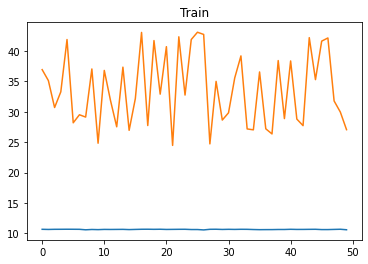

2/2 [==============================] - 2s 6ms/step


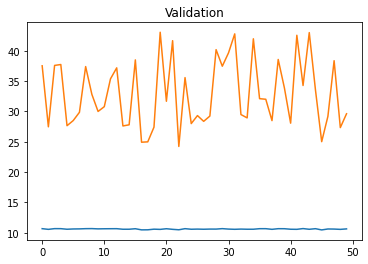

3/3 [==============================] - 3s 45ms/step


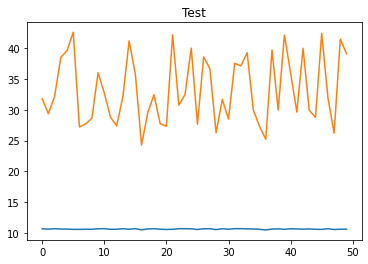

3/3 [==============================] - 0s 4ms/step


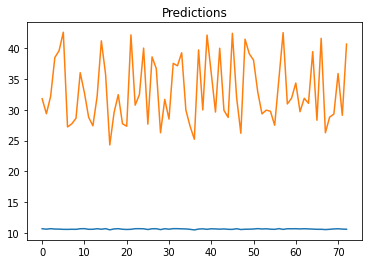

In [31]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs,moving_avg_data,target, x_val, y_val)


plot_train("mavg_auto_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [32]:
mavg_auto_rnn_mse

533.0657607229302

### GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 1044.1876 - root_mean_squared_error: 32.3139 

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 47s 5s/step - loss: 1044.1876 - root_mean_squared_error: 32.3139 - val_loss: 1089.5253 - val_root_mean_squared_error: 33.0080
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 1025.2789 - root_mean_squared_error: 32.0200

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 1033.5500 - root_mean_squared_error: 32.1489 - val_loss: 1078.2437 - val_root_mean_squared_error: 32.8366
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 1027.9390 - root_mean_squared_error: 32.0615

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 1021.6140 - root_mean_squared_error: 31.9627 - val_loss: 1066.6942 - val_root_mean_squared_error: 32.6603
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 1010.2742 - root_mean_squared_error: 31.7848

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 1010.2742 - root_mean_squared_error: 31.7848 - val_loss: 1054.6554 - val_root_mean_squared_error: 32.4755
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 997.6893 - root_mean_squared_error: 31.5862

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 997.6893 - root_mean_squared_error: 31.5862 - val_loss: 1042.5587 - val_root_mean_squared_error: 32.2887
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 984.8010 - root_mean_squared_error: 31.3815

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 984.8010 - root_mean_squared_error: 31.3815 - val_loss: 1030.7762 - val_root_mean_squared_error: 32.1057
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 982.9749 - root_mean_squared_error: 31.3524

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 972.8448 - root_mean_squared_error: 31.1905 - val_loss: 1019.0734 - val_root_mean_squared_error: 31.9229
Epoch 8/50
5/8 [=================>............] - ETA: 0s - loss: 987.8730 - root_mean_squared_error: 31.4304

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 961.0765 - root_mean_squared_error: 31.0012 - val_loss: 1007.2176 - val_root_mean_squared_error: 31.7367
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 948.5914 - root_mean_squared_error: 30.7992

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 949.7468 - root_mean_squared_error: 30.8180 - val_loss: 995.1438 - val_root_mean_squared_error: 31.5459
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 945.1943 - root_mean_squared_error: 30.7440

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 940.3280 - root_mean_squared_error: 30.6648 - val_loss: 982.1593 - val_root_mean_squared_error: 31.3394
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 915.9787 - root_mean_squared_error: 30.2651

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 924.9061 - root_mean_squared_error: 30.4123 - val_loss: 968.1412 - val_root_mean_squared_error: 31.1150
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 912.7546 - root_mean_squared_error: 30.2118

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 912.7546 - root_mean_squared_error: 30.2118 - val_loss: 954.9100 - val_root_mean_squared_error: 30.9016
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 900.1753 - root_mean_squared_error: 30.0029

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 900.1753 - root_mean_squared_error: 30.0029 - val_loss: 941.9581 - val_root_mean_squared_error: 30.6913
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 889.6156 - root_mean_squared_error: 29.8264

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 887.5207 - root_mean_squared_error: 29.7913 - val_loss: 929.0150 - val_root_mean_squared_error: 30.4797
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 871.5800 - root_mean_squared_error: 29.5225

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 871.5800 - root_mean_squared_error: 29.5225 - val_loss: 915.9191 - val_root_mean_squared_error: 30.2642
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 863.8364 - root_mean_squared_error: 29.3911

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 861.5195 - root_mean_squared_error: 29.3517 - val_loss: 902.6146 - val_root_mean_squared_error: 30.0435
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 846.9304 - root_mean_squared_error: 29.1021

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 846.9304 - root_mean_squared_error: 29.1021 - val_loss: 889.1528 - val_root_mean_squared_error: 29.8187
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 840.1279 - root_mean_squared_error: 28.9850

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 833.2002 - root_mean_squared_error: 28.8652 - val_loss: 875.4461 - val_root_mean_squared_error: 29.5879
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 818.9987 - root_mean_squared_error: 28.6182

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 818.9987 - root_mean_squared_error: 28.6182 - val_loss: 861.2150 - val_root_mean_squared_error: 29.3465
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 806.1123 - root_mean_squared_error: 28.3921

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 806.1123 - root_mean_squared_error: 28.3921 - val_loss: 845.2847 - val_root_mean_squared_error: 29.0738
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 792.2072 - root_mean_squared_error: 28.1462

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 792.2072 - root_mean_squared_error: 28.1462 - val_loss: 830.4184 - val_root_mean_squared_error: 28.8170
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 776.7373 - root_mean_squared_error: 27.8700

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 777.1792 - root_mean_squared_error: 27.8779 - val_loss: 815.9892 - val_root_mean_squared_error: 28.5655
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 759.1178 - root_mean_squared_error: 27.5521

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 761.2888 - root_mean_squared_error: 27.5915 - val_loss: 801.4144 - val_root_mean_squared_error: 28.3093
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 748.4278 - root_mean_squared_error: 27.3574

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 748.4278 - root_mean_squared_error: 27.3574 - val_loss: 786.8058 - val_root_mean_squared_error: 28.0501
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 733.2027 - root_mean_squared_error: 27.0777

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 735.8488 - root_mean_squared_error: 27.1265 - val_loss: 772.1567 - val_root_mean_squared_error: 27.7877
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 731.6509 - root_mean_squared_error: 27.0490

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 718.8671 - root_mean_squared_error: 26.8117 - val_loss: 757.1970 - val_root_mean_squared_error: 27.5172
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 703.9791 - root_mean_squared_error: 26.5326

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 702.7377 - root_mean_squared_error: 26.5092 - val_loss: 740.6667 - val_root_mean_squared_error: 27.2152
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 689.5884 - root_mean_squared_error: 26.2600

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 689.5884 - root_mean_squared_error: 26.2600 - val_loss: 725.9594 - val_root_mean_squared_error: 26.9436
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 675.6616 - root_mean_squared_error: 25.9935

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 673.4359 - root_mean_squared_error: 25.9506 - val_loss: 712.1352 - val_root_mean_squared_error: 26.6859
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 649.8651 - root_mean_squared_error: 25.4925

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 662.6182 - root_mean_squared_error: 25.7414 - val_loss: 698.6210 - val_root_mean_squared_error: 26.4314
Epoch 31/50
5/8 [=================>............] - ETA: 0s - loss: 650.1131 - root_mean_squared_error: 25.4973

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 650.6796 - root_mean_squared_error: 25.5084 - val_loss: 685.4927 - val_root_mean_squared_error: 26.1819
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 638.4471 - root_mean_squared_error: 25.2675

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 638.4471 - root_mean_squared_error: 25.2675 - val_loss: 672.8583 - val_root_mean_squared_error: 25.9395
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 628.8390 - root_mean_squared_error: 25.0767

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 628.8390 - root_mean_squared_error: 25.0767 - val_loss: 660.7466 - val_root_mean_squared_error: 25.7050
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 614.4764 - root_mean_squared_error: 24.7886

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 615.2708 - root_mean_squared_error: 24.8047 - val_loss: 649.1011 - val_root_mean_squared_error: 25.4775
Epoch 35/50
5/8 [=================>............] - ETA: 0s - loss: 614.6947 - root_mean_squared_error: 24.7930

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 600.7511 - root_mean_squared_error: 24.5102 - val_loss: 638.1022 - val_root_mean_squared_error: 25.2607
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 593.0081 - root_mean_squared_error: 24.3518

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 592.7113 - root_mean_squared_error: 24.3457 - val_loss: 627.6401 - val_root_mean_squared_error: 25.0527
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 580.8750 - root_mean_squared_error: 24.1013

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 581.9745 - root_mean_squared_error: 24.1241 - val_loss: 617.7648 - val_root_mean_squared_error: 24.8549
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 578.9568 - root_mean_squared_error: 24.0615

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 573.9854 - root_mean_squared_error: 23.9580 - val_loss: 608.4077 - val_root_mean_squared_error: 24.6659
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 560.4147 - root_mean_squared_error: 23.6731

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 560.4147 - root_mean_squared_error: 23.6731 - val_loss: 599.6246 - val_root_mean_squared_error: 24.4872
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 556.4116 - root_mean_squared_error: 23.5884

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 556.4116 - root_mean_squared_error: 23.5884 - val_loss: 591.3162 - val_root_mean_squared_error: 24.3170
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 549.8986 - root_mean_squared_error: 23.4499

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 548.0786 - root_mean_squared_error: 23.4111 - val_loss: 583.3817 - val_root_mean_squared_error: 24.1533
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 545.2614 - root_mean_squared_error: 23.3508

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 542.4778 - root_mean_squared_error: 23.2912 - val_loss: 575.9760 - val_root_mean_squared_error: 23.9995
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 539.1369 - root_mean_squared_error: 23.2193

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 539.1369 - root_mean_squared_error: 23.2193 - val_loss: 569.0553 - val_root_mean_squared_error: 23.8549
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 527.8146 - root_mean_squared_error: 22.9742

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 531.1891 - root_mean_squared_error: 23.0475 - val_loss: 562.4554 - val_root_mean_squared_error: 23.7161
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 534.4953 - root_mean_squared_error: 23.1192

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 523.1937 - root_mean_squared_error: 22.8734 - val_loss: 556.1940 - val_root_mean_squared_error: 23.5838
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 513.1408 - root_mean_squared_error: 22.6526

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 515.9948 - root_mean_squared_error: 22.7155 - val_loss: 550.1921 - val_root_mean_squared_error: 23.4562
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 516.2282 - root_mean_squared_error: 22.7207

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 516.2282 - root_mean_squared_error: 22.7207 - val_loss: 544.4808 - val_root_mean_squared_error: 23.3341
Epoch 48/50
6/8 [=====================>........] - ETA: 0s - loss: 507.6135 - root_mean_squared_error: 22.5303

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 505.7490 - root_mean_squared_error: 22.4889 - val_loss: 539.0581 - val_root_mean_squared_error: 23.2176
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 503.3260 - root_mean_squared_error: 22.4349

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 503.3260 - root_mean_squared_error: 22.4349 - val_loss: 533.8738 - val_root_mean_squared_error: 23.1057
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 499.5824 - root_mean_squared_error: 22.3513

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 3s 12ms/step


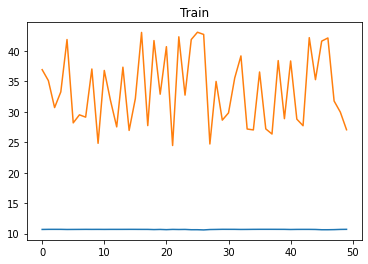

2/2 [==============================] - 2s 9ms/step


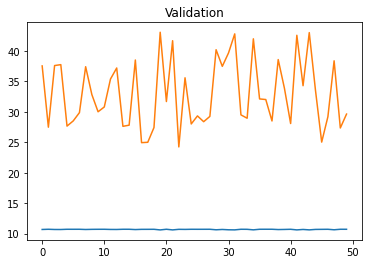

3/3 [==============================] - 0s 7ms/step


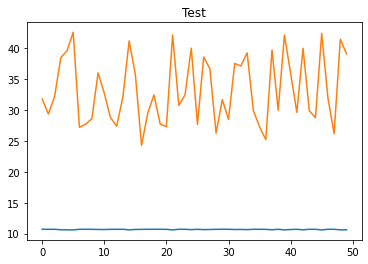

3/3 [==============================] - 0s 8ms/step


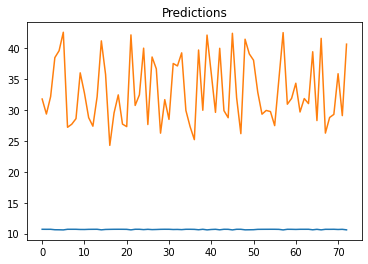

In [33]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_auto_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [34]:
mavg_auto_gru_mse

530.8597572292274

### LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 1062.5879 - root_mean_squared_error: 32.5974 

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 55s 6s/step - loss: 1060.1953 - root_mean_squared_error: 32.5606 - val_loss: 1104.2393 - val_root_mean_squared_error: 33.2301
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 1041.0337 - root_mean_squared_error: 32.2651

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 1049.0403 - root_mean_squared_error: 32.3889 - val_loss: 1093.9724 - val_root_mean_squared_error: 33.0753
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 1049.5345 - root_mean_squared_error: 32.3965

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 1035.3146 - root_mean_squared_error: 32.1763 - val_loss: 1083.3932 - val_root_mean_squared_error: 32.9149
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 1027.4254 - root_mean_squared_error: 32.0535

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 1027.4254 - root_mean_squared_error: 32.0535 - val_loss: 1071.1697 - val_root_mean_squared_error: 32.7287
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 1012.6625 - root_mean_squared_error: 31.8224

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 1012.6625 - root_mean_squared_error: 31.8224 - val_loss: 1058.6086 - val_root_mean_squared_error: 32.5363
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 994.8078 - root_mean_squared_error: 31.5406

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 1001.4774 - root_mean_squared_error: 31.6461 - val_loss: 1043.6849 - val_root_mean_squared_error: 32.3061
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 989.9647 - root_mean_squared_error: 31.4637

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 989.9647 - root_mean_squared_error: 31.4637 - val_loss: 1033.6335 - val_root_mean_squared_error: 32.1502
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 980.4288 - root_mean_squared_error: 31.3118 

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 977.8334 - root_mean_squared_error: 31.2703 - val_loss: 1023.9239 - val_root_mean_squared_error: 31.9988
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 977.0821 - root_mean_squared_error: 31.2583

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 969.8081 - root_mean_squared_error: 31.1417 - val_loss: 1013.5488 - val_root_mean_squared_error: 31.8363
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 981.0032 - root_mean_squared_error: 31.3210

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 956.9191 - root_mean_squared_error: 30.9341 - val_loss: 1001.1913 - val_root_mean_squared_error: 31.6416
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 961.3243 - root_mean_squared_error: 31.0052

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 948.4792 - root_mean_squared_error: 30.7974 - val_loss: 989.8495 - val_root_mean_squared_error: 31.4619
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 935.7028 - root_mean_squared_error: 30.5893

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 935.7028 - root_mean_squared_error: 30.5893 - val_loss: 979.6010 - val_root_mean_squared_error: 31.2986
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 925.2753 - root_mean_squared_error: 30.4183

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 925.4673 - root_mean_squared_error: 30.4215 - val_loss: 969.2186 - val_root_mean_squared_error: 31.1323
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 913.0494 - root_mean_squared_error: 30.2167

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 912.5484 - root_mean_squared_error: 30.2084 - val_loss: 958.5728 - val_root_mean_squared_error: 30.9608
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 905.9561 - root_mean_squared_error: 30.0991

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 905.9561 - root_mean_squared_error: 30.0991 - val_loss: 947.5660 - val_root_mean_squared_error: 30.7826
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 898.6970 - root_mean_squared_error: 29.9783

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 46s 7s/step - loss: 896.3727 - root_mean_squared_error: 29.9395 - val_loss: 936.0847 - val_root_mean_squared_error: 30.5955
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 882.4286 - root_mean_squared_error: 29.7057

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 882.4286 - root_mean_squared_error: 29.7057 - val_loss: 923.6414 - val_root_mean_squared_error: 30.3915
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 869.1703 - root_mean_squared_error: 29.4817

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 41s 5s/step - loss: 869.1703 - root_mean_squared_error: 29.4817 - val_loss: 910.6356 - val_root_mean_squared_error: 30.1767
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 858.1959 - root_mean_squared_error: 29.2950

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 858.1959 - root_mean_squared_error: 29.2950 - val_loss: 898.8580 - val_root_mean_squared_error: 29.9810
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 841.7181 - root_mean_squared_error: 29.0124

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 844.4225 - root_mean_squared_error: 29.0590 - val_loss: 886.2742 - val_root_mean_squared_error: 29.7704
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 833.4288 - root_mean_squared_error: 28.8692

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 833.4288 - root_mean_squared_error: 28.8692 - val_loss: 868.2042 - val_root_mean_squared_error: 29.4653
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 820.0345 - root_mean_squared_error: 28.6362

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 815.4489 - root_mean_squared_error: 28.5561 - val_loss: 854.2714 - val_root_mean_squared_error: 29.2279
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 807.3940 - root_mean_squared_error: 28.4147

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 804.2144 - root_mean_squared_error: 28.3587 - val_loss: 841.0253 - val_root_mean_squared_error: 29.0004
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 792.1783 - root_mean_squared_error: 28.1457

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 789.8962 - root_mean_squared_error: 28.1051 - val_loss: 824.6663 - val_root_mean_squared_error: 28.7170
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 774.5604 - root_mean_squared_error: 27.8309

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 774.5604 - root_mean_squared_error: 27.8309 - val_loss: 809.6385 - val_root_mean_squared_error: 28.4541
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 760.8801 - root_mean_squared_error: 27.5841

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 48s 7s/step - loss: 759.3613 - root_mean_squared_error: 27.5565 - val_loss: 796.9709 - val_root_mean_squared_error: 28.2307
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 746.3654 - root_mean_squared_error: 27.3197

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 746.3654 - root_mean_squared_error: 27.3197 - val_loss: 783.3708 - val_root_mean_squared_error: 27.9888
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 732.1143 - root_mean_squared_error: 27.0576

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 732.1143 - root_mean_squared_error: 27.0576 - val_loss: 771.3947 - val_root_mean_squared_error: 27.7740
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 722.7583 - root_mean_squared_error: 26.8842

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 722.7583 - root_mean_squared_error: 26.8842 - val_loss: 759.8065 - val_root_mean_squared_error: 27.5646
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 710.6855 - root_mean_squared_error: 26.6587

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 712.5073 - root_mean_squared_error: 26.6928 - val_loss: 748.0594 - val_root_mean_squared_error: 27.3507
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 697.6647 - root_mean_squared_error: 26.4133

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 699.7413 - root_mean_squared_error: 26.4526 - val_loss: 736.9200 - val_root_mean_squared_error: 27.1463
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 691.4821 - root_mean_squared_error: 26.2960

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 690.3420 - root_mean_squared_error: 26.2744 - val_loss: 725.8279 - val_root_mean_squared_error: 26.9412
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 690.7898 - root_mean_squared_error: 26.2829

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 682.7166 - root_mean_squared_error: 26.1288 - val_loss: 713.1450 - val_root_mean_squared_error: 26.7048
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 669.5139 - root_mean_squared_error: 25.8750

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 666.7643 - root_mean_squared_error: 25.8218 - val_loss: 701.9903 - val_root_mean_squared_error: 26.4951
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 654.6035 - root_mean_squared_error: 25.5852

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 656.1248 - root_mean_squared_error: 25.6149 - val_loss: 691.5653 - val_root_mean_squared_error: 26.2976
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 645.7503 - root_mean_squared_error: 25.4116

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 648.6793 - root_mean_squared_error: 25.4692 - val_loss: 678.8720 - val_root_mean_squared_error: 26.0552
Epoch 37/50
6/8 [=====================>........] - ETA: 0s - loss: 631.2917 - root_mean_squared_error: 25.1255

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 633.2070 - root_mean_squared_error: 25.1636 - val_loss: 664.2422 - val_root_mean_squared_error: 25.7729
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 616.9379 - root_mean_squared_error: 24.8382

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 619.5181 - root_mean_squared_error: 24.8901 - val_loss: 654.5239 - val_root_mean_squared_error: 25.5837
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 612.4191 - root_mean_squared_error: 24.7471

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 612.4191 - root_mean_squared_error: 24.7471 - val_loss: 645.3191 - val_root_mean_squared_error: 25.4031
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 596.5096 - root_mean_squared_error: 24.4235

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 596.5096 - root_mean_squared_error: 24.4235 - val_loss: 636.4911 - val_root_mean_squared_error: 25.2288
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 597.8768 - root_mean_squared_error: 24.4515

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 597.8768 - root_mean_squared_error: 24.4515 - val_loss: 627.9394 - val_root_mean_squared_error: 25.0587
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 583.7623 - root_mean_squared_error: 24.1612

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 583.7623 - root_mean_squared_error: 24.1612 - val_loss: 619.6888 - val_root_mean_squared_error: 24.8936
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 576.7477 - root_mean_squared_error: 24.0156

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 576.2554 - root_mean_squared_error: 24.0053 - val_loss: 611.6641 - val_root_mean_squared_error: 24.7318
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 577.5124 - root_mean_squared_error: 24.0315

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 574.4070 - root_mean_squared_error: 23.9668 - val_loss: 603.9081 - val_root_mean_squared_error: 24.5745
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 565.6230 - root_mean_squared_error: 23.7828

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 565.6230 - root_mean_squared_error: 23.7828 - val_loss: 596.4966 - val_root_mean_squared_error: 24.4233
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 558.1996 - root_mean_squared_error: 23.6262

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 557.4301 - root_mean_squared_error: 23.6100 - val_loss: 589.2892 - val_root_mean_squared_error: 24.2753
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 551.8970 - root_mean_squared_error: 23.4925

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 549.6419 - root_mean_squared_error: 23.4444 - val_loss: 582.2707 - val_root_mean_squared_error: 24.1303
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 543.1246 - root_mean_squared_error: 23.3050

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 543.1246 - root_mean_squared_error: 23.3050 - val_loss: 575.2776 - val_root_mean_squared_error: 23.9849
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 533.4037 - root_mean_squared_error: 23.0955

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 537.0168 - root_mean_squared_error: 23.1736 - val_loss: 567.9727 - val_root_mean_squared_error: 23.8322
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 539.1169 - root_mean_squared_error: 23.2189

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 4s 9ms/step


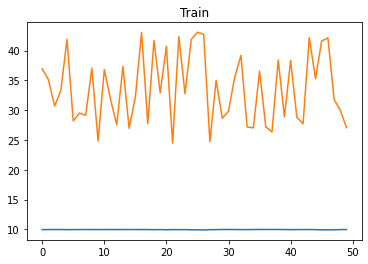

2/2 [==============================] - 3s 9ms/step


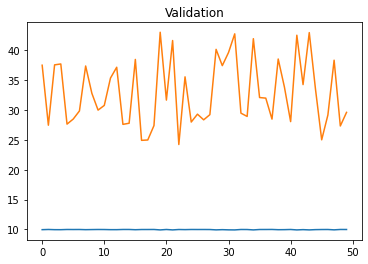

3/3 [==============================] - 0s 5ms/step


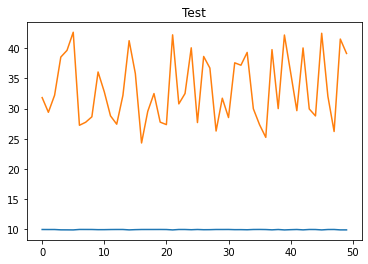

3/3 [==============================] - 0s 6ms/step


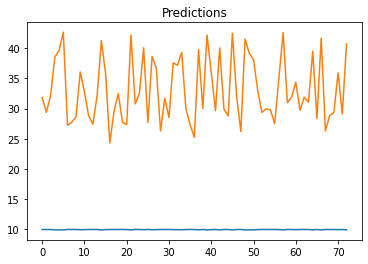

In [35]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
#model.add(Dense(8, 'relu'))
#model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs,moving_avg_data, target, x_val, y_val)


plot_train("mavg_auto_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [36]:
mavg_auto_lstm_mse

563.6086302989893

# Hybrid

## General

### CNN LSTM

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 1082.4236 - root_mean_squared_error: 32.9002

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 128s 11s/step - loss: 1082.4236 - root_mean_squared_error: 32.9002 - val_loss: 1122.0342 - val_root_mean_squared_error: 33.4968
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 1064.5502 - root_mean_squared_error: 32.6274

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 71s 10s/step - loss: 1064.5502 - root_mean_squared_error: 32.6274 - val_loss: 1101.5149 - val_root_mean_squared_error: 33.1891
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 1041.3616 - root_mean_squared_error: 32.2701

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 85s 12s/step - loss: 1040.3180 - root_mean_squared_error: 32.2540 - val_loss: 1083.0809 - val_root_mean_squared_error: 32.9102
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 1028.2980 - root_mean_squared_error: 32.0671

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 82s 12s/step - loss: 1028.2980 - root_mean_squared_error: 32.0671 - val_loss: 1071.2100 - val_root_mean_squared_error: 32.7293
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 1017.4301 - root_mean_squared_error: 31.8972

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 78s 11s/step - loss: 1017.4301 - root_mean_squared_error: 31.8972 - val_loss: 1060.2194 - val_root_mean_squared_error: 32.5610
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 1007.6488 - root_mean_squared_error: 31.7435

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 94s 13s/step - loss: 1007.6488 - root_mean_squared_error: 31.7435 - val_loss: 1051.6339 - val_root_mean_squared_error: 32.4289
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 998.1157 - root_mean_squared_error: 31.5930

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 91s 13s/step - loss: 998.1157 - root_mean_squared_error: 31.5930 - val_loss: 1041.8815 - val_root_mean_squared_error: 32.2782
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 989.3362 - root_mean_squared_error: 31.4537

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 91s 13s/step - loss: 989.3362 - root_mean_squared_error: 31.4537 - val_loss: 1031.4509 - val_root_mean_squared_error: 32.1162
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 974.1955 - root_mean_squared_error: 31.2121

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 90s 12s/step - loss: 974.1955 - root_mean_squared_error: 31.2121 - val_loss: 1016.0702 - val_root_mean_squared_error: 31.8759
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 964.6382 - root_mean_squared_error: 31.0586

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 89s 13s/step - loss: 964.6382 - root_mean_squared_error: 31.0586 - val_loss: 1008.1735 - val_root_mean_squared_error: 31.7517
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 957.1074 - root_mean_squared_error: 30.9372

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 94s 13s/step - loss: 957.1074 - root_mean_squared_error: 30.9372 - val_loss: 1000.5931 - val_root_mean_squared_error: 31.6322
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 954.2962 - root_mean_squared_error: 30.8917

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 76s 11s/step - loss: 949.7613 - root_mean_squared_error: 30.8182 - val_loss: 993.1331 - val_root_mean_squared_error: 31.5140
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 942.4764 - root_mean_squared_error: 30.6998

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 89s 13s/step - loss: 942.4764 - root_mean_squared_error: 30.6998 - val_loss: 985.5982 - val_root_mean_squared_error: 31.3942
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 935.0563 - root_mean_squared_error: 30.5787

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 100s 14s/step - loss: 935.0563 - root_mean_squared_error: 30.5787 - val_loss: 977.9271 - val_root_mean_squared_error: 31.2718
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 927.5237 - root_mean_squared_error: 30.4553

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 77s 11s/step - loss: 927.5237 - root_mean_squared_error: 30.4553 - val_loss: 970.1062 - val_root_mean_squared_error: 31.1465
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 919.7955 - root_mean_squared_error: 30.3281

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 89s 13s/step - loss: 919.7955 - root_mean_squared_error: 30.3281 - val_loss: 962.1753 - val_root_mean_squared_error: 31.0190
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 911.9904 - root_mean_squared_error: 30.1992

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 81s 11s/step - loss: 911.9904 - root_mean_squared_error: 30.1992 - val_loss: 954.0066 - val_root_mean_squared_error: 30.8870
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 903.8789 - root_mean_squared_error: 30.0646

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 90s 13s/step - loss: 903.8789 - root_mean_squared_error: 30.0646 - val_loss: 945.5444 - val_root_mean_squared_error: 30.7497
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 895.8630 - root_mean_squared_error: 29.9310

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 101s 14s/step - loss: 895.8630 - root_mean_squared_error: 29.9310 - val_loss: 937.4543 - val_root_mean_squared_error: 30.6179
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 887.8297 - root_mean_squared_error: 29.7965

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 90s 13s/step - loss: 887.8297 - root_mean_squared_error: 29.7965 - val_loss: 929.1590 - val_root_mean_squared_error: 30.4821
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 876.8984 - root_mean_squared_error: 29.6125

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 91s 13s/step - loss: 879.8013 - root_mean_squared_error: 29.6614 - val_loss: 920.9193 - val_root_mean_squared_error: 30.3467
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 871.7587 - root_mean_squared_error: 29.5256

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 79s 11s/step - loss: 871.7587 - root_mean_squared_error: 29.5256 - val_loss: 912.6002 - val_root_mean_squared_error: 30.2093
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 863.6442 - root_mean_squared_error: 29.3878

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 92s 13s/step - loss: 863.6442 - root_mean_squared_error: 29.3878 - val_loss: 904.2639 - val_root_mean_squared_error: 30.0710
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 855.5051 - root_mean_squared_error: 29.2490

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 89s 13s/step - loss: 855.5051 - root_mean_squared_error: 29.2490 - val_loss: 895.8945 - val_root_mean_squared_error: 29.9315
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 847.3785 - root_mean_squared_error: 29.1098

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 104s 15s/step - loss: 847.3785 - root_mean_squared_error: 29.1098 - val_loss: 887.5720 - val_root_mean_squared_error: 29.7921
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 839.2925 - root_mean_squared_error: 28.9705

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 117s 16s/step - loss: 839.2925 - root_mean_squared_error: 28.9705 - val_loss: 879.3397 - val_root_mean_squared_error: 29.6537
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 831.2916 - root_mean_squared_error: 28.8321

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 102s 15s/step - loss: 831.2916 - root_mean_squared_error: 28.8321 - val_loss: 871.1525 - val_root_mean_squared_error: 29.5153
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 823.3801 - root_mean_squared_error: 28.6946

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 120s 17s/step - loss: 823.3801 - root_mean_squared_error: 28.6946 - val_loss: 862.9921 - val_root_mean_squared_error: 29.3767
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 815.4367 - root_mean_squared_error: 28.5559

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 90s 13s/step - loss: 815.4367 - root_mean_squared_error: 28.5559 - val_loss: 854.8967 - val_root_mean_squared_error: 29.2386
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 807.6106 - root_mean_squared_error: 28.4185

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 95s 14s/step - loss: 807.6106 - root_mean_squared_error: 28.4185 - val_loss: 846.8626 - val_root_mean_squared_error: 29.1009
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 799.8038 - root_mean_squared_error: 28.2808

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 77s 11s/step - loss: 799.8038 - root_mean_squared_error: 28.2808 - val_loss: 838.8784 - val_root_mean_squared_error: 28.9634
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 792.0757 - root_mean_squared_error: 28.1438

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 124s 18s/step - loss: 792.0757 - root_mean_squared_error: 28.1438 - val_loss: 830.9816 - val_root_mean_squared_error: 28.8268
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 784.4854 - root_mean_squared_error: 28.0087

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 107s 15s/step - loss: 784.4854 - root_mean_squared_error: 28.0087 - val_loss: 823.3380 - val_root_mean_squared_error: 28.6939
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 777.1777 - root_mean_squared_error: 27.8779

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 125s 17s/step - loss: 777.1777 - root_mean_squared_error: 27.8779 - val_loss: 816.0216 - val_root_mean_squared_error: 28.5661
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 770.2075 - root_mean_squared_error: 27.7526

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 105s 15s/step - loss: 770.2075 - root_mean_squared_error: 27.7526 - val_loss: 809.0532 - val_root_mean_squared_error: 28.4439
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 763.5474 - root_mean_squared_error: 27.6324

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 110s 16s/step - loss: 763.5474 - root_mean_squared_error: 27.6324 - val_loss: 802.4201 - val_root_mean_squared_error: 28.3270
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 757.1992 - root_mean_squared_error: 27.5173

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 102s 15s/step - loss: 757.1992 - root_mean_squared_error: 27.5173 - val_loss: 796.0966 - val_root_mean_squared_error: 28.2152
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 751.1614 - root_mean_squared_error: 27.4073

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 97s 14s/step - loss: 751.1614 - root_mean_squared_error: 27.4073 - val_loss: 789.9729 - val_root_mean_squared_error: 28.1065
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 748.9074 - root_mean_squared_error: 27.3662

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 130s 19s/step - loss: 745.1063 - root_mean_squared_error: 27.2966 - val_loss: 783.5575 - val_root_mean_squared_error: 27.9921
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 739.1925 - root_mean_squared_error: 27.1881

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 102s 15s/step - loss: 739.1925 - root_mean_squared_error: 27.1881 - val_loss: 777.9410 - val_root_mean_squared_error: 27.8916
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 733.8124 - root_mean_squared_error: 27.0890

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 109s 16s/step - loss: 733.8124 - root_mean_squared_error: 27.0890 - val_loss: 772.5613 - val_root_mean_squared_error: 27.7950
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 728.6497 - root_mean_squared_error: 26.9935

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 107s 15s/step - loss: 728.6497 - root_mean_squared_error: 26.9935 - val_loss: 767.3170 - val_root_mean_squared_error: 27.7005
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 723.6038 - root_mean_squared_error: 26.8999

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 115s 16s/step - loss: 723.6038 - root_mean_squared_error: 26.8999 - val_loss: 762.2130 - val_root_mean_squared_error: 27.6082
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 718.7092 - root_mean_squared_error: 26.8088

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 101s 14s/step - loss: 718.7092 - root_mean_squared_error: 26.8088 - val_loss: 757.2371 - val_root_mean_squared_error: 27.5179
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 713.9114 - root_mean_squared_error: 26.7191

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 111s 15s/step - loss: 713.9114 - root_mean_squared_error: 26.7191 - val_loss: 752.3477 - val_root_mean_squared_error: 27.4290
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 709.1906 - root_mean_squared_error: 26.6306

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 105s 15s/step - loss: 709.1906 - root_mean_squared_error: 26.6306 - val_loss: 747.5404 - val_root_mean_squared_error: 27.3412
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 704.5095 - root_mean_squared_error: 26.5426

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 126s 17s/step - loss: 704.5095 - root_mean_squared_error: 26.5426 - val_loss: 742.5378 - val_root_mean_squared_error: 27.2495
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 699.6113 - root_mean_squared_error: 26.4502

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 143s 20s/step - loss: 699.6113 - root_mean_squared_error: 26.4502 - val_loss: 737.7859 - val_root_mean_squared_error: 27.1622
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 695.1423 - root_mean_squared_error: 26.3656

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 122s 17s/step - loss: 695.1423 - root_mean_squared_error: 26.3656 - val_loss: 733.2570 - val_root_mean_squared_error: 27.0787
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 690.8067 - root_mean_squared_error: 26.2832

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 10s 188ms/step


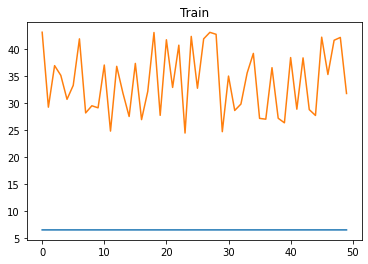

2/2 [==============================] - 7s 26ms/step


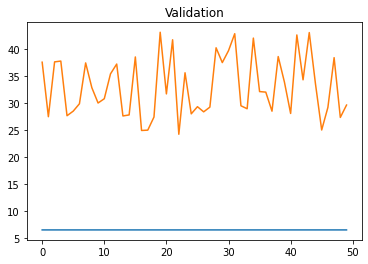

3/3 [==============================] - 0s 46ms/step


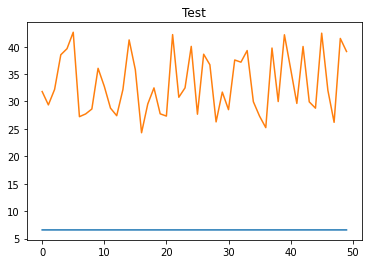

3/3 [==============================] - 0s 22ms/step


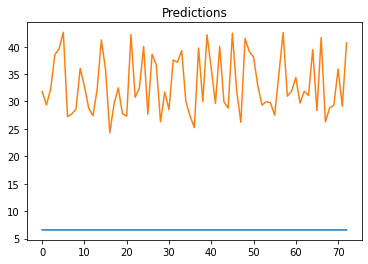

In [37]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [38]:
hybrid_cnn_lstm_mse

731.403294727446

### RNN LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 1123.0509 - root_mean_squared_error: 33.5120

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 132s 12s/step - loss: 1118.2008 - root_mean_squared_error: 33.4395 - val_loss: 1155.5657 - val_root_mean_squared_error: 33.9936
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 1094.8733 - root_mean_squared_error: 33.0889

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 75s 10s/step - loss: 1094.8733 - root_mean_squared_error: 33.0889 - val_loss: 1131.7996 - val_root_mean_squared_error: 33.6422
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 1073.1251 - root_mean_squared_error: 32.7586

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 77s 11s/step - loss: 1073.1251 - root_mean_squared_error: 32.7586 - val_loss: 1112.0173 - val_root_mean_squared_error: 33.3469
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 1054.5286 - root_mean_squared_error: 32.4735

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 56s 8s/step - loss: 1054.5286 - root_mean_squared_error: 32.4735 - val_loss: 1094.0664 - val_root_mean_squared_error: 33.0767
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 1042.6945 - root_mean_squared_error: 32.2908

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 71s 10s/step - loss: 1037.4941 - root_mean_squared_error: 32.2102 - val_loss: 1077.6835 - val_root_mean_squared_error: 32.8281
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 1021.8466 - root_mean_squared_error: 31.9663

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 75s 11s/step - loss: 1022.0429 - root_mean_squared_error: 31.9694 - val_loss: 1062.8384 - val_root_mean_squared_error: 32.6012
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 1007.9717 - root_mean_squared_error: 31.7486

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 76s 11s/step - loss: 1007.9717 - root_mean_squared_error: 31.7486 - val_loss: 1049.3103 - val_root_mean_squared_error: 32.3931
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 995.1695 - root_mean_squared_error: 31.5463

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 119s 17s/step - loss: 995.1695 - root_mean_squared_error: 31.5463 - val_loss: 1036.8423 - val_root_mean_squared_error: 32.2000
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 978.1540 - root_mean_squared_error: 31.2755

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 102s 14s/step - loss: 983.3035 - root_mean_squared_error: 31.3577 - val_loss: 1025.2180 - val_root_mean_squared_error: 32.0190
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 972.2421 - root_mean_squared_error: 31.1808

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 69s 10s/step - loss: 972.2421 - root_mean_squared_error: 31.1808 - val_loss: 1014.2678 - val_root_mean_squared_error: 31.8476
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 965.7430 - root_mean_squared_error: 31.0764

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 961.7490 - root_mean_squared_error: 31.0121 - val_loss: 1003.8640 - val_root_mean_squared_error: 31.6838
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 951.7176 - root_mean_squared_error: 30.8499

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 951.7176 - root_mean_squared_error: 30.8499 - val_loss: 993.6992 - val_root_mean_squared_error: 31.5230
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 941.9171 - root_mean_squared_error: 30.6907

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 941.9171 - root_mean_squared_error: 30.6907 - val_loss: 983.7125 - val_root_mean_squared_error: 31.3642
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 933.9136 - root_mean_squared_error: 30.5600

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 932.2274 - root_mean_squared_error: 30.5324 - val_loss: 973.9381 - val_root_mean_squared_error: 31.2080
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 922.7141 - root_mean_squared_error: 30.3762

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 922.7141 - root_mean_squared_error: 30.3762 - val_loss: 964.2164 - val_root_mean_squared_error: 31.0518
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 913.2399 - root_mean_squared_error: 30.2199

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 913.2399 - root_mean_squared_error: 30.2199 - val_loss: 954.5579 - val_root_mean_squared_error: 30.8959
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 904.9637 - root_mean_squared_error: 30.0826

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 903.7906 - root_mean_squared_error: 30.0631 - val_loss: 944.8784 - val_root_mean_squared_error: 30.7389
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 908.5312 - root_mean_squared_error: 30.1419

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 894.3854 - root_mean_squared_error: 29.9063 - val_loss: 935.2213 - val_root_mean_squared_error: 30.5814
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 887.5159 - root_mean_squared_error: 29.7912

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 884.9670 - root_mean_squared_error: 29.7484 - val_loss: 925.6169 - val_root_mean_squared_error: 30.4240
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 877.2196 - root_mean_squared_error: 29.6179

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 875.5563 - root_mean_squared_error: 29.5898 - val_loss: 915.9226 - val_root_mean_squared_error: 30.2642
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 868.6784 - root_mean_squared_error: 29.4734

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 866.0710 - root_mean_squared_error: 29.4291 - val_loss: 906.1772 - val_root_mean_squared_error: 30.1028
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 856.5126 - root_mean_squared_error: 29.2662

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 856.5126 - root_mean_squared_error: 29.2662 - val_loss: 896.3233 - val_root_mean_squared_error: 29.9387
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 845.5568 - root_mean_squared_error: 29.0785

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 846.8577 - root_mean_squared_error: 29.1008 - val_loss: 886.3575 - val_root_mean_squared_error: 29.7718
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 837.0952 - root_mean_squared_error: 28.9326

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 837.0952 - root_mean_squared_error: 28.9326 - val_loss: 876.2362 - val_root_mean_squared_error: 29.6013
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 827.2473 - root_mean_squared_error: 28.7619

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 827.2473 - root_mean_squared_error: 28.7619 - val_loss: 866.0710 - val_root_mean_squared_error: 29.4291
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 817.3694 - root_mean_squared_error: 28.5897

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 817.3694 - root_mean_squared_error: 28.5897 - val_loss: 856.0384 - val_root_mean_squared_error: 29.2581
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 808.3066 - root_mean_squared_error: 28.4307

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 807.6805 - root_mean_squared_error: 28.4197 - val_loss: 846.2111 - val_root_mean_squared_error: 29.0897
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 795.3856 - root_mean_squared_error: 28.2026

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 798.3344 - root_mean_squared_error: 28.2548 - val_loss: 836.7538 - val_root_mean_squared_error: 28.9267
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 788.6000 - root_mean_squared_error: 28.0820

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 789.2556 - root_mean_squared_error: 28.0937 - val_loss: 827.7670 - val_root_mean_squared_error: 28.7709
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 780.7651 - root_mean_squared_error: 27.9422

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 780.7651 - root_mean_squared_error: 27.9422 - val_loss: 819.1867 - val_root_mean_squared_error: 28.6214
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 772.5706 - root_mean_squared_error: 27.7952

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 772.5706 - root_mean_squared_error: 27.7952 - val_loss: 811.0446 - val_root_mean_squared_error: 28.4788
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 764.7770 - root_mean_squared_error: 27.6546

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 764.7770 - root_mean_squared_error: 27.6546 - val_loss: 802.9321 - val_root_mean_squared_error: 28.3361
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 759.9153 - root_mean_squared_error: 27.5666

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 756.7951 - root_mean_squared_error: 27.5099 - val_loss: 795.0392 - val_root_mean_squared_error: 28.1964
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 749.4543 - root_mean_squared_error: 27.3762

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 749.4543 - root_mean_squared_error: 27.3762 - val_loss: 787.5594 - val_root_mean_squared_error: 28.0635
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 739.9276 - root_mean_squared_error: 27.2016

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 742.2808 - root_mean_squared_error: 27.2448 - val_loss: 780.2633 - val_root_mean_squared_error: 27.9332
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 735.3109 - root_mean_squared_error: 27.1166

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 735.3109 - root_mean_squared_error: 27.1166 - val_loss: 773.3120 - val_root_mean_squared_error: 27.8085
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 729.0651 - root_mean_squared_error: 27.0012

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 728.7069 - root_mean_squared_error: 26.9946 - val_loss: 766.7233 - val_root_mean_squared_error: 27.6898
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 706.7256 - root_mean_squared_error: 26.5843

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 722.4635 - root_mean_squared_error: 26.8787 - val_loss: 760.5519 - val_root_mean_squared_error: 27.5781
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 717.3603 - root_mean_squared_error: 26.7836

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 716.6267 - root_mean_squared_error: 26.7699 - val_loss: 754.7296 - val_root_mean_squared_error: 27.4723
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 711.1102 - root_mean_squared_error: 26.6667

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 711.1102 - root_mean_squared_error: 26.6667 - val_loss: 749.2227 - val_root_mean_squared_error: 27.3719
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 705.9308 - root_mean_squared_error: 26.5694

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 705.9308 - root_mean_squared_error: 26.5694 - val_loss: 744.0517 - val_root_mean_squared_error: 27.2773
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 714.7321 - root_mean_squared_error: 26.7345

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 701.0514 - root_mean_squared_error: 26.4774 - val_loss: 739.2111 - val_root_mean_squared_error: 27.1884
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 697.9112 - root_mean_squared_error: 26.4180

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 696.4739 - root_mean_squared_error: 26.3908 - val_loss: 734.6447 - val_root_mean_squared_error: 27.1043
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 693.2774 - root_mean_squared_error: 26.3302

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 692.1271 - root_mean_squared_error: 26.3083 - val_loss: 730.3416 - val_root_mean_squared_error: 27.0248
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 688.0395 - root_mean_squared_error: 26.2305

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 688.0395 - root_mean_squared_error: 26.2305 - val_loss: 726.2688 - val_root_mean_squared_error: 26.9494
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 680.9689 - root_mean_squared_error: 26.0954

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 684.1719 - root_mean_squared_error: 26.1567 - val_loss: 722.4136 - val_root_mean_squared_error: 26.8778
Epoch 47/50
5/8 [=================>............] - ETA: 0s - loss: 667.1522 - root_mean_squared_error: 25.8293

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 680.4988 - root_mean_squared_error: 26.0864 - val_loss: 718.7371 - val_root_mean_squared_error: 26.8093
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 677.0024 - root_mean_squared_error: 26.0193

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 677.0024 - root_mean_squared_error: 26.0193 - val_loss: 715.2535 - val_root_mean_squared_error: 26.7442
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 670.8795 - root_mean_squared_error: 25.9013

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 673.6974 - root_mean_squared_error: 25.9557 - val_loss: 711.9315 - val_root_mean_squared_error: 26.6820
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 670.5209 - root_mean_squared_error: 25.8944

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 2s 12ms/step


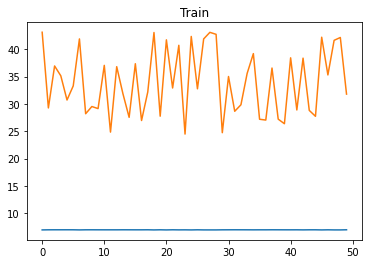

2/2 [==============================] - 1s 11ms/step


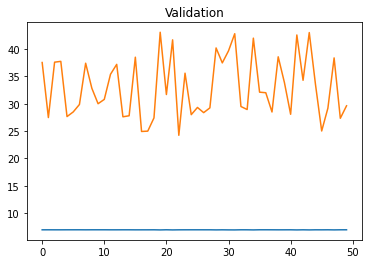

3/3 [==============================] - 0s 22ms/step


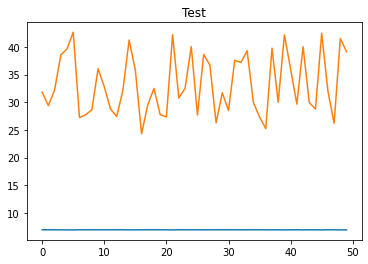

3/3 [==============================] - 0s 8ms/step


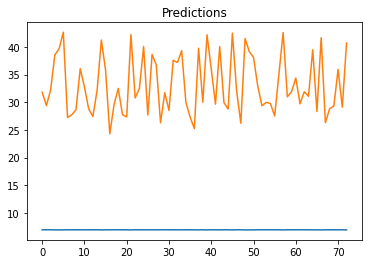

In [39]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(15,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [40]:
hybrid_rnn_lstm_mse

711.31224882415

### RNN GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 1127.1945 - root_mean_squared_error: 33.5737

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 23s 2s/step - loss: 1127.1945 - root_mean_squared_error: 33.5737 - val_loss: 1164.4755 - val_root_mean_squared_error: 34.1244
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 1091.9847 - root_mean_squared_error: 33.0452

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 1101.8928 - root_mean_squared_error: 33.1948 - val_loss: 1138.7578 - val_root_mean_squared_error: 33.7455
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 1077.9648 - root_mean_squared_error: 32.8324

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 1076.8160 - root_mean_squared_error: 32.8149 - val_loss: 1113.2749 - val_root_mean_squared_error: 33.3658
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 1047.5100 - root_mean_squared_error: 32.3653

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 1051.9575 - root_mean_squared_error: 32.4339 - val_loss: 1087.9934 - val_root_mean_squared_error: 32.9847
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 1024.6785 - root_mean_squared_error: 32.0106

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 1027.2640 - root_mean_squared_error: 32.0510 - val_loss: 1062.8650 - val_root_mean_squared_error: 32.6016
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 1009.0829 - root_mean_squared_error: 31.7661

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 1002.8511 - root_mean_squared_error: 31.6678 - val_loss: 1037.9060 - val_root_mean_squared_error: 32.2165
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 983.3417 - root_mean_squared_error: 31.3583 

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 978.4841 - root_mean_squared_error: 31.2807 - val_loss: 1013.2862 - val_root_mean_squared_error: 31.8322
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 959.7310 - root_mean_squared_error: 30.9795

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 954.4346 - root_mean_squared_error: 30.8939 - val_loss: 988.9972 - val_root_mean_squared_error: 31.4483
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 926.5278 - root_mean_squared_error: 30.4389

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 930.6567 - root_mean_squared_error: 30.5067 - val_loss: 964.9973 - val_root_mean_squared_error: 31.0644
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 903.0685 - root_mean_squared_error: 30.0511

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 907.3339 - root_mean_squared_error: 30.1220 - val_loss: 941.3613 - val_root_mean_squared_error: 30.6816
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 884.5448 - root_mean_squared_error: 29.7413

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 884.5448 - root_mean_squared_error: 29.7413 - val_loss: 918.5242 - val_root_mean_squared_error: 30.3072
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 862.6846 - root_mean_squared_error: 29.3715

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 862.6846 - root_mean_squared_error: 29.3715 - val_loss: 896.9803 - val_root_mean_squared_error: 29.9496
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 843.1830 - root_mean_squared_error: 29.0376

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 842.2513 - root_mean_squared_error: 29.0216 - val_loss: 876.6607 - val_root_mean_squared_error: 29.6085
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 822.8209 - root_mean_squared_error: 28.6849

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 823.0948 - root_mean_squared_error: 28.6896 - val_loss: 857.8723 - val_root_mean_squared_error: 29.2895
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 803.8682 - root_mean_squared_error: 28.3526

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 805.5048 - root_mean_squared_error: 28.3814 - val_loss: 840.5733 - val_root_mean_squared_error: 28.9926
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 789.2683 - root_mean_squared_error: 28.0939

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 789.2683 - root_mean_squared_error: 28.0939 - val_loss: 824.7248 - val_root_mean_squared_error: 28.7180
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 774.3577 - root_mean_squared_error: 27.8273

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 774.3577 - root_mean_squared_error: 27.8273 - val_loss: 810.2354 - val_root_mean_squared_error: 28.4646
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 765.6699 - root_mean_squared_error: 27.6707

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 760.9331 - root_mean_squared_error: 27.5850 - val_loss: 796.8557 - val_root_mean_squared_error: 28.2286
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 742.1187 - root_mean_squared_error: 27.2419

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 748.4249 - root_mean_squared_error: 27.3574 - val_loss: 784.6672 - val_root_mean_squared_error: 28.0119
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 737.0301 - root_mean_squared_error: 27.1483

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 737.0301 - root_mean_squared_error: 27.1483 - val_loss: 773.4315 - val_root_mean_squared_error: 27.8106
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 726.5685 - root_mean_squared_error: 26.9549

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 726.5685 - root_mean_squared_error: 26.9549 - val_loss: 763.0278 - val_root_mean_squared_error: 27.6230
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 716.7651 - root_mean_squared_error: 26.7725

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 716.7651 - root_mean_squared_error: 26.7725 - val_loss: 753.3907 - val_root_mean_squared_error: 27.4480
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 710.5070 - root_mean_squared_error: 26.6553

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 707.8110 - root_mean_squared_error: 26.6047 - val_loss: 744.4272 - val_root_mean_squared_error: 27.2842
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 699.4135 - root_mean_squared_error: 26.4464

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 699.4135 - root_mean_squared_error: 26.4464 - val_loss: 736.1207 - val_root_mean_squared_error: 27.1315
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 695.4734 - root_mean_squared_error: 26.3718

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 691.6288 - root_mean_squared_error: 26.2988 - val_loss: 728.3853 - val_root_mean_squared_error: 26.9886
Epoch 26/50
5/8 [=================>............] - ETA: 0s - loss: 717.6470 - root_mean_squared_error: 26.7889

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 684.4087 - root_mean_squared_error: 26.1612 - val_loss: 721.1505 - val_root_mean_squared_error: 26.8542
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 677.6652 - root_mean_squared_error: 26.0320

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 677.5769 - root_mean_squared_error: 26.0303 - val_loss: 714.3976 - val_root_mean_squared_error: 26.7282
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 678.4907 - root_mean_squared_error: 26.0479

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 671.2342 - root_mean_squared_error: 25.9082 - val_loss: 708.0301 - val_root_mean_squared_error: 26.6088
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 665.2319 - root_mean_squared_error: 25.7921

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 665.2319 - root_mean_squared_error: 25.7921 - val_loss: 702.0497 - val_root_mean_squared_error: 26.4962
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 659.6107 - root_mean_squared_error: 25.6829

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 659.6107 - root_mean_squared_error: 25.6829 - val_loss: 696.4196 - val_root_mean_squared_error: 26.3898
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 651.8680 - root_mean_squared_error: 25.5317

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 654.3016 - root_mean_squared_error: 25.5793 - val_loss: 691.1134 - val_root_mean_squared_error: 26.2890
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 649.3030 - root_mean_squared_error: 25.4814

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 649.2881 - root_mean_squared_error: 25.4811 - val_loss: 686.0655 - val_root_mean_squared_error: 26.1929
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 644.5218 - root_mean_squared_error: 25.3874

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 644.5218 - root_mean_squared_error: 25.3874 - val_loss: 681.2941 - val_root_mean_squared_error: 26.1016
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 639.4082 - root_mean_squared_error: 25.2865

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 639.9894 - root_mean_squared_error: 25.2980 - val_loss: 676.7946 - val_root_mean_squared_error: 26.0153
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 638.2786 - root_mean_squared_error: 25.2642

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 635.7644 - root_mean_squared_error: 25.2144 - val_loss: 672.4839 - val_root_mean_squared_error: 25.9323
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 630.8857 - root_mean_squared_error: 25.1174

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 631.6995 - root_mean_squared_error: 25.1336 - val_loss: 668.3897 - val_root_mean_squared_error: 25.8532
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 627.8144 - root_mean_squared_error: 25.0562

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 627.8144 - root_mean_squared_error: 25.0562 - val_loss: 664.5038 - val_root_mean_squared_error: 25.7780
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 620.7896 - root_mean_squared_error: 24.9156

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 624.1452 - root_mean_squared_error: 24.9829 - val_loss: 660.7940 - val_root_mean_squared_error: 25.7059
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 620.6113 - root_mean_squared_error: 24.9121

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 620.6113 - root_mean_squared_error: 24.9121 - val_loss: 657.2423 - val_root_mean_squared_error: 25.6367
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 617.2631 - root_mean_squared_error: 24.8448

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 617.2631 - root_mean_squared_error: 24.8448 - val_loss: 653.8098 - val_root_mean_squared_error: 25.5697
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 617.7438 - root_mean_squared_error: 24.8545

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 614.0225 - root_mean_squared_error: 24.7795 - val_loss: 650.5783 - val_root_mean_squared_error: 25.5064
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 603.5825 - root_mean_squared_error: 24.5679

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 610.9413 - root_mean_squared_error: 24.7172 - val_loss: 647.4969 - val_root_mean_squared_error: 25.4460
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 610.9365 - root_mean_squared_error: 24.7171

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 608.0165 - root_mean_squared_error: 24.6580 - val_loss: 644.4844 - val_root_mean_squared_error: 25.3867
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 602.3712 - root_mean_squared_error: 24.5433

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 605.1508 - root_mean_squared_error: 24.5998 - val_loss: 641.6251 - val_root_mean_squared_error: 25.3303
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 602.7907 - root_mean_squared_error: 24.5518

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 602.4318 - root_mean_squared_error: 24.5445 - val_loss: 638.8438 - val_root_mean_squared_error: 25.2754
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 611.4728 - root_mean_squared_error: 24.7280

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 599.8074 - root_mean_squared_error: 24.4910 - val_loss: 636.1533 - val_root_mean_squared_error: 25.2221
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 595.2787 - root_mean_squared_error: 24.3983

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 597.2490 - root_mean_squared_error: 24.4387 - val_loss: 633.5719 - val_root_mean_squared_error: 25.1709
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 594.7673 - root_mean_squared_error: 24.3879

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 594.7673 - root_mean_squared_error: 24.3879 - val_loss: 631.0651 - val_root_mean_squared_error: 25.1210
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 592.3572 - root_mean_squared_error: 24.3384

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 592.3572 - root_mean_squared_error: 24.3384 - val_loss: 628.6285 - val_root_mean_squared_error: 25.0725
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 592.1242 - root_mean_squared_error: 24.3336

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 2s 17ms/step


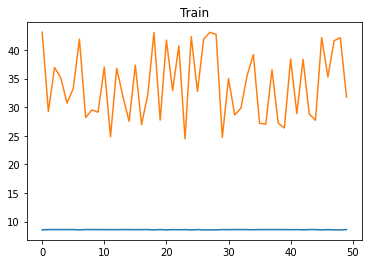

2/2 [==============================] - 1s 17ms/step


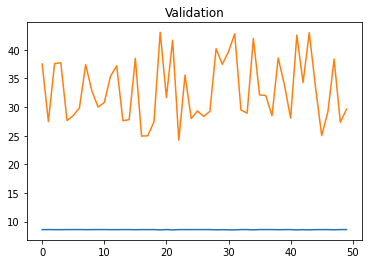

3/3 [==============================] - 0s 32ms/step


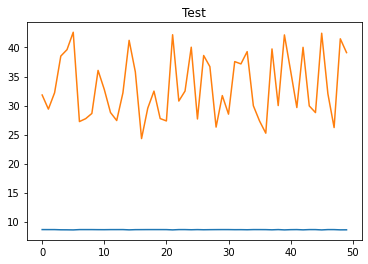

3/3 [==============================] - 0s 9ms/step


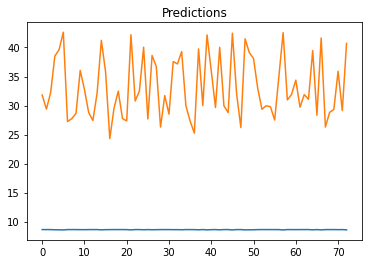

In [41]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [42]:
hybrid_rnn_gru_mse

628.5414020505067

### CNN GRU

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 1034.2645 - root_mean_squared_error: 32.1600

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 42s 5s/step - loss: 1036.5787 - root_mean_squared_error: 32.1959 - val_loss: 1063.4886 - val_root_mean_squared_error: 32.6112
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 1009.8208 - root_mean_squared_error: 31.7777

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 1007.8314 - root_mean_squared_error: 31.7464 - val_loss: 1047.0809 - val_root_mean_squared_error: 32.3586
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 992.4230 - root_mean_squared_error: 31.5027 

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 992.4230 - root_mean_squared_error: 31.5027 - val_loss: 1027.1990 - val_root_mean_squared_error: 32.0499
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 975.4393 - root_mean_squared_error: 31.2320

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 971.6244 - root_mean_squared_error: 31.1709 - val_loss: 1010.6966 - val_root_mean_squared_error: 31.7915
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 957.6483 - root_mean_squared_error: 30.9459

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 957.4082 - root_mean_squared_error: 30.9420 - val_loss: 996.5555 - val_root_mean_squared_error: 31.5683
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 937.3014 - root_mean_squared_error: 30.6154

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 937.3014 - root_mean_squared_error: 30.6154 - val_loss: 975.5346 - val_root_mean_squared_error: 31.2335
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 922.2846 - root_mean_squared_error: 30.3691

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 923.7076 - root_mean_squared_error: 30.3926 - val_loss: 961.0577 - val_root_mean_squared_error: 31.0009
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 907.5146 - root_mean_squared_error: 30.1250

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 907.5146 - root_mean_squared_error: 30.1250 - val_loss: 946.9579 - val_root_mean_squared_error: 30.7727
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 896.0466 - root_mean_squared_error: 29.9340

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 896.0466 - root_mean_squared_error: 29.9340 - val_loss: 935.8621 - val_root_mean_squared_error: 30.5919
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 886.5709 - root_mean_squared_error: 29.7753

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 885.3393 - root_mean_squared_error: 29.7547 - val_loss: 924.8605 - val_root_mean_squared_error: 30.4115
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 874.6889 - root_mean_squared_error: 29.5751

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 874.6889 - root_mean_squared_error: 29.5751 - val_loss: 914.0742 - val_root_mean_squared_error: 30.2337
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 864.1821 - root_mean_squared_error: 29.3970

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 864.1821 - root_mean_squared_error: 29.3970 - val_loss: 903.5403 - val_root_mean_squared_error: 30.0589
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 854.0374 - root_mean_squared_error: 29.2239

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 854.0374 - root_mean_squared_error: 29.2239 - val_loss: 893.0880 - val_root_mean_squared_error: 29.8846
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 839.5624 - root_mean_squared_error: 28.9752

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 843.8771 - root_mean_squared_error: 29.0496 - val_loss: 882.7903 - val_root_mean_squared_error: 29.7118
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 833.9131 - root_mean_squared_error: 28.8776

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 833.9131 - root_mean_squared_error: 28.8776 - val_loss: 872.6789 - val_root_mean_squared_error: 29.5411
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 819.6446 - root_mean_squared_error: 28.6294

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 824.1564 - root_mean_squared_error: 28.7081 - val_loss: 862.7605 - val_root_mean_squared_error: 29.3728
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 809.5088 - root_mean_squared_error: 28.4519

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 814.5463 - root_mean_squared_error: 28.5403 - val_loss: 853.0354 - val_root_mean_squared_error: 29.2068
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 805.1946 - root_mean_squared_error: 28.3760

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 805.1946 - root_mean_squared_error: 28.3760 - val_loss: 843.4695 - val_root_mean_squared_error: 29.0425
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 796.0403 - root_mean_squared_error: 28.2142

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 796.0403 - root_mean_squared_error: 28.2142 - val_loss: 834.1226 - val_root_mean_squared_error: 28.8812
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 787.0176 - root_mean_squared_error: 28.0538

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 787.0176 - root_mean_squared_error: 28.0538 - val_loss: 825.0790 - val_root_mean_squared_error: 28.7242
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 778.2994 - root_mean_squared_error: 27.8980

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 778.2994 - root_mean_squared_error: 27.8980 - val_loss: 816.2488 - val_root_mean_squared_error: 28.5701
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 770.2495 - root_mean_squared_error: 27.7534

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 769.8195 - root_mean_squared_error: 27.7456 - val_loss: 807.6158 - val_root_mean_squared_error: 28.4186
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 765.7164 - root_mean_squared_error: 27.6716

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 761.5112 - root_mean_squared_error: 27.5955 - val_loss: 799.3210 - val_root_mean_squared_error: 28.2723
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 747.3524 - root_mean_squared_error: 27.3377

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 753.6027 - root_mean_squared_error: 27.4518 - val_loss: 791.2912 - val_root_mean_squared_error: 28.1299
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 746.0807 - root_mean_squared_error: 27.3145

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 745.8479 - root_mean_squared_error: 27.3102 - val_loss: 783.5163 - val_root_mean_squared_error: 27.9914
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 738.3962 - root_mean_squared_error: 27.1734

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 738.3962 - root_mean_squared_error: 27.1734 - val_loss: 776.0311 - val_root_mean_squared_error: 27.8573
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 731.2823 - root_mean_squared_error: 27.0422

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 731.2823 - root_mean_squared_error: 27.0422 - val_loss: 768.7792 - val_root_mean_squared_error: 27.7269
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 724.3372 - root_mean_squared_error: 26.9135

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 724.3372 - root_mean_squared_error: 26.9135 - val_loss: 761.8319 - val_root_mean_squared_error: 27.6013
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 718.3384 - root_mean_squared_error: 26.8018

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 717.6932 - root_mean_squared_error: 26.7898 - val_loss: 755.1905 - val_root_mean_squared_error: 27.4807
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 714.3993 - root_mean_squared_error: 26.7282

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 711.3795 - root_mean_squared_error: 26.6717 - val_loss: 748.7736 - val_root_mean_squared_error: 27.3637
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 705.2031 - root_mean_squared_error: 26.5557

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 705.2031 - root_mean_squared_error: 26.5557 - val_loss: 742.6594 - val_root_mean_squared_error: 27.2518
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 699.3502 - root_mean_squared_error: 26.4452

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 699.3502 - root_mean_squared_error: 26.4452 - val_loss: 736.7448 - val_root_mean_squared_error: 27.1430
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 693.6850 - root_mean_squared_error: 26.3379

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 693.6850 - root_mean_squared_error: 26.3379 - val_loss: 731.0598 - val_root_mean_squared_error: 27.0381
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 690.6247 - root_mean_squared_error: 26.2797

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 688.2902 - root_mean_squared_error: 26.2353 - val_loss: 725.5709 - val_root_mean_squared_error: 26.9364
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 683.0228 - root_mean_squared_error: 26.1347

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 683.0228 - root_mean_squared_error: 26.1347 - val_loss: 720.3793 - val_root_mean_squared_error: 26.8399
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 678.0998 - root_mean_squared_error: 26.0403

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 678.0998 - root_mean_squared_error: 26.0403 - val_loss: 715.3673 - val_root_mean_squared_error: 26.7464
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 673.7979 - root_mean_squared_error: 25.9576

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 673.3201 - root_mean_squared_error: 25.9484 - val_loss: 710.5598 - val_root_mean_squared_error: 26.6563
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 664.2408 - root_mean_squared_error: 25.7729

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 668.7212 - root_mean_squared_error: 25.8596 - val_loss: 705.9853 - val_root_mean_squared_error: 26.5704
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 664.7886 - root_mean_squared_error: 25.7835

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 664.3477 - root_mean_squared_error: 25.7749 - val_loss: 701.5900 - val_root_mean_squared_error: 26.4875
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 660.1786 - root_mean_squared_error: 25.6939

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 660.1786 - root_mean_squared_error: 25.6939 - val_loss: 697.3848 - val_root_mean_squared_error: 26.4080
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 658.2329 - root_mean_squared_error: 25.6560

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 656.1675 - root_mean_squared_error: 25.6158 - val_loss: 693.3564 - val_root_mean_squared_error: 26.3317
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 652.3423 - root_mean_squared_error: 25.5410

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 652.3423 - root_mean_squared_error: 25.5410 - val_loss: 689.5143 - val_root_mean_squared_error: 26.2586
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 648.6694 - root_mean_squared_error: 25.4690

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 648.6694 - root_mean_squared_error: 25.4690 - val_loss: 685.8328 - val_root_mean_squared_error: 26.1884
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 644.2128 - root_mean_squared_error: 25.3813

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 645.1467 - root_mean_squared_error: 25.3997 - val_loss: 682.2786 - val_root_mean_squared_error: 26.1205
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 641.7668 - root_mean_squared_error: 25.3331

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 641.7668 - root_mean_squared_error: 25.3331 - val_loss: 678.8642 - val_root_mean_squared_error: 26.0550
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 638.4863 - root_mean_squared_error: 25.2683

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 32s 4s/step - loss: 638.4863 - root_mean_squared_error: 25.2683 - val_loss: 675.5978 - val_root_mean_squared_error: 25.9923
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 635.3667 - root_mean_squared_error: 25.2065

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 635.3667 - root_mean_squared_error: 25.2065 - val_loss: 672.4056 - val_root_mean_squared_error: 25.9308
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 632.3254 - root_mean_squared_error: 25.1461

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 632.3254 - root_mean_squared_error: 25.1461 - val_loss: 669.3539 - val_root_mean_squared_error: 25.8719
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 629.3949 - root_mean_squared_error: 25.0877

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 629.3949 - root_mean_squared_error: 25.0877 - val_loss: 666.3913 - val_root_mean_squared_error: 25.8146
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 621.7208 - root_mean_squared_error: 24.9343

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 2s 18ms/step


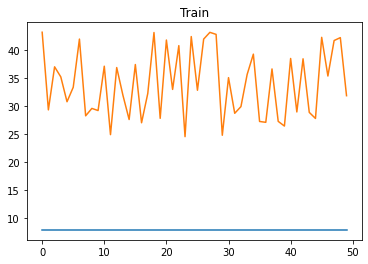

2/2 [==============================] - 2s 14ms/step


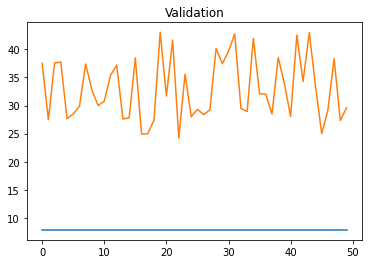

3/3 [==============================] - 0s 22ms/step


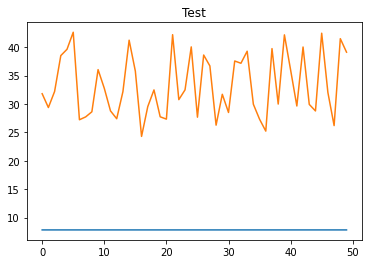

3/3 [==============================] - 0s 70ms/step


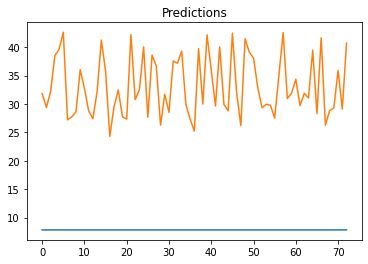

In [43]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [44]:
hybrid_cnn_gru_mse

665.9258127019831

### CNN RNN GRU

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 1067.0129 - root_mean_squared_error: 32.6652

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 35s 4s/step - loss: 1063.2672 - root_mean_squared_error: 32.6078 - val_loss: 1095.5337 - val_root_mean_squared_error: 33.0989
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 1031.9293 - root_mean_squared_error: 32.1237

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 1034.9393 - root_mean_squared_error: 32.1705 - val_loss: 1063.4448 - val_root_mean_squared_error: 32.6105
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 996.4739 - root_mean_squared_error: 31.5670

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 18s 2s/step - loss: 998.1295 - root_mean_squared_error: 31.5932 - val_loss: 1021.1288 - val_root_mean_squared_error: 31.9551
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 959.7922 - root_mean_squared_error: 30.9805

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 959.7922 - root_mean_squared_error: 30.9805 - val_loss: 993.0839 - val_root_mean_squared_error: 31.5132
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 941.1324 - root_mean_squared_error: 30.6779

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 938.0693 - root_mean_squared_error: 30.6279 - val_loss: 974.1463 - val_root_mean_squared_error: 31.2113
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 921.6211 - root_mean_squared_error: 30.3582

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 919.8977 - root_mean_squared_error: 30.3298 - val_loss: 956.1151 - val_root_mean_squared_error: 30.9211
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 902.5377 - root_mean_squared_error: 30.0423

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 902.5377 - root_mean_squared_error: 30.0423 - val_loss: 938.6308 - val_root_mean_squared_error: 30.6371
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 889.3608 - root_mean_squared_error: 29.8222

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 885.5956 - root_mean_squared_error: 29.7590 - val_loss: 921.6737 - val_root_mean_squared_error: 30.3591
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 869.2605 - root_mean_squared_error: 29.4832

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 869.2605 - root_mean_squared_error: 29.4832 - val_loss: 904.9995 - val_root_mean_squared_error: 30.0832
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 850.4618 - root_mean_squared_error: 29.1627

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 853.0856 - root_mean_squared_error: 29.2076 - val_loss: 888.5605 - val_root_mean_squared_error: 29.8087
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 836.1786 - root_mean_squared_error: 28.9168

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 19s 2s/step - loss: 837.2267 - root_mean_squared_error: 28.9349 - val_loss: 872.2838 - val_root_mean_squared_error: 29.5345
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 816.6011 - root_mean_squared_error: 28.5762

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 821.5294 - root_mean_squared_error: 28.6623 - val_loss: 856.2676 - val_root_mean_squared_error: 29.2621
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 804.5798 - root_mean_squared_error: 28.3651

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 805.9400 - root_mean_squared_error: 28.3891 - val_loss: 840.5502 - val_root_mean_squared_error: 28.9922
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 787.7247 - root_mean_squared_error: 28.0664

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 790.8080 - root_mean_squared_error: 28.1213 - val_loss: 825.1425 - val_root_mean_squared_error: 28.7253
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 775.9188 - root_mean_squared_error: 27.8553

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 775.9188 - root_mean_squared_error: 27.8553 - val_loss: 810.1304 - val_root_mean_squared_error: 28.4628
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 759.9922 - root_mean_squared_error: 27.5680

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 761.6064 - root_mean_squared_error: 27.5972 - val_loss: 795.4968 - val_root_mean_squared_error: 28.2046
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 749.2925 - root_mean_squared_error: 27.3732

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 747.5649 - root_mean_squared_error: 27.3416 - val_loss: 781.3069 - val_root_mean_squared_error: 27.9519
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 733.9356 - root_mean_squared_error: 27.0912

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 733.9356 - root_mean_squared_error: 27.0912 - val_loss: 767.6121 - val_root_mean_squared_error: 27.7058
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 721.1136 - root_mean_squared_error: 26.8536

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 720.8145 - root_mean_squared_error: 26.8480 - val_loss: 754.3230 - val_root_mean_squared_error: 27.4649
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 710.7493 - root_mean_squared_error: 26.6599

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 708.0079 - root_mean_squared_error: 26.6084 - val_loss: 741.4595 - val_root_mean_squared_error: 27.2298
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 697.0201 - root_mean_squared_error: 26.4011

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 695.6811 - root_mean_squared_error: 26.3758 - val_loss: 728.9293 - val_root_mean_squared_error: 26.9987
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 686.8541 - root_mean_squared_error: 26.2079

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 683.6453 - root_mean_squared_error: 26.1466 - val_loss: 716.6743 - val_root_mean_squared_error: 26.7708
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 671.8472 - root_mean_squared_error: 25.9200

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 671.8472 - root_mean_squared_error: 25.9200 - val_loss: 704.7104 - val_root_mean_squared_error: 26.5464
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 660.3465 - root_mean_squared_error: 25.6972

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 660.3465 - root_mean_squared_error: 25.6972 - val_loss: 692.9694 - val_root_mean_squared_error: 26.3243
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 649.0289 - root_mean_squared_error: 25.4760

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 649.0289 - root_mean_squared_error: 25.4760 - val_loss: 681.4882 - val_root_mean_squared_error: 26.1053
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 628.3346 - root_mean_squared_error: 25.0666

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 637.9838 - root_mean_squared_error: 25.2583 - val_loss: 670.2348 - val_root_mean_squared_error: 25.8889
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 628.9010 - root_mean_squared_error: 25.0779

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 627.1879 - root_mean_squared_error: 25.0437 - val_loss: 659.2528 - val_root_mean_squared_error: 25.6759
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 616.7316 - root_mean_squared_error: 24.8341

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 616.7316 - root_mean_squared_error: 24.8341 - val_loss: 648.7634 - val_root_mean_squared_error: 25.4708
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 606.7442 - root_mean_squared_error: 24.6322

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 606.7442 - root_mean_squared_error: 24.6322 - val_loss: 638.6976 - val_root_mean_squared_error: 25.2725
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 597.1654 - root_mean_squared_error: 24.4370

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 597.1654 - root_mean_squared_error: 24.4370 - val_loss: 629.0502 - val_root_mean_squared_error: 25.0809
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 591.8289 - root_mean_squared_error: 24.3275

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 587.9431 - root_mean_squared_error: 24.2475 - val_loss: 619.6912 - val_root_mean_squared_error: 24.8936
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 579.0586 - root_mean_squared_error: 24.0636

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 19s 2s/step - loss: 579.0586 - root_mean_squared_error: 24.0636 - val_loss: 610.6799 - val_root_mean_squared_error: 24.7119
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 572.6959 - root_mean_squared_error: 23.9311

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 570.4280 - root_mean_squared_error: 23.8836 - val_loss: 601.9487 - val_root_mean_squared_error: 24.5346
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 562.0597 - root_mean_squared_error: 23.7078

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 562.0597 - root_mean_squared_error: 23.7078 - val_loss: 593.4307 - val_root_mean_squared_error: 24.3604
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 553.6755 - root_mean_squared_error: 23.5303

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 553.8289 - root_mean_squared_error: 23.5336 - val_loss: 585.1001 - val_root_mean_squared_error: 24.1888
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 545.3727 - root_mean_squared_error: 23.3532

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 545.8998 - root_mean_squared_error: 23.3645 - val_loss: 576.8754 - val_root_mean_squared_error: 24.0182
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 536.7377 - root_mean_squared_error: 23.1676

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 537.9741 - root_mean_squared_error: 23.1943 - val_loss: 568.8629 - val_root_mean_squared_error: 23.8508
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 530.3531 - root_mean_squared_error: 23.0294

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 530.3531 - root_mean_squared_error: 23.0294 - val_loss: 560.9544 - val_root_mean_squared_error: 23.6845
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 524.1959 - root_mean_squared_error: 22.8953

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 522.7447 - root_mean_squared_error: 22.8636 - val_loss: 553.2673 - val_root_mean_squared_error: 23.5216
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 520.9124 - root_mean_squared_error: 22.8235

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 515.4270 - root_mean_squared_error: 22.7030 - val_loss: 545.7579 - val_root_mean_squared_error: 23.3615
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 507.9312 - root_mean_squared_error: 22.5373

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 508.2449 - root_mean_squared_error: 22.5443 - val_loss: 538.4836 - val_root_mean_squared_error: 23.2052
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 502.5060 - root_mean_squared_error: 22.4166

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 501.2754 - root_mean_squared_error: 22.3892 - val_loss: 531.3227 - val_root_mean_squared_error: 23.0504
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 493.8255 - root_mean_squared_error: 22.2222

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 494.4189 - root_mean_squared_error: 22.2355 - val_loss: 524.3246 - val_root_mean_squared_error: 22.8981
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 483.2035 - root_mean_squared_error: 21.9819

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 487.6927 - root_mean_squared_error: 22.0838 - val_loss: 517.4504 - val_root_mean_squared_error: 22.7475
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 476.4790 - root_mean_squared_error: 21.8284

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 481.1219 - root_mean_squared_error: 21.9345 - val_loss: 510.6555 - val_root_mean_squared_error: 22.5977
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 474.5969 - root_mean_squared_error: 21.7852

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 474.5969 - root_mean_squared_error: 21.7852 - val_loss: 504.0079 - val_root_mean_squared_error: 22.4501
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 469.7762 - root_mean_squared_error: 21.6743

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 468.2704 - root_mean_squared_error: 21.6396 - val_loss: 497.4952 - val_root_mean_squared_error: 22.3046
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 463.7137 - root_mean_squared_error: 21.5340

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 462.0599 - root_mean_squared_error: 21.4956 - val_loss: 491.1708 - val_root_mean_squared_error: 22.1624
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 459.0505 - root_mean_squared_error: 21.4255

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 456.0410 - root_mean_squared_error: 21.3551 - val_loss: 484.9658 - val_root_mean_squared_error: 22.0219
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 450.0541 - root_mean_squared_error: 21.2145

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 4s 22ms/step


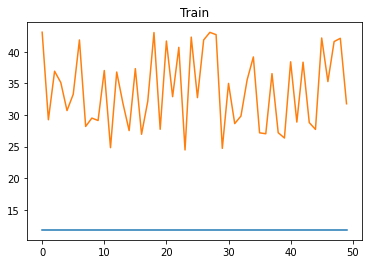

2/2 [==============================] - 1s 16ms/step


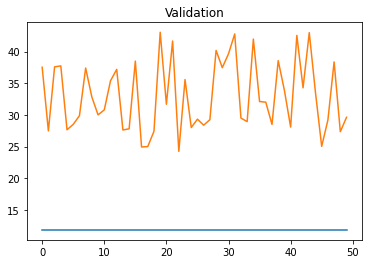

3/3 [==============================] - 0s 15ms/step


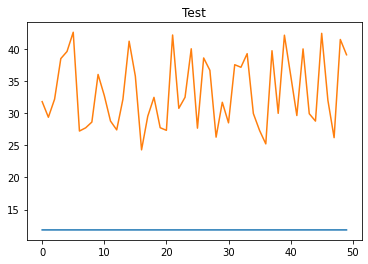

3/3 [==============================] - 0s 20ms/step


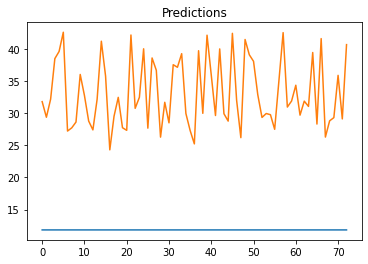

In [45]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [46]:
hybrid_cnn_rnn_gru_mse

480.71633388410635

### LSTM RNN GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 1034.7893 - root_mean_squared_error: 32.1681

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 49s 4s/step - loss: 1034.7893 - root_mean_squared_error: 32.1681 - val_loss: 1049.2208 - val_root_mean_squared_error: 32.3917
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 977.1624 - root_mean_squared_error: 31.2596

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 977.1624 - root_mean_squared_error: 31.2596 - val_loss: 989.5001 - val_root_mean_squared_error: 31.4563
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 923.7719 - root_mean_squared_error: 30.3936

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 917.7676 - root_mean_squared_error: 30.2947 - val_loss: 926.1049 - val_root_mean_squared_error: 30.4320
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 854.9418 - root_mean_squared_error: 29.2394

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 854.9418 - root_mean_squared_error: 29.2394 - val_loss: 860.3104 - val_root_mean_squared_error: 29.3310
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 791.0843 - root_mean_squared_error: 28.1262

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 791.0843 - root_mean_squared_error: 28.1262 - val_loss: 795.7452 - val_root_mean_squared_error: 28.2090
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 729.7242 - root_mean_squared_error: 27.0134

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 729.7242 - root_mean_squared_error: 27.0134 - val_loss: 736.5988 - val_root_mean_squared_error: 27.1404
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 675.3719 - root_mean_squared_error: 25.9879

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 675.3719 - root_mean_squared_error: 25.9879 - val_loss: 684.8334 - val_root_mean_squared_error: 26.1693
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 628.6930 - root_mean_squared_error: 25.0738

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 628.6930 - root_mean_squared_error: 25.0738 - val_loss: 642.9875 - val_root_mean_squared_error: 25.3572
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 591.6643 - root_mean_squared_error: 24.3242

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 591.6643 - root_mean_squared_error: 24.3242 - val_loss: 609.9888 - val_root_mean_squared_error: 24.6980
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 562.8232 - root_mean_squared_error: 23.7239

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 562.8232 - root_mean_squared_error: 23.7239 - val_loss: 584.5190 - val_root_mean_squared_error: 24.1768
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 540.6936 - root_mean_squared_error: 23.2528

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 540.6936 - root_mean_squared_error: 23.2528 - val_loss: 565.1091 - val_root_mean_squared_error: 23.7720
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 523.6163 - root_mean_squared_error: 22.8827

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 523.6163 - root_mean_squared_error: 22.8827 - val_loss: 550.1143 - val_root_mean_squared_error: 23.4545
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 515.2234 - root_mean_squared_error: 22.6985

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 510.5100 - root_mean_squared_error: 22.5945 - val_loss: 538.1471 - val_root_mean_squared_error: 23.1980
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 499.8876 - root_mean_squared_error: 22.3582

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 499.8876 - root_mean_squared_error: 22.3582 - val_loss: 528.5034 - val_root_mean_squared_error: 22.9892
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 491.1839 - root_mean_squared_error: 22.1627

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 491.1839 - root_mean_squared_error: 22.1627 - val_loss: 520.4945 - val_root_mean_squared_error: 22.8143
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 483.9884 - root_mean_squared_error: 21.9997

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 483.9884 - root_mean_squared_error: 21.9997 - val_loss: 513.6929 - val_root_mean_squared_error: 22.6648
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 477.8346 - root_mean_squared_error: 21.8594

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 477.8346 - root_mean_squared_error: 21.8594 - val_loss: 507.8695 - val_root_mean_squared_error: 22.5360
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 472.4903 - root_mean_squared_error: 21.7368

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 472.4903 - root_mean_squared_error: 21.7368 - val_loss: 502.7635 - val_root_mean_squared_error: 22.4224
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 467.7510 - root_mean_squared_error: 21.6276

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 55s 8s/step - loss: 467.7510 - root_mean_squared_error: 21.6276 - val_loss: 498.1878 - val_root_mean_squared_error: 22.3201
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 463.5088 - root_mean_squared_error: 21.5293

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 463.5088 - root_mean_squared_error: 21.5293 - val_loss: 493.9899 - val_root_mean_squared_error: 22.2259
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 459.5762 - root_mean_squared_error: 21.4377

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 459.5762 - root_mean_squared_error: 21.4377 - val_loss: 490.1160 - val_root_mean_squared_error: 22.1386
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 455.9469 - root_mean_squared_error: 21.3529

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 46s 7s/step - loss: 455.9469 - root_mean_squared_error: 21.3529 - val_loss: 486.4573 - val_root_mean_squared_error: 22.0558
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 452.5078 - root_mean_squared_error: 21.2722

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 452.5078 - root_mean_squared_error: 21.2722 - val_loss: 483.0208 - val_root_mean_squared_error: 21.9777
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 449.2568 - root_mean_squared_error: 21.1957

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 449.2568 - root_mean_squared_error: 21.1957 - val_loss: 479.7400 - val_root_mean_squared_error: 21.9030
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 446.1410 - root_mean_squared_error: 21.1220

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 446.1410 - root_mean_squared_error: 21.1220 - val_loss: 476.5924 - val_root_mean_squared_error: 21.8310
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 443.1553 - root_mean_squared_error: 21.0513

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 443.1553 - root_mean_squared_error: 21.0513 - val_loss: 473.5453 - val_root_mean_squared_error: 21.7611
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 445.1980 - root_mean_squared_error: 21.0997

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 440.2865 - root_mean_squared_error: 20.9830 - val_loss: 470.5985 - val_root_mean_squared_error: 21.6933
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 437.4763 - root_mean_squared_error: 20.9159

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 437.4763 - root_mean_squared_error: 20.9159 - val_loss: 467.7895 - val_root_mean_squared_error: 21.6284
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 435.1975 - root_mean_squared_error: 20.8614

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 434.7912 - root_mean_squared_error: 20.8516 - val_loss: 465.0428 - val_root_mean_squared_error: 21.5648
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 430.0289 - root_mean_squared_error: 20.7371

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 432.1807 - root_mean_squared_error: 20.7890 - val_loss: 462.3375 - val_root_mean_squared_error: 21.5020
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 425.9819 - root_mean_squared_error: 20.6393

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 429.5809 - root_mean_squared_error: 20.7263 - val_loss: 459.6843 - val_root_mean_squared_error: 21.4402
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 427.0404 - root_mean_squared_error: 20.6650

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 427.0404 - root_mean_squared_error: 20.6650 - val_loss: 457.0676 - val_root_mean_squared_error: 21.3791
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 424.5602 - root_mean_squared_error: 20.6049

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 424.5602 - root_mean_squared_error: 20.6049 - val_loss: 454.4922 - val_root_mean_squared_error: 21.3188
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 422.0831 - root_mean_squared_error: 20.5447

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 422.0831 - root_mean_squared_error: 20.5447 - val_loss: 451.9910 - val_root_mean_squared_error: 21.2601
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 419.7132 - root_mean_squared_error: 20.4869

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 419.7132 - root_mean_squared_error: 20.4869 - val_loss: 449.5065 - val_root_mean_squared_error: 21.2016
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 417.3467 - root_mean_squared_error: 20.4291

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 417.3467 - root_mean_squared_error: 20.4291 - val_loss: 447.0566 - val_root_mean_squared_error: 21.1437
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 415.0050 - root_mean_squared_error: 20.3717

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 415.0050 - root_mean_squared_error: 20.3717 - val_loss: 444.6610 - val_root_mean_squared_error: 21.0870
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 412.6972 - root_mean_squared_error: 20.3150

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 412.6972 - root_mean_squared_error: 20.3150 - val_loss: 442.2888 - val_root_mean_squared_error: 21.0307
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 410.4330 - root_mean_squared_error: 20.2591

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 410.4330 - root_mean_squared_error: 20.2591 - val_loss: 439.9234 - val_root_mean_squared_error: 20.9744
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 408.1678 - root_mean_squared_error: 20.2032

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 408.1678 - root_mean_squared_error: 20.2032 - val_loss: 437.5891 - val_root_mean_squared_error: 20.9186
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 405.9448 - root_mean_squared_error: 20.1481

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 405.9448 - root_mean_squared_error: 20.1481 - val_loss: 435.2924 - val_root_mean_squared_error: 20.8637
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 403.7336 - root_mean_squared_error: 20.0931

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 403.7336 - root_mean_squared_error: 20.0931 - val_loss: 433.0219 - val_root_mean_squared_error: 20.8092
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 401.5714 - root_mean_squared_error: 20.0392

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 39s 5s/step - loss: 401.5714 - root_mean_squared_error: 20.0392 - val_loss: 430.7748 - val_root_mean_squared_error: 20.7551
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 399.4143 - root_mean_squared_error: 19.9854

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 399.4143 - root_mean_squared_error: 19.9854 - val_loss: 428.5409 - val_root_mean_squared_error: 20.7012
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 395.1974 - root_mean_squared_error: 19.8796

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 397.2786 - root_mean_squared_error: 19.9318 - val_loss: 426.3153 - val_root_mean_squared_error: 20.6474
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 395.1374 - root_mean_squared_error: 19.8781

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 395.1374 - root_mean_squared_error: 19.8781 - val_loss: 424.1087 - val_root_mean_squared_error: 20.5939
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 393.0219 - root_mean_squared_error: 19.8248

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 393.0219 - root_mean_squared_error: 19.8248 - val_loss: 421.9080 - val_root_mean_squared_error: 20.5404
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 390.9184 - root_mean_squared_error: 19.7717

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 390.9184 - root_mean_squared_error: 19.7717 - val_loss: 419.7428 - val_root_mean_squared_error: 20.4876
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 388.8538 - root_mean_squared_error: 19.7194

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 388.8538 - root_mean_squared_error: 19.7194 - val_loss: 417.6039 - val_root_mean_squared_error: 20.4354
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 385.9302 - root_mean_squared_error: 19.6451

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 4s 30ms/step


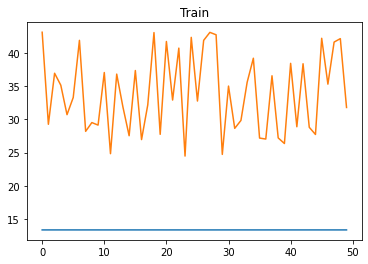

2/2 [==============================] - 4s 23ms/step


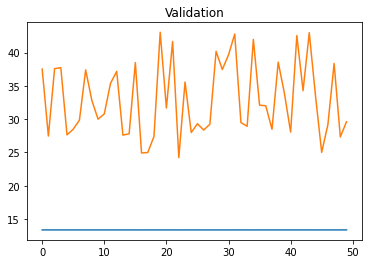

3/3 [==============================] - 0s 23ms/step


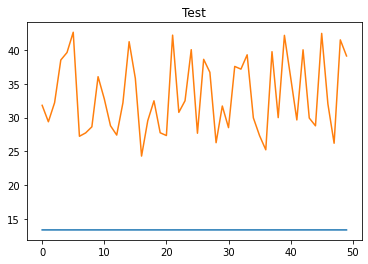

3/3 [==============================] - 0s 11ms/step


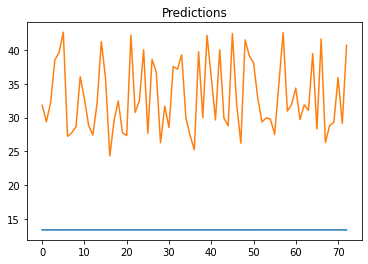

In [47]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_lstm_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [48]:
hybrid_lstm_rnn_gru_mse

417.0197374112269

## Moving Average

### CNN LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 1030.9479 - root_mean_squared_error: 32.1084

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 58s 7s/step - loss: 1031.0778 - root_mean_squared_error: 32.1104 - val_loss: 1072.6261 - val_root_mean_squared_error: 32.7510
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 1014.1549 - root_mean_squared_error: 31.8458

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 1014.1549 - root_mean_squared_error: 31.8458 - val_loss: 1059.6227 - val_root_mean_squared_error: 32.5518
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 1003.1063 - root_mean_squared_error: 31.6719

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 1003.1063 - root_mean_squared_error: 31.6719 - val_loss: 1047.9469 - val_root_mean_squared_error: 32.3720
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 985.9487 - root_mean_squared_error: 31.3998

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 985.9487 - root_mean_squared_error: 31.3998 - val_loss: 1028.2013 - val_root_mean_squared_error: 32.0656
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 973.7026 - root_mean_squared_error: 31.2042

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 972.1068 - root_mean_squared_error: 31.1786 - val_loss: 1017.0064 - val_root_mean_squared_error: 31.8905
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 963.9457 - root_mean_squared_error: 31.0475

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 961.2150 - root_mean_squared_error: 31.0035 - val_loss: 1006.8172 - val_root_mean_squared_error: 31.7304
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 953.7899 - root_mean_squared_error: 30.8835

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 45s 6s/step - loss: 951.8540 - root_mean_squared_error: 30.8521 - val_loss: 996.9149 - val_root_mean_squared_error: 31.5740
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 942.3937 - root_mean_squared_error: 30.6984

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 942.3937 - root_mean_squared_error: 30.6984 - val_loss: 986.0469 - val_root_mean_squared_error: 31.4014
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 931.4662 - root_mean_squared_error: 30.5199

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 931.4662 - root_mean_squared_error: 30.5199 - val_loss: 975.8405 - val_root_mean_squared_error: 31.2384
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 921.8902 - root_mean_squared_error: 30.3626

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 46s 7s/step - loss: 921.8902 - root_mean_squared_error: 30.3626 - val_loss: 965.6115 - val_root_mean_squared_error: 31.0743
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 914.0124 - root_mean_squared_error: 30.2326

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 911.8369 - root_mean_squared_error: 30.1966 - val_loss: 955.6738 - val_root_mean_squared_error: 30.9140
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 899.2567 - root_mean_squared_error: 29.9876

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 902.4925 - root_mean_squared_error: 30.0415 - val_loss: 946.0070 - val_root_mean_squared_error: 30.7572
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 893.1371 - root_mean_squared_error: 29.8854

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 893.1371 - root_mean_squared_error: 29.8854 - val_loss: 936.3517 - val_root_mean_squared_error: 30.5999
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 884.9423 - root_mean_squared_error: 29.7480

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 883.8354 - root_mean_squared_error: 29.7294 - val_loss: 926.8327 - val_root_mean_squared_error: 30.4439
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 878.4756 - root_mean_squared_error: 29.6391

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 874.6984 - root_mean_squared_error: 29.5753 - val_loss: 917.5230 - val_root_mean_squared_error: 30.2906
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 865.7751 - root_mean_squared_error: 29.4241

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 865.7751 - root_mean_squared_error: 29.4241 - val_loss: 908.4725 - val_root_mean_squared_error: 30.1409
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 857.8940 - root_mean_squared_error: 29.2898

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 857.1197 - root_mean_squared_error: 29.2766 - val_loss: 899.5914 - val_root_mean_squared_error: 29.9932
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 848.4531 - root_mean_squared_error: 29.1282

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 848.4531 - root_mean_squared_error: 29.1282 - val_loss: 890.3354 - val_root_mean_squared_error: 29.8385
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 841.8702 - root_mean_squared_error: 29.0150

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 839.6354 - root_mean_squared_error: 28.9765 - val_loss: 881.7778 - val_root_mean_squared_error: 29.6947
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 827.1913 - root_mean_squared_error: 28.7609

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 831.2897 - root_mean_squared_error: 28.8321 - val_loss: 873.3254 - val_root_mean_squared_error: 29.5521
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 823.1806 - root_mean_squared_error: 28.6911

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 25s 3s/step - loss: 823.1806 - root_mean_squared_error: 28.6911 - val_loss: 865.1614 - val_root_mean_squared_error: 29.4136
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 815.3068 - root_mean_squared_error: 28.5536

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 815.3068 - root_mean_squared_error: 28.5536 - val_loss: 857.1368 - val_root_mean_squared_error: 29.2769
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 807.4014 - root_mean_squared_error: 28.4148

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 807.4014 - root_mean_squared_error: 28.4148 - val_loss: 849.1278 - val_root_mean_squared_error: 29.1398
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 799.8226 - root_mean_squared_error: 28.2811

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 799.8226 - root_mean_squared_error: 28.2811 - val_loss: 841.6626 - val_root_mean_squared_error: 29.0114
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 792.7103 - root_mean_squared_error: 28.1551

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 51s 7s/step - loss: 792.7103 - root_mean_squared_error: 28.1551 - val_loss: 834.4388 - val_root_mean_squared_error: 28.8867
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 784.9803 - root_mean_squared_error: 28.0175

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 785.7791 - root_mean_squared_error: 28.0318 - val_loss: 827.4841 - val_root_mean_squared_error: 28.7660
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 777.5473 - root_mean_squared_error: 27.8845

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 779.1342 - root_mean_squared_error: 27.9130 - val_loss: 820.5421 - val_root_mean_squared_error: 28.6451
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 771.0033 - root_mean_squared_error: 27.7669

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 771.6066 - root_mean_squared_error: 27.7778 - val_loss: 811.8989 - val_root_mean_squared_error: 28.4938
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 763.8104 - root_mean_squared_error: 27.6371

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 54s 8s/step - loss: 763.8104 - root_mean_squared_error: 27.6371 - val_loss: 802.4208 - val_root_mean_squared_error: 28.3270
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 754.1592 - root_mean_squared_error: 27.4620

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 754.1592 - root_mean_squared_error: 27.4620 - val_loss: 794.8168 - val_root_mean_squared_error: 28.1925
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 746.6411 - root_mean_squared_error: 27.3247

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 747.6790 - root_mean_squared_error: 27.3437 - val_loss: 788.4898 - val_root_mean_squared_error: 28.0801
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 741.6669 - root_mean_squared_error: 27.2336

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 741.6669 - root_mean_squared_error: 27.2336 - val_loss: 782.4525 - val_root_mean_squared_error: 27.9724
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 735.8907 - root_mean_squared_error: 27.1273

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 735.8907 - root_mean_squared_error: 27.1273 - val_loss: 776.6465 - val_root_mean_squared_error: 27.8684
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 730.3418 - root_mean_squared_error: 27.0248

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 730.3418 - root_mean_squared_error: 27.0248 - val_loss: 770.9907 - val_root_mean_squared_error: 27.7667
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 724.9228 - root_mean_squared_error: 26.9244

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 724.9228 - root_mean_squared_error: 26.9244 - val_loss: 765.5493 - val_root_mean_squared_error: 27.6686
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 719.6767 - root_mean_squared_error: 26.8268

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 719.6767 - root_mean_squared_error: 26.8268 - val_loss: 760.2045 - val_root_mean_squared_error: 27.5718
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 714.5218 - root_mean_squared_error: 26.7305

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 46s 7s/step - loss: 714.5218 - root_mean_squared_error: 26.7305 - val_loss: 754.9131 - val_root_mean_squared_error: 27.4757
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 712.0505 - root_mean_squared_error: 26.6843

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 709.4260 - root_mean_squared_error: 26.6351 - val_loss: 749.7413 - val_root_mean_squared_error: 27.3814
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 704.4495 - root_mean_squared_error: 26.5415

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 704.4495 - root_mean_squared_error: 26.5415 - val_loss: 744.6933 - val_root_mean_squared_error: 27.2891
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 699.5892 - root_mean_squared_error: 26.4497

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 699.5892 - root_mean_squared_error: 26.4497 - val_loss: 739.6539 - val_root_mean_squared_error: 27.1966
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 686.2869 - root_mean_squared_error: 26.1971

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 694.7124 - root_mean_squared_error: 26.3574 - val_loss: 734.7043 - val_root_mean_squared_error: 27.1054
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 689.9238 - root_mean_squared_error: 26.2664

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 689.9238 - root_mean_squared_error: 26.2664 - val_loss: 729.7384 - val_root_mean_squared_error: 27.0137
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 686.2598 - root_mean_squared_error: 26.1966

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 685.1507 - root_mean_squared_error: 26.1754 - val_loss: 724.8272 - val_root_mean_squared_error: 26.9226
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 680.4128 - root_mean_squared_error: 26.0847

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 680.4128 - root_mean_squared_error: 26.0847 - val_loss: 719.9564 - val_root_mean_squared_error: 26.8320
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 675.6860 - root_mean_squared_error: 25.9940

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 675.6860 - root_mean_squared_error: 25.9940 - val_loss: 715.0903 - val_root_mean_squared_error: 26.7412
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 673.5167 - root_mean_squared_error: 25.9522

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 670.9529 - root_mean_squared_error: 25.9028 - val_loss: 710.1642 - val_root_mean_squared_error: 26.6489
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 666.1884 - root_mean_squared_error: 25.8106

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 46s 7s/step - loss: 666.1884 - root_mean_squared_error: 25.8106 - val_loss: 705.2548 - val_root_mean_squared_error: 26.5566
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 661.4065 - root_mean_squared_error: 25.7178

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 661.4065 - root_mean_squared_error: 25.7178 - val_loss: 700.2952 - val_root_mean_squared_error: 26.4631
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 656.0887 - root_mean_squared_error: 25.6142

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 656.6044 - root_mean_squared_error: 25.6243 - val_loss: 695.2951 - val_root_mean_squared_error: 26.3684
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 651.7566 - root_mean_squared_error: 25.5295

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 7s 70ms/step


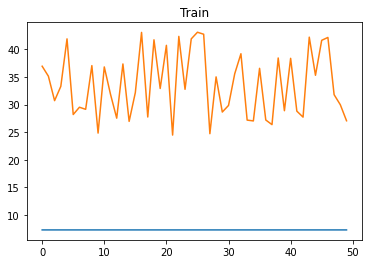

2/2 [==============================] - 3s 19ms/step


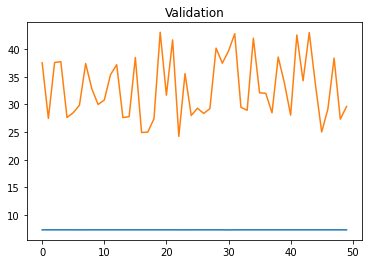

3/3 [==============================] - 0s 148ms/step


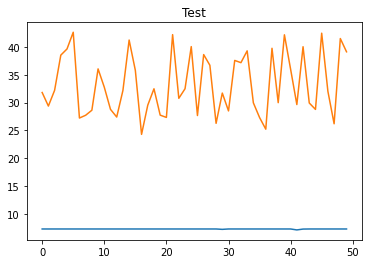

3/3 [==============================] - 0s 13ms/step


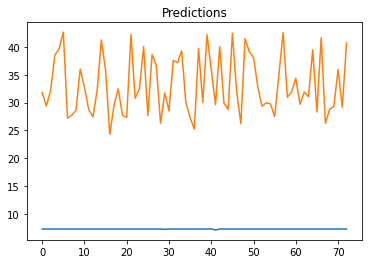

In [49]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [50]:
mavg_hybrid_cnn_lstm_mse

692.926394401961

### RNN LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 1072.7692 - root_mean_squared_error: 32.7532

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 43s 4s/step - loss: 1076.2297 - root_mean_squared_error: 32.8059 - val_loss: 1119.9810 - val_root_mean_squared_error: 33.4661
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 1066.6405 - root_mean_squared_error: 32.6595

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 1059.4828 - root_mean_squared_error: 32.5497 - val_loss: 1103.2062 - val_root_mean_squared_error: 33.2145
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 1047.7822 - root_mean_squared_error: 32.3695

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 1043.1449 - root_mean_squared_error: 32.2978 - val_loss: 1087.4320 - val_root_mean_squared_error: 32.9762
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 1027.2864 - root_mean_squared_error: 32.0513

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 1027.8334 - root_mean_squared_error: 32.0598 - val_loss: 1071.4554 - val_root_mean_squared_error: 32.7331
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 1012.6557 - root_mean_squared_error: 31.8223

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 1011.7151 - root_mean_squared_error: 31.8075 - val_loss: 1055.9595 - val_root_mean_squared_error: 32.4955
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 1002.1107 - root_mean_squared_error: 31.6561

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 997.0962 - root_mean_squared_error: 31.5768 - val_loss: 1041.7327 - val_root_mean_squared_error: 32.2759
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 988.9644 - root_mean_squared_error: 31.4478

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 983.4877 - root_mean_squared_error: 31.3606 - val_loss: 1027.9999 - val_root_mean_squared_error: 32.0624
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 978.0606 - root_mean_squared_error: 31.2740

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 970.1669 - root_mean_squared_error: 31.1475 - val_loss: 1014.3984 - val_root_mean_squared_error: 31.8496
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 956.8720 - root_mean_squared_error: 30.9333

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 956.8720 - root_mean_squared_error: 30.9333 - val_loss: 1000.6758 - val_root_mean_squared_error: 31.6335
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 943.4672 - root_mean_squared_error: 30.7159

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 943.4672 - root_mean_squared_error: 30.7159 - val_loss: 986.9811 - val_root_mean_squared_error: 31.4163
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 930.0649 - root_mean_squared_error: 30.4970

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 930.0649 - root_mean_squared_error: 30.4970 - val_loss: 973.1292 - val_root_mean_squared_error: 31.1950
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 916.5623 - root_mean_squared_error: 30.2748

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 916.5623 - root_mean_squared_error: 30.2748 - val_loss: 959.3549 - val_root_mean_squared_error: 30.9735
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 903.2093 - root_mean_squared_error: 30.0534

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 903.2093 - root_mean_squared_error: 30.0534 - val_loss: 945.8442 - val_root_mean_squared_error: 30.7546
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 893.0989 - root_mean_squared_error: 29.8848

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 890.2373 - root_mean_squared_error: 29.8368 - val_loss: 932.8224 - val_root_mean_squared_error: 30.5421
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 877.7294 - root_mean_squared_error: 29.6265

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 877.7294 - root_mean_squared_error: 29.6265 - val_loss: 920.3535 - val_root_mean_squared_error: 30.3373
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 868.0728 - root_mean_squared_error: 29.4631

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 865.8017 - root_mean_squared_error: 29.4245 - val_loss: 908.5776 - val_root_mean_squared_error: 30.1426
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 854.6412 - root_mean_squared_error: 29.2342

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 854.6412 - root_mean_squared_error: 29.2342 - val_loss: 897.3904 - val_root_mean_squared_error: 29.9565
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 843.9706 - root_mean_squared_error: 29.0512

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 843.9706 - root_mean_squared_error: 29.0512 - val_loss: 886.8431 - val_root_mean_squared_error: 29.7799
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 833.9627 - root_mean_squared_error: 28.8784

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 833.9627 - root_mean_squared_error: 28.8784 - val_loss: 876.8654 - val_root_mean_squared_error: 29.6119
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 820.1824 - root_mean_squared_error: 28.6388

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 824.5093 - root_mean_squared_error: 28.7143 - val_loss: 867.4186 - val_root_mean_squared_error: 29.4520
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 816.7350 - root_mean_squared_error: 28.5786

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 815.6130 - root_mean_squared_error: 28.5589 - val_loss: 858.5145 - val_root_mean_squared_error: 29.3004
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 819.3147 - root_mean_squared_error: 28.6237

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 807.2130 - root_mean_squared_error: 28.4115 - val_loss: 850.1262 - val_root_mean_squared_error: 29.1569
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 800.6813 - root_mean_squared_error: 28.2963

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 799.2742 - root_mean_squared_error: 28.2714 - val_loss: 842.2238 - val_root_mean_squared_error: 29.0211
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 791.8655 - root_mean_squared_error: 28.1401

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 791.8757 - root_mean_squared_error: 28.1403 - val_loss: 834.7745 - val_root_mean_squared_error: 28.8925
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 787.4157 - root_mean_squared_error: 28.0609

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 784.8442 - root_mean_squared_error: 28.0151 - val_loss: 827.7523 - val_root_mean_squared_error: 28.7707
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 776.6844 - root_mean_squared_error: 27.8691

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 778.1685 - root_mean_squared_error: 27.8957 - val_loss: 821.0760 - val_root_mean_squared_error: 28.6544
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 771.9697 - root_mean_squared_error: 27.7843

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 771.9697 - root_mean_squared_error: 27.7843 - val_loss: 814.8911 - val_root_mean_squared_error: 28.5463
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 766.1865 - root_mean_squared_error: 27.6801

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 766.1865 - root_mean_squared_error: 27.6801 - val_loss: 809.0826 - val_root_mean_squared_error: 28.4444
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 758.3275 - root_mean_squared_error: 27.5377

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 760.7438 - root_mean_squared_error: 27.5816 - val_loss: 803.6000 - val_root_mean_squared_error: 28.3478
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 759.4661 - root_mean_squared_error: 27.5584

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 755.5753 - root_mean_squared_error: 27.4877 - val_loss: 798.3632 - val_root_mean_squared_error: 28.2553
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 750.6654 - root_mean_squared_error: 27.3983

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 750.6654 - root_mean_squared_error: 27.3983 - val_loss: 793.3792 - val_root_mean_squared_error: 28.1670
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 745.9396 - root_mean_squared_error: 27.3119

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 745.9396 - root_mean_squared_error: 27.3119 - val_loss: 788.5373 - val_root_mean_squared_error: 28.0809
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 736.1861 - root_mean_squared_error: 27.1327

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 741.3688 - root_mean_squared_error: 27.2281 - val_loss: 783.8681 - val_root_mean_squared_error: 27.9976
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 731.9413 - root_mean_squared_error: 27.0544

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 736.9334 - root_mean_squared_error: 27.1465 - val_loss: 779.2552 - val_root_mean_squared_error: 27.9151
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 732.5423 - root_mean_squared_error: 27.0655

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 732.5423 - root_mean_squared_error: 27.0655 - val_loss: 774.7194 - val_root_mean_squared_error: 27.8338
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 728.2023 - root_mean_squared_error: 26.9852

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 728.2023 - root_mean_squared_error: 26.9852 - val_loss: 770.2488 - val_root_mean_squared_error: 27.7534
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 725.2464 - root_mean_squared_error: 26.9304

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 723.9017 - root_mean_squared_error: 26.9054 - val_loss: 765.7897 - val_root_mean_squared_error: 27.6729
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 719.6213 - root_mean_squared_error: 26.8258

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 719.6213 - root_mean_squared_error: 26.8258 - val_loss: 761.3151 - val_root_mean_squared_error: 27.5919
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 710.4026 - root_mean_squared_error: 26.6534

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 715.2832 - root_mean_squared_error: 26.7448 - val_loss: 756.8026 - val_root_mean_squared_error: 27.5100
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 715.6408 - root_mean_squared_error: 26.7515

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 710.9398 - root_mean_squared_error: 26.6635 - val_loss: 752.2330 - val_root_mean_squared_error: 27.4269
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 704.3525 - root_mean_squared_error: 26.5396

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 706.5560 - root_mean_squared_error: 26.5811 - val_loss: 747.7362 - val_root_mean_squared_error: 27.3448
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 703.9287 - root_mean_squared_error: 26.5317

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 702.2371 - root_mean_squared_error: 26.4998 - val_loss: 743.2797 - val_root_mean_squared_error: 27.2632
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 697.9550 - root_mean_squared_error: 26.4188

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 697.9550 - root_mean_squared_error: 26.4188 - val_loss: 738.9499 - val_root_mean_squared_error: 27.1836
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 696.1403 - root_mean_squared_error: 26.3845

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 693.8380 - root_mean_squared_error: 26.3408 - val_loss: 734.7498 - val_root_mean_squared_error: 27.1063
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 688.6466 - root_mean_squared_error: 26.2421

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 689.8369 - root_mean_squared_error: 26.2647 - val_loss: 730.7469 - val_root_mean_squared_error: 27.0323
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 687.7761 - root_mean_squared_error: 26.2255

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 686.0552 - root_mean_squared_error: 26.1927 - val_loss: 726.8951 - val_root_mean_squared_error: 26.9610
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 682.4084 - root_mean_squared_error: 26.1229

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 682.4084 - root_mean_squared_error: 26.1229 - val_loss: 723.2382 - val_root_mean_squared_error: 26.8931
Epoch 48/50
6/8 [=====================>........] - ETA: 0s - loss: 682.9741 - root_mean_squared_error: 26.1338

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 678.9453 - root_mean_squared_error: 26.0566 - val_loss: 719.7469 - val_root_mean_squared_error: 26.8281
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 676.3150 - root_mean_squared_error: 26.0061

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 675.6358 - root_mean_squared_error: 25.9930 - val_loss: 716.4169 - val_root_mean_squared_error: 26.7660
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 673.7539 - root_mean_squared_error: 25.9568

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 2s 16ms/step


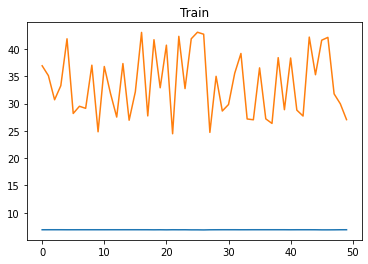

2/2 [==============================] - 1s 15ms/step


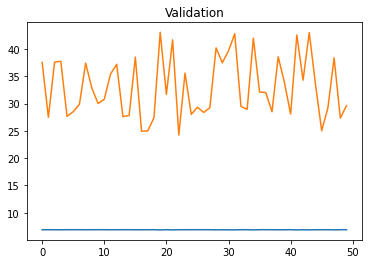

3/3 [==============================] - 0s 19ms/step


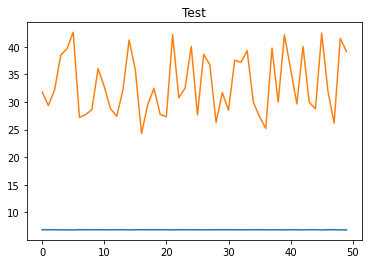

3/3 [==============================] - 0s 11ms/step


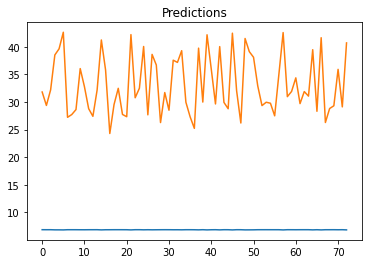

In [51]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(15,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [52]:
mavg_hybrid_rnn_lstm_mse

715.8295904956366

### RNN GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 1065.6484 - root_mean_squared_error: 32.6443

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 35s 3s/step - loss: 1065.6484 - root_mean_squared_error: 32.6443 - val_loss: 1107.5853 - val_root_mean_squared_error: 33.2804
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 1045.7139 - root_mean_squared_error: 32.3375

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 1045.7139 - root_mean_squared_error: 32.3375 - val_loss: 1087.3394 - val_root_mean_squared_error: 32.9748
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 1025.8218 - root_mean_squared_error: 32.0285

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 1025.8218 - root_mean_squared_error: 32.0285 - val_loss: 1067.9607 - val_root_mean_squared_error: 32.6797
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 1007.8615 - root_mean_squared_error: 31.7468

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 1007.8615 - root_mean_squared_error: 31.7468 - val_loss: 1051.1772 - val_root_mean_squared_error: 32.4219
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 991.6036 - root_mean_squared_error: 31.4897

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 991.6036 - root_mean_squared_error: 31.4897 - val_loss: 1035.2733 - val_root_mean_squared_error: 32.1757
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 976.1317 - root_mean_squared_error: 31.2431

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 976.1317 - root_mean_squared_error: 31.2431 - val_loss: 1019.8134 - val_root_mean_squared_error: 31.9345
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 961.0109 - root_mean_squared_error: 31.0002

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 961.0109 - root_mean_squared_error: 31.0002 - val_loss: 1004.8728 - val_root_mean_squared_error: 31.6997
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 946.4229 - root_mean_squared_error: 30.7640

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 946.4229 - root_mean_squared_error: 30.7640 - val_loss: 990.2697 - val_root_mean_squared_error: 31.4686
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 935.7123 - root_mean_squared_error: 30.5894

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 932.0671 - root_mean_squared_error: 30.5298 - val_loss: 975.9466 - val_root_mean_squared_error: 31.2401
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 922.2216 - root_mean_squared_error: 30.3681

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 918.1088 - root_mean_squared_error: 30.3003 - val_loss: 961.9512 - val_root_mean_squared_error: 31.0153
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 905.6783 - root_mean_squared_error: 30.0945

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 904.4974 - root_mean_squared_error: 30.0749 - val_loss: 948.3641 - val_root_mean_squared_error: 30.7955
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 892.6387 - root_mean_squared_error: 29.8771

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 891.3738 - root_mean_squared_error: 29.8559 - val_loss: 935.1646 - val_root_mean_squared_error: 30.5805
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 878.6702 - root_mean_squared_error: 29.6424

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 878.6702 - root_mean_squared_error: 29.6424 - val_loss: 922.4998 - val_root_mean_squared_error: 30.3727
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 868.2421 - root_mean_squared_error: 29.4659

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 866.6960 - root_mean_squared_error: 29.4397 - val_loss: 910.2910 - val_root_mean_squared_error: 30.1710
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 855.1027 - root_mean_squared_error: 29.2421

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 855.1893 - root_mean_squared_error: 29.2436 - val_loss: 898.8077 - val_root_mean_squared_error: 29.9801
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 843.8638 - root_mean_squared_error: 29.0493

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 844.3584 - root_mean_squared_error: 29.0578 - val_loss: 888.0286 - val_root_mean_squared_error: 29.7998
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 837.7529 - root_mean_squared_error: 28.9440

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 834.2656 - root_mean_squared_error: 28.8837 - val_loss: 877.9235 - val_root_mean_squared_error: 29.6298
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 824.2857 - root_mean_squared_error: 28.7104

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 824.8511 - root_mean_squared_error: 28.7202 - val_loss: 868.5234 - val_root_mean_squared_error: 29.4707
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 816.0828 - root_mean_squared_error: 28.5672

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 816.0828 - root_mean_squared_error: 28.5672 - val_loss: 859.7383 - val_root_mean_squared_error: 29.3213
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 807.9108 - root_mean_squared_error: 28.4238

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 807.9108 - root_mean_squared_error: 28.4238 - val_loss: 851.5859 - val_root_mean_squared_error: 29.1819
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 801.1693 - root_mean_squared_error: 28.3049

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 800.3405 - root_mean_squared_error: 28.2903 - val_loss: 844.0372 - val_root_mean_squared_error: 29.0523
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 791.7188 - root_mean_squared_error: 28.1375

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 793.3720 - root_mean_squared_error: 28.1669 - val_loss: 836.9869 - val_root_mean_squared_error: 28.9307
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 786.8110 - root_mean_squared_error: 28.0502

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 786.8110 - root_mean_squared_error: 28.0502 - val_loss: 830.4522 - val_root_mean_squared_error: 28.8176
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 778.9234 - root_mean_squared_error: 27.9092

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 780.7806 - root_mean_squared_error: 27.9425 - val_loss: 824.4080 - val_root_mean_squared_error: 28.7125
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 775.1663 - root_mean_squared_error: 27.8418

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 775.1663 - root_mean_squared_error: 27.8418 - val_loss: 818.7569 - val_root_mean_squared_error: 28.6139
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 767.7037 - root_mean_squared_error: 27.7075

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 769.9247 - root_mean_squared_error: 27.7475 - val_loss: 813.4944 - val_root_mean_squared_error: 28.5218
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 765.0336 - root_mean_squared_error: 27.6592

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 765.0336 - root_mean_squared_error: 27.6592 - val_loss: 808.5561 - val_root_mean_squared_error: 28.4351
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 759.4218 - root_mean_squared_error: 27.5576

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 760.4431 - root_mean_squared_error: 27.5761 - val_loss: 803.9391 - val_root_mean_squared_error: 28.3538
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 753.4929 - root_mean_squared_error: 27.4498

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 756.1649 - root_mean_squared_error: 27.4985 - val_loss: 799.5743 - val_root_mean_squared_error: 28.2767
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 751.4481 - root_mean_squared_error: 27.4126

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 752.0898 - root_mean_squared_error: 27.4243 - val_loss: 795.4460 - val_root_mean_squared_error: 28.2037
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 748.2378 - root_mean_squared_error: 27.3539

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 748.2378 - root_mean_squared_error: 27.3539 - val_loss: 791.5353 - val_root_mean_squared_error: 28.1342
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 744.5650 - root_mean_squared_error: 27.2867

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 744.5650 - root_mean_squared_error: 27.2867 - val_loss: 787.8150 - val_root_mean_squared_error: 28.0680
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 741.4937 - root_mean_squared_error: 27.2304

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 741.1015 - root_mean_squared_error: 27.2232 - val_loss: 784.2644 - val_root_mean_squared_error: 28.0047
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 737.7502 - root_mean_squared_error: 27.1616

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 737.7502 - root_mean_squared_error: 27.1616 - val_loss: 780.8738 - val_root_mean_squared_error: 27.9441
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 732.3497 - root_mean_squared_error: 27.0620

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 734.5621 - root_mean_squared_error: 27.1028 - val_loss: 777.6040 - val_root_mean_squared_error: 27.8856
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 731.4720 - root_mean_squared_error: 27.0457

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 731.4720 - root_mean_squared_error: 27.0457 - val_loss: 774.4390 - val_root_mean_squared_error: 27.8287
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 729.5892 - root_mean_squared_error: 27.0109

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 728.4957 - root_mean_squared_error: 26.9907 - val_loss: 771.3645 - val_root_mean_squared_error: 27.7734
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 729.4121 - root_mean_squared_error: 27.0076

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 725.5961 - root_mean_squared_error: 26.9369 - val_loss: 768.4105 - val_root_mean_squared_error: 27.7202
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 722.8010 - root_mean_squared_error: 26.8850

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 722.8010 - root_mean_squared_error: 26.8850 - val_loss: 765.5688 - val_root_mean_squared_error: 27.6689
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 720.1134 - root_mean_squared_error: 26.8349

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 720.1017 - root_mean_squared_error: 26.8347 - val_loss: 762.7926 - val_root_mean_squared_error: 27.6187
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 717.4751 - root_mean_squared_error: 26.7857

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 25s 3s/step - loss: 717.4751 - root_mean_squared_error: 26.7857 - val_loss: 760.0867 - val_root_mean_squared_error: 27.5697
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 714.8951 - root_mean_squared_error: 26.7375

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 714.8951 - root_mean_squared_error: 26.7375 - val_loss: 757.4438 - val_root_mean_squared_error: 27.5217
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 711.9334 - root_mean_squared_error: 26.6821

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 712.3857 - root_mean_squared_error: 26.6906 - val_loss: 754.8687 - val_root_mean_squared_error: 27.4749
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 709.2610 - root_mean_squared_error: 26.6320

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 709.9392 - root_mean_squared_error: 26.6447 - val_loss: 752.3692 - val_root_mean_squared_error: 27.4293
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 707.5656 - root_mean_squared_error: 26.6001

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 707.5656 - root_mean_squared_error: 26.6001 - val_loss: 749.9320 - val_root_mean_squared_error: 27.3849
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 705.2556 - root_mean_squared_error: 26.5566

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 705.2556 - root_mean_squared_error: 26.5566 - val_loss: 747.5417 - val_root_mean_squared_error: 27.3412
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 703.8210 - root_mean_squared_error: 26.5296

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 702.9661 - root_mean_squared_error: 26.5135 - val_loss: 745.2057 - val_root_mean_squared_error: 27.2985
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 700.7451 - root_mean_squared_error: 26.4716

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 700.7451 - root_mean_squared_error: 26.4716 - val_loss: 742.9306 - val_root_mean_squared_error: 27.2568
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 698.5629 - root_mean_squared_error: 26.4303

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 698.5629 - root_mean_squared_error: 26.4303 - val_loss: 740.6865 - val_root_mean_squared_error: 27.2156
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 694.4072 - root_mean_squared_error: 26.3516

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 3s 10ms/step


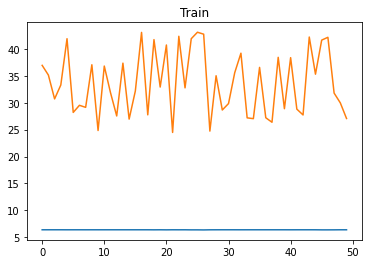

2/2 [==============================] - 2s 15ms/step


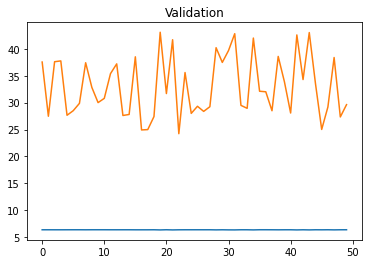

3/3 [==============================] - 1s 31ms/step


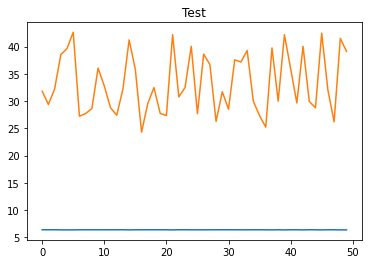

3/3 [==============================] - 0s 9ms/step


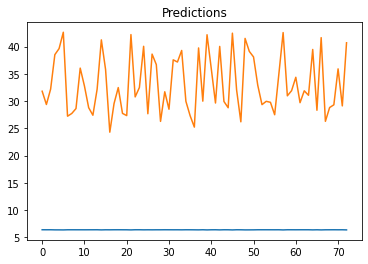

In [53]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [54]:
mavg_hybrid_rnn_gru_mse

741.1372432040649

### CNN GRU

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 1025.0245 - root_mean_squared_error: 32.0160

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 37s 4s/step - loss: 1022.9291 - root_mean_squared_error: 31.9833 - val_loss: 1060.0889 - val_root_mean_squared_error: 32.5590
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 997.9633 - root_mean_squared_error: 31.5906

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 999.7852 - root_mean_squared_error: 31.6194 - val_loss: 1038.1627 - val_root_mean_squared_error: 32.2205
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 982.5908 - root_mean_squared_error: 31.3463

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 981.9232 - root_mean_squared_error: 31.3357 - val_loss: 1025.6858 - val_root_mean_squared_error: 32.0263
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 969.9728 - root_mean_squared_error: 31.1444

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 969.9728 - root_mean_squared_error: 31.1444 - val_loss: 1013.5093 - val_root_mean_squared_error: 31.8357
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 958.1594 - root_mean_squared_error: 30.9541

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 958.1594 - root_mean_squared_error: 30.9541 - val_loss: 1001.4918 - val_root_mean_squared_error: 31.6464
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 951.3702 - root_mean_squared_error: 30.8443

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 946.5775 - root_mean_squared_error: 30.7665 - val_loss: 989.6223 - val_root_mean_squared_error: 31.4583
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 935.0443 - root_mean_squared_error: 30.5785

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 935.0443 - root_mean_squared_error: 30.5785 - val_loss: 977.9240 - val_root_mean_squared_error: 31.2718
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 923.7527 - root_mean_squared_error: 30.3933

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 57s 8s/step - loss: 923.7527 - root_mean_squared_error: 30.3933 - val_loss: 966.2895 - val_root_mean_squared_error: 31.0852
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 907.2438 - root_mean_squared_error: 30.1205

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 912.3152 - root_mean_squared_error: 30.2046 - val_loss: 954.6978 - val_root_mean_squared_error: 30.8982
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 896.6616 - root_mean_squared_error: 29.9443

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 901.0273 - root_mean_squared_error: 30.0171 - val_loss: 943.1017 - val_root_mean_squared_error: 30.7100
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 889.7939 - root_mean_squared_error: 29.8294

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 889.7939 - root_mean_squared_error: 29.8294 - val_loss: 931.5494 - val_root_mean_squared_error: 30.5213
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 878.6801 - root_mean_squared_error: 29.6425

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 878.6801 - root_mean_squared_error: 29.6425 - val_loss: 920.1266 - val_root_mean_squared_error: 30.3336
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 867.5540 - root_mean_squared_error: 29.4543

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 867.5540 - root_mean_squared_error: 29.4543 - val_loss: 908.8572 - val_root_mean_squared_error: 30.1473
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 856.6216 - root_mean_squared_error: 29.2681

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 856.6216 - root_mean_squared_error: 29.2681 - val_loss: 897.6344 - val_root_mean_squared_error: 29.9605
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 845.7705 - root_mean_squared_error: 29.0821

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 57s 8s/step - loss: 845.7705 - root_mean_squared_error: 29.0821 - val_loss: 886.4575 - val_root_mean_squared_error: 29.7734
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 834.9435 - root_mean_squared_error: 28.8954

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 834.9435 - root_mean_squared_error: 28.8954 - val_loss: 875.4664 - val_root_mean_squared_error: 29.5883
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 821.2933 - root_mean_squared_error: 28.6582

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 824.3624 - root_mean_squared_error: 28.7117 - val_loss: 864.6179 - val_root_mean_squared_error: 29.4044
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 810.0463 - root_mean_squared_error: 28.4613

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 813.8170 - root_mean_squared_error: 28.5275 - val_loss: 853.9653 - val_root_mean_squared_error: 29.2227
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 803.5938 - root_mean_squared_error: 28.3477

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 803.5938 - root_mean_squared_error: 28.3477 - val_loss: 843.5028 - val_root_mean_squared_error: 29.0431
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 793.5381 - root_mean_squared_error: 28.1698

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 793.5381 - root_mean_squared_error: 28.1698 - val_loss: 833.4139 - val_root_mean_squared_error: 28.8689
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 783.9052 - root_mean_squared_error: 27.9983

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 783.9052 - root_mean_squared_error: 27.9983 - val_loss: 823.6292 - val_root_mean_squared_error: 28.6989
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 774.5492 - root_mean_squared_error: 27.8307

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 774.5492 - root_mean_squared_error: 27.8307 - val_loss: 814.2651 - val_root_mean_squared_error: 28.5353
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 768.9609 - root_mean_squared_error: 27.7301

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 765.5758 - root_mean_squared_error: 27.6690 - val_loss: 805.3242 - val_root_mean_squared_error: 28.3782
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 757.0535 - root_mean_squared_error: 27.5146

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 56s 8s/step - loss: 757.0535 - root_mean_squared_error: 27.5146 - val_loss: 796.8201 - val_root_mean_squared_error: 28.2280
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 748.9682 - root_mean_squared_error: 27.3673

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 748.9682 - root_mean_squared_error: 27.3673 - val_loss: 788.7090 - val_root_mean_squared_error: 28.0840
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 741.1992 - root_mean_squared_error: 27.2250

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 741.1992 - root_mean_squared_error: 27.2250 - val_loss: 780.8644 - val_root_mean_squared_error: 27.9440
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 735.3270 - root_mean_squared_error: 27.1169

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 733.7305 - root_mean_squared_error: 27.0875 - val_loss: 773.4382 - val_root_mean_squared_error: 27.8108
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 730.8749 - root_mean_squared_error: 27.0347

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 726.7292 - root_mean_squared_error: 26.9579 - val_loss: 766.4786 - val_root_mean_squared_error: 27.6854
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 720.2862 - root_mean_squared_error: 26.8381

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 720.1141 - root_mean_squared_error: 26.8349 - val_loss: 759.9669 - val_root_mean_squared_error: 27.5675
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 713.9327 - root_mean_squared_error: 26.7195

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 713.9327 - root_mean_squared_error: 26.7195 - val_loss: 753.7665 - val_root_mean_squared_error: 27.4548
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 708.0648 - root_mean_squared_error: 26.6095

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 708.0648 - root_mean_squared_error: 26.6095 - val_loss: 747.8690 - val_root_mean_squared_error: 27.3472
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 702.4755 - root_mean_squared_error: 26.5043

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 702.4755 - root_mean_squared_error: 26.5043 - val_loss: 742.3366 - val_root_mean_squared_error: 27.2459
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 697.2338 - root_mean_squared_error: 26.4052

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 697.2338 - root_mean_squared_error: 26.4052 - val_loss: 737.0922 - val_root_mean_squared_error: 27.1494
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 692.2332 - root_mean_squared_error: 26.3103

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 692.2332 - root_mean_squared_error: 26.3103 - val_loss: 732.1102 - val_root_mean_squared_error: 27.0575
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 687.5212 - root_mean_squared_error: 26.2206

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 687.5212 - root_mean_squared_error: 26.2206 - val_loss: 727.3904 - val_root_mean_squared_error: 26.9702
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 683.0908 - root_mean_squared_error: 26.1360

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 683.0492 - root_mean_squared_error: 26.1352 - val_loss: 722.9038 - val_root_mean_squared_error: 26.8869
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 676.3501 - root_mean_squared_error: 26.0067

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 678.7736 - root_mean_squared_error: 26.0533 - val_loss: 718.6732 - val_root_mean_squared_error: 26.8081
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 674.7610 - root_mean_squared_error: 25.9762

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 674.7610 - root_mean_squared_error: 25.9762 - val_loss: 714.6427 - val_root_mean_squared_error: 26.7328
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 670.9584 - root_mean_squared_error: 25.9029

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 670.9584 - root_mean_squared_error: 25.9029 - val_loss: 710.8270 - val_root_mean_squared_error: 26.6613
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 667.3450 - root_mean_squared_error: 25.8330

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 667.3450 - root_mean_squared_error: 25.8330 - val_loss: 707.2431 - val_root_mean_squared_error: 26.5940
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 659.9361 - root_mean_squared_error: 25.6892

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 663.9272 - root_mean_squared_error: 25.7668 - val_loss: 703.7986 - val_root_mean_squared_error: 26.5292
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 660.6334 - root_mean_squared_error: 25.7028

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 660.6334 - root_mean_squared_error: 25.7028 - val_loss: 700.4692 - val_root_mean_squared_error: 26.4664
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 657.4735 - root_mean_squared_error: 25.6412

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 657.4735 - root_mean_squared_error: 25.6412 - val_loss: 697.2880 - val_root_mean_squared_error: 26.4062
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 654.4285 - root_mean_squared_error: 25.5818

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 654.4285 - root_mean_squared_error: 25.5818 - val_loss: 694.2372 - val_root_mean_squared_error: 26.3484
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 651.4973 - root_mean_squared_error: 25.5244

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 651.4973 - root_mean_squared_error: 25.5244 - val_loss: 691.2706 - val_root_mean_squared_error: 26.2920
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 648.6859 - root_mean_squared_error: 25.4693

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 648.6859 - root_mean_squared_error: 25.4693 - val_loss: 688.4220 - val_root_mean_squared_error: 26.2378
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 645.9717 - root_mean_squared_error: 25.4160

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 645.9717 - root_mean_squared_error: 25.4160 - val_loss: 685.6949 - val_root_mean_squared_error: 26.1858
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 643.3869 - root_mean_squared_error: 25.3651

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 643.3869 - root_mean_squared_error: 25.3651 - val_loss: 683.0754 - val_root_mean_squared_error: 26.1357
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 640.8732 - root_mean_squared_error: 25.3155

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 640.8732 - root_mean_squared_error: 25.3155 - val_loss: 680.5359 - val_root_mean_squared_error: 26.0871
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 638.4279 - root_mean_squared_error: 25.2671

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 5s 24ms/step


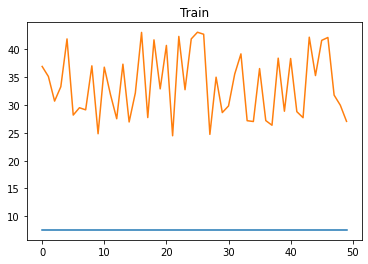

2/2 [==============================] - 2s 19ms/step


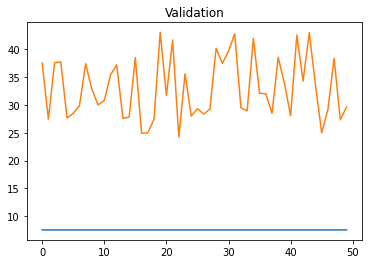

3/3 [==============================] - 1s 302ms/step


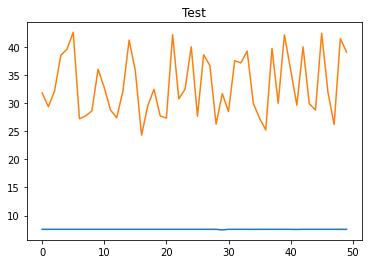

3/3 [==============================] - 0s 13ms/step


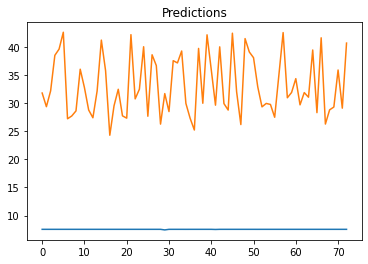

In [55]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [56]:
mavg_hybrid_cnn_gru_mse

680.603053466753

### CNN RNN GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 1035.9753 - root_mean_squared_error: 32.1866

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 53s 6s/step - loss: 1035.9753 - root_mean_squared_error: 32.1866 - val_loss: 1078.3309 - val_root_mean_squared_error: 32.8379
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 1017.1519 - root_mean_squared_error: 31.8928

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 1020.1180 - root_mean_squared_error: 31.9393 - val_loss: 1063.6216 - val_root_mean_squared_error: 32.6132
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 1005.8893 - root_mean_squared_error: 31.7158

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 1005.8893 - root_mean_squared_error: 31.7158 - val_loss: 1049.1183 - val_root_mean_squared_error: 32.3901
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 991.9206 - root_mean_squared_error: 31.4948 

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 991.9206 - root_mean_squared_error: 31.4948 - val_loss: 1034.9290 - val_root_mean_squared_error: 32.1703
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 978.2135 - root_mean_squared_error: 31.2764

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 978.2135 - root_mean_squared_error: 31.2764 - val_loss: 1021.0863 - val_root_mean_squared_error: 31.9544
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 966.8009 - root_mean_squared_error: 31.0934

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 964.8229 - root_mean_squared_error: 31.0616 - val_loss: 1007.5162 - val_root_mean_squared_error: 31.7414
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 951.6526 - root_mean_squared_error: 30.8489

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 951.6526 - root_mean_squared_error: 30.8489 - val_loss: 994.1882 - val_root_mean_squared_error: 31.5308
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 938.7600 - root_mean_squared_error: 30.6392

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 938.7600 - root_mean_squared_error: 30.6392 - val_loss: 981.0469 - val_root_mean_squared_error: 31.3217
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 926.0209 - root_mean_squared_error: 30.4306

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 926.0209 - root_mean_squared_error: 30.4306 - val_loss: 968.1076 - val_root_mean_squared_error: 31.1144
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 913.4080 - root_mean_squared_error: 30.2226

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 913.4080 - root_mean_squared_error: 30.2226 - val_loss: 955.2742 - val_root_mean_squared_error: 30.9075
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 901.2086 - root_mean_squared_error: 30.0201

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 900.9785 - root_mean_squared_error: 30.0163 - val_loss: 942.5812 - val_root_mean_squared_error: 30.7015
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 888.6215 - root_mean_squared_error: 29.8098

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 888.6215 - root_mean_squared_error: 29.8098 - val_loss: 930.1841 - val_root_mean_squared_error: 30.4989
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 876.7460 - root_mean_squared_error: 29.6099

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 876.7460 - root_mean_squared_error: 29.6099 - val_loss: 917.9605 - val_root_mean_squared_error: 30.2979
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 866.6865 - root_mean_squared_error: 29.4395

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 864.9299 - root_mean_squared_error: 29.4097 - val_loss: 906.0444 - val_root_mean_squared_error: 30.1006
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 850.4443 - root_mean_squared_error: 29.1624

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 853.4328 - root_mean_squared_error: 29.2136 - val_loss: 894.3466 - val_root_mean_squared_error: 29.9056
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 845.7973 - root_mean_squared_error: 29.0826

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 842.1757 - root_mean_squared_error: 29.0203 - val_loss: 882.7733 - val_root_mean_squared_error: 29.7115
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 830.9877 - root_mean_squared_error: 28.8269

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 830.9877 - root_mean_squared_error: 28.8269 - val_loss: 871.4943 - val_root_mean_squared_error: 29.5211
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 822.9244 - root_mean_squared_error: 28.6867

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 820.1296 - root_mean_squared_error: 28.6379 - val_loss: 860.3943 - val_root_mean_squared_error: 29.3325
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 809.3749 - root_mean_squared_error: 28.4495

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 809.3749 - root_mean_squared_error: 28.4495 - val_loss: 849.5466 - val_root_mean_squared_error: 29.1470
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 795.3226 - root_mean_squared_error: 28.2015

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 798.8826 - root_mean_squared_error: 28.2645 - val_loss: 838.8704 - val_root_mean_squared_error: 28.9633
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 788.5770 - root_mean_squared_error: 28.0816

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 788.5770 - root_mean_squared_error: 28.0816 - val_loss: 828.3614 - val_root_mean_squared_error: 28.7813
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 778.5368 - root_mean_squared_error: 27.9023

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 778.5368 - root_mean_squared_error: 27.9023 - val_loss: 818.1234 - val_root_mean_squared_error: 28.6029
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 765.3384 - root_mean_squared_error: 27.6647

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 768.7701 - root_mean_squared_error: 27.7267 - val_loss: 808.2200 - val_root_mean_squared_error: 28.4292
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 760.9824 - root_mean_squared_error: 27.5859

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 759.2004 - root_mean_squared_error: 27.5536 - val_loss: 798.4922 - val_root_mean_squared_error: 28.2576
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 750.5938 - root_mean_squared_error: 27.3970

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 749.8527 - root_mean_squared_error: 27.3834 - val_loss: 789.0556 - val_root_mean_squared_error: 28.0901
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 740.8534 - root_mean_squared_error: 27.2186

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 740.8534 - root_mean_squared_error: 27.2186 - val_loss: 779.8357 - val_root_mean_squared_error: 27.9255
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 732.0116 - root_mean_squared_error: 27.0557

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 732.0116 - root_mean_squared_error: 27.0557 - val_loss: 770.9333 - val_root_mean_squared_error: 27.7657
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 723.4098 - root_mean_squared_error: 26.8963

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 723.4098 - root_mean_squared_error: 26.8963 - val_loss: 762.2033 - val_root_mean_squared_error: 27.6080
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 716.1459 - root_mean_squared_error: 26.7609

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 715.0742 - root_mean_squared_error: 26.7409 - val_loss: 753.6918 - val_root_mean_squared_error: 27.4534
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 706.0592 - root_mean_squared_error: 26.5718

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 706.9562 - root_mean_squared_error: 26.5886 - val_loss: 745.5449 - val_root_mean_squared_error: 27.3047
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 699.1570 - root_mean_squared_error: 26.4416

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 699.1570 - root_mean_squared_error: 26.4416 - val_loss: 737.6802 - val_root_mean_squared_error: 27.1603
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 692.0269 - root_mean_squared_error: 26.3064

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 691.6035 - root_mean_squared_error: 26.2984 - val_loss: 730.0852 - val_root_mean_squared_error: 27.0201
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 685.8100 - root_mean_squared_error: 26.1880

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 684.3940 - root_mean_squared_error: 26.1609 - val_loss: 722.7299 - val_root_mean_squared_error: 26.8836
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 679.0566 - root_mean_squared_error: 26.0587

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 677.3943 - root_mean_squared_error: 26.0268 - val_loss: 715.6233 - val_root_mean_squared_error: 26.7511
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 671.9492 - root_mean_squared_error: 25.9220

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 670.5950 - root_mean_squared_error: 25.8958 - val_loss: 708.7416 - val_root_mean_squared_error: 26.6222
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 664.0446 - root_mean_squared_error: 25.7691

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 664.0446 - root_mean_squared_error: 25.7691 - val_loss: 702.0262 - val_root_mean_squared_error: 26.4958
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 657.5147 - root_mean_squared_error: 25.6420

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 657.5683 - root_mean_squared_error: 25.6431 - val_loss: 695.5314 - val_root_mean_squared_error: 26.3729
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 648.7405 - root_mean_squared_error: 25.4704

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 651.3356 - root_mean_squared_error: 25.5213 - val_loss: 689.1321 - val_root_mean_squared_error: 26.2513
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 640.7728 - root_mean_squared_error: 25.3135

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 645.1647 - root_mean_squared_error: 25.4001 - val_loss: 682.8386 - val_root_mean_squared_error: 26.1312
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 640.7568 - root_mean_squared_error: 25.3132

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 639.1198 - root_mean_squared_error: 25.2808 - val_loss: 676.6432 - val_root_mean_squared_error: 26.0124
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 633.2100 - root_mean_squared_error: 25.1637

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 633.2100 - root_mean_squared_error: 25.1637 - val_loss: 670.5988 - val_root_mean_squared_error: 25.8959
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 623.2391 - root_mean_squared_error: 24.9648

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 627.4034 - root_mean_squared_error: 25.0480 - val_loss: 664.6609 - val_root_mean_squared_error: 25.7810
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 623.2376 - root_mean_squared_error: 24.9647

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 621.6943 - root_mean_squared_error: 24.9338 - val_loss: 658.7805 - val_root_mean_squared_error: 25.6667
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 616.0641 - root_mean_squared_error: 24.8206

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 18s 2s/step - loss: 616.0641 - root_mean_squared_error: 24.8206 - val_loss: 653.0280 - val_root_mean_squared_error: 25.5544
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 608.1451 - root_mean_squared_error: 24.6606

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 610.5117 - root_mean_squared_error: 24.7085 - val_loss: 647.3663 - val_root_mean_squared_error: 25.4434
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 605.0653 - root_mean_squared_error: 24.5981

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 605.0653 - root_mean_squared_error: 24.5981 - val_loss: 641.7365 - val_root_mean_squared_error: 25.3325
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 597.6105 - root_mean_squared_error: 24.4461

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 599.6397 - root_mean_squared_error: 24.4875 - val_loss: 636.2300 - val_root_mean_squared_error: 25.2236
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 594.3387 - root_mean_squared_error: 24.3791

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 594.3387 - root_mean_squared_error: 24.3791 - val_loss: 630.7240 - val_root_mean_squared_error: 25.1142
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 591.8180 - root_mean_squared_error: 24.3273

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 589.0399 - root_mean_squared_error: 24.2701 - val_loss: 625.2764 - val_root_mean_squared_error: 25.0055
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 584.6322 - root_mean_squared_error: 24.1792

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 8s 374ms/step


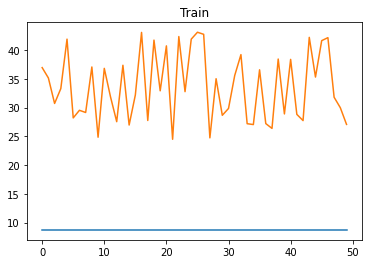

2/2 [==============================] - 1s 14ms/step


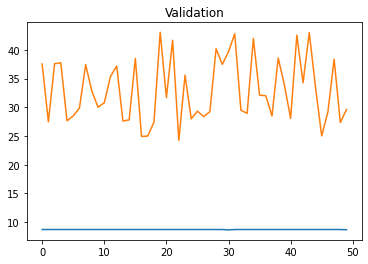

3/3 [==============================] - 0s 142ms/step


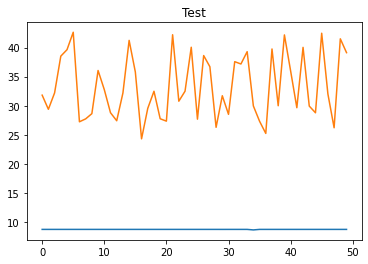

3/3 [==============================] - 0s 18ms/step


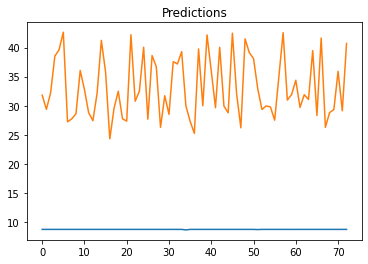

In [57]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [58]:
mavg_hybrid_cnn_rnn_gru_mse

622.1544156784677

### RNN LSTM GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 1054.0717 - root_mean_squared_error: 32.4665

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 67s 6s/step - loss: 1054.0717 - root_mean_squared_error: 32.4665 - val_loss: 1076.5234 - val_root_mean_squared_error: 32.8104
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 1004.5585 - root_mean_squared_error: 31.6948

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 1004.5585 - root_mean_squared_error: 31.6948 - val_loss: 1024.9379 - val_root_mean_squared_error: 32.0146
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 952.8300 - root_mean_squared_error: 30.8679

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 952.8300 - root_mean_squared_error: 30.8679 - val_loss: 969.8608 - val_root_mean_squared_error: 31.1426
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 897.7403 - root_mean_squared_error: 29.9623

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 55s 8s/step - loss: 897.7403 - root_mean_squared_error: 29.9623 - val_loss: 911.4493 - val_root_mean_squared_error: 30.1902
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 840.7888 - root_mean_squared_error: 28.9964

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 840.7888 - root_mean_squared_error: 28.9964 - val_loss: 852.6426 - val_root_mean_squared_error: 29.2000
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 789.1575 - root_mean_squared_error: 28.0919

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 63s 9s/step - loss: 784.8419 - root_mean_squared_error: 28.0150 - val_loss: 797.9005 - val_root_mean_squared_error: 28.2471
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 734.2582 - root_mean_squared_error: 27.0972

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 734.2582 - root_mean_squared_error: 27.0972 - val_loss: 749.6817 - val_root_mean_squared_error: 27.3803
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 690.2888 - root_mean_squared_error: 26.2733

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 690.2888 - root_mean_squared_error: 26.2733 - val_loss: 709.2221 - val_root_mean_squared_error: 26.6312
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 654.1042 - root_mean_squared_error: 25.5755

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 654.1042 - root_mean_squared_error: 25.5755 - val_loss: 676.9178 - val_root_mean_squared_error: 26.0176
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 625.8102 - root_mean_squared_error: 25.0162

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 625.8102 - root_mean_squared_error: 25.0162 - val_loss: 651.7206 - val_root_mean_squared_error: 25.5288
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 603.7693 - root_mean_squared_error: 24.5717

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 603.7693 - root_mean_squared_error: 24.5717 - val_loss: 632.4054 - val_root_mean_squared_error: 25.1477
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 586.8159 - root_mean_squared_error: 24.2243

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 586.8159 - root_mean_squared_error: 24.2243 - val_loss: 617.4462 - val_root_mean_squared_error: 24.8485
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 573.6741 - root_mean_squared_error: 23.9515

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 61s 8s/step - loss: 573.6741 - root_mean_squared_error: 23.9515 - val_loss: 605.5773 - val_root_mean_squared_error: 24.6085
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 563.0621 - root_mean_squared_error: 23.7289

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 32s 4s/step - loss: 563.0621 - root_mean_squared_error: 23.7289 - val_loss: 595.7827 - val_root_mean_squared_error: 24.4087
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 550.2469 - root_mean_squared_error: 23.4573

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 554.1755 - root_mean_squared_error: 23.5409 - val_loss: 587.4312 - val_root_mean_squared_error: 24.2370
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 546.5288 - root_mean_squared_error: 23.3780

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 546.5288 - root_mean_squared_error: 23.3780 - val_loss: 580.1343 - val_root_mean_squared_error: 24.0860
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 539.8317 - root_mean_squared_error: 23.2343

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 539.8317 - root_mean_squared_error: 23.2343 - val_loss: 573.7384 - val_root_mean_squared_error: 23.9528
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 534.8021 - root_mean_squared_error: 23.1258

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 533.9663 - root_mean_squared_error: 23.1077 - val_loss: 568.0479 - val_root_mean_squared_error: 23.8338
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 528.7288 - root_mean_squared_error: 22.9941

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 528.7288 - root_mean_squared_error: 22.9941 - val_loss: 562.9652 - val_root_mean_squared_error: 23.7269
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 523.9799 - root_mean_squared_error: 22.8906

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 523.9799 - root_mean_squared_error: 22.8906 - val_loss: 558.3902 - val_root_mean_squared_error: 23.6303
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 519.7393 - root_mean_squared_error: 22.7978

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 519.7393 - root_mean_squared_error: 22.7978 - val_loss: 554.1205 - val_root_mean_squared_error: 23.5398
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 516.4832 - root_mean_squared_error: 22.7263

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 515.7469 - root_mean_squared_error: 22.7101 - val_loss: 550.1242 - val_root_mean_squared_error: 23.4547
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 511.9597 - root_mean_squared_error: 22.6265

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 511.9597 - root_mean_squared_error: 22.6265 - val_loss: 546.3349 - val_root_mean_squared_error: 23.3738
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 506.2629 - root_mean_squared_error: 22.5003

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 508.3681 - root_mean_squared_error: 22.5470 - val_loss: 542.7079 - val_root_mean_squared_error: 23.2961
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 504.9117 - root_mean_squared_error: 22.4702

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 504.9117 - root_mean_squared_error: 22.4702 - val_loss: 539.2109 - val_root_mean_squared_error: 23.2209
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 505.4286 - root_mean_squared_error: 22.4817

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 69s 10s/step - loss: 501.6097 - root_mean_squared_error: 22.3966 - val_loss: 535.8605 - val_root_mean_squared_error: 23.1487
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 498.4357 - root_mean_squared_error: 22.3257

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 498.4357 - root_mean_squared_error: 22.3257 - val_loss: 532.6439 - val_root_mean_squared_error: 23.0791
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 492.8369 - root_mean_squared_error: 22.1999

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 495.3636 - root_mean_squared_error: 22.2568 - val_loss: 529.5203 - val_root_mean_squared_error: 23.0113
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 492.3734 - root_mean_squared_error: 22.1895

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 492.3734 - root_mean_squared_error: 22.1895 - val_loss: 526.4536 - val_root_mean_squared_error: 22.9446
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 489.4711 - root_mean_squared_error: 22.1240

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 489.4711 - root_mean_squared_error: 22.1240 - val_loss: 523.4660 - val_root_mean_squared_error: 22.8794
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 486.6222 - root_mean_squared_error: 22.0595

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 486.6222 - root_mean_squared_error: 22.0595 - val_loss: 520.5870 - val_root_mean_squared_error: 22.8164
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 483.8523 - root_mean_squared_error: 21.9966

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 483.8523 - root_mean_squared_error: 21.9966 - val_loss: 517.7303 - val_root_mean_squared_error: 22.7537
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 481.1092 - root_mean_squared_error: 21.9342

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 481.1092 - root_mean_squared_error: 21.9342 - val_loss: 514.8966 - val_root_mean_squared_error: 22.6913
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 481.2987 - root_mean_squared_error: 21.9385

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 478.3946 - root_mean_squared_error: 21.8722 - val_loss: 512.0751 - val_root_mean_squared_error: 22.6291
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 475.7101 - root_mean_squared_error: 21.8108

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 475.7101 - root_mean_squared_error: 21.8108 - val_loss: 509.3597 - val_root_mean_squared_error: 22.5690
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 476.0180 - root_mean_squared_error: 21.8178

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 473.1151 - root_mean_squared_error: 21.7512 - val_loss: 506.6718 - val_root_mean_squared_error: 22.5094
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 470.5603 - root_mean_squared_error: 21.6924

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 52s 7s/step - loss: 470.5603 - root_mean_squared_error: 21.6924 - val_loss: 504.0512 - val_root_mean_squared_error: 22.4511
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 468.0568 - root_mean_squared_error: 21.6346

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 468.0568 - root_mean_squared_error: 21.6346 - val_loss: 501.4627 - val_root_mean_squared_error: 22.3934
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 465.5741 - root_mean_squared_error: 21.5772

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 465.5741 - root_mean_squared_error: 21.5772 - val_loss: 498.8907 - val_root_mean_squared_error: 22.3359
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 463.1221 - root_mean_squared_error: 21.5203

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 463.1221 - root_mean_squared_error: 21.5203 - val_loss: 496.3430 - val_root_mean_squared_error: 22.2788
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 460.6831 - root_mean_squared_error: 21.4635

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 460.6831 - root_mean_squared_error: 21.4635 - val_loss: 493.8398 - val_root_mean_squared_error: 22.2225
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 455.8576 - root_mean_squared_error: 21.3508

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 55s 8s/step - loss: 458.2740 - root_mean_squared_error: 21.4073 - val_loss: 491.3788 - val_root_mean_squared_error: 22.1671
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 455.9063 - root_mean_squared_error: 21.3520

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 455.9063 - root_mean_squared_error: 21.3520 - val_loss: 488.9143 - val_root_mean_squared_error: 22.1114
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 452.2784 - root_mean_squared_error: 21.2668

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 453.5466 - root_mean_squared_error: 21.2966 - val_loss: 486.4547 - val_root_mean_squared_error: 22.0557
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 451.1877 - root_mean_squared_error: 21.2412

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 54s 7s/step - loss: 451.1877 - root_mean_squared_error: 21.2412 - val_loss: 484.0317 - val_root_mean_squared_error: 22.0007
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 448.8605 - root_mean_squared_error: 21.1863

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 448.8605 - root_mean_squared_error: 21.1863 - val_loss: 481.6327 - val_root_mean_squared_error: 21.9461
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 446.5823 - root_mean_squared_error: 21.1325

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 446.5823 - root_mean_squared_error: 21.1325 - val_loss: 479.2481 - val_root_mean_squared_error: 21.8917
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 444.3084 - root_mean_squared_error: 21.0786

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 444.3084 - root_mean_squared_error: 21.0786 - val_loss: 476.9230 - val_root_mean_squared_error: 21.8386
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 442.1941 - root_mean_squared_error: 21.0284

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 60s 9s/step - loss: 442.0736 - root_mean_squared_error: 21.0255 - val_loss: 474.6059 - val_root_mean_squared_error: 21.7855
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 439.8415 - root_mean_squared_error: 20.9724

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 5s 35ms/step


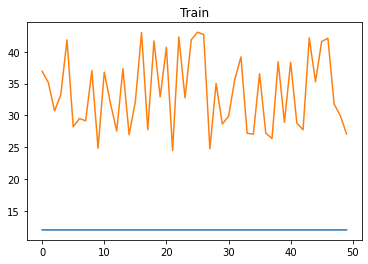

2/2 [==============================] - 11s 54ms/step


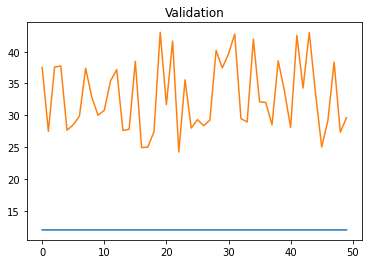

3/3 [==============================] - 0s 17ms/step


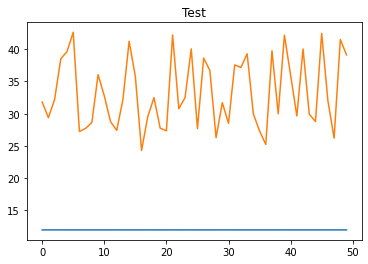

3/3 [==============================] - 0s 32ms/step


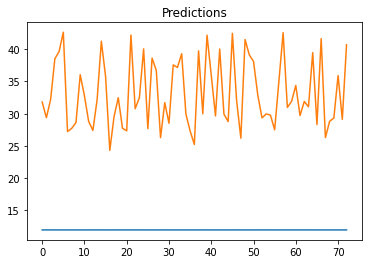

In [59]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_hybrid_lstm_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [60]:
mavg_hybrid_lstm_rnn_gru_mse

474.0629437114099

# MSE

In [61]:
mse_list = [cnn_mse, rnn_mse, gru_mse, lstm_mse,
            mvg_cnn_mse, mvg_rnn_mse, mvg_gru_mse, mvg_lstm_mse,
            auto_cnn_mse, auto_rnn_mse, auto_gru_mse, auto_lstm_mse,
            mavg_auto_cnn_mse, mavg_auto_rnn_mse, mavg_auto_gru_mse, mavg_auto_lstm_mse,
            hybrid_cnn_lstm_mse, hybrid_lstm_rnn_gru_mse,hybrid_cnn_rnn_gru_mse,hybrid_cnn_gru_mse,
            hybrid_rnn_gru_mse,hybrid_rnn_lstm_mse,
            mavg_hybrid_cnn_lstm_mse, mavg_hybrid_lstm_rnn_gru_mse,mavg_hybrid_cnn_rnn_gru_mse,
            mavg_hybrid_cnn_gru_mse,mavg_hybrid_rnn_gru_mse,mavg_hybrid_rnn_lstm_mse]

model_n = ["cnn", "rnn", "gru", "lstm",
           "mvg_cnn", "mvg_rnn", "mvg_gru", "mvg_lstm",
           "auto_cnn", "auto_rnn", "auto_gru", "auto_lstm",
           "mvg_auto_cnn", "mvg_auto_rnn", "mvg_auto_gru", "mvg_auto_lstm",
           "hybrid_cnn_lstm", "hybrid_lstm_rnn_gru" ,"hybrid_cnn_rnn_gru","hybrid_cnn_gru",
           "hybrid_rnn_gru","hybrid_rnn_lstm",
           "mavg_hybrid_cnn_lstm", "mavg_hybrid_lstm_rnn_gru","mavg_hybrid_cnn_rnn_gru",
           "mavg_hybrid_cnn_gru","mavg_hybrid_rnn_gru","mavg_hybrid_rnn_lstm"
          ]

msedf = pd.DataFrame({
    "Model": model_n,
    "MSE": mse_list
})

rmse = np.sqrt(msedf.MSE)
msedf["RMSE"] = rmse

In [62]:
msedf

,Model,MSE,RMSE
0,cnn,92.690650,9.627598
1,rnn,521.356123,22.833224
2,gru,544.633136,23.337376
3,lstm,406.498055,20.161797
4,mvg_cnn,82.210334,9.066991
5,mvg_rnn,596.003281,24.413178
6,mvg_gru,535.521341,23.141334
7,mvg_lstm,960.115902,30.985737
8,auto_cnn,1122.495915,33.503670
9,auto_rnn,573.581248,23.949556


In [63]:
msedf.to_csv("msedf.csv", index= False)

<AxesSubplot:xlabel='Model'>

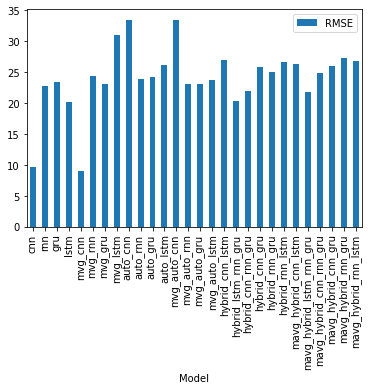

In [64]:
msedf.plot("Model", "RMSE", kind= "bar")

In [65]:
np.save("x_train.npy", x_train)
np.save("y_train.npy", y_train)
np.save("x_test.npy", x_test)
np.save("y_test.npy", y_test)
np.save("x_val.npy", x_val)
np.save("y_val.npy", y_val)